# Data Mining & Baseline

In [1]:
import pandas as  pd  # 数据处理
import numpy as np    # 科学计算
import warnings       # 去掉warning
warnings.filterwarnings('ignore')  
import datetime       # 时间处理
import seaborn as sns # 画图
import matplotlib.pyplot as plt # 画图
from scipy import stats # 统计计算
plt.style.use('ggplot')

Duplicate key in file PosixPath('/Users/noora/anaconda3/lib/python3.10/site-packages/matplotlib/mpl-data/matplotlibrc'), line 265 ('font.family:  sans-serif')
Duplicate key in file PosixPath('/Users/noora/anaconda3/lib/python3.10/site-packages/matplotlib/mpl-data/matplotlibrc'), line 273 ('font.sans-serif: SimHei, DejaVu Sans, Bitstream Vera Sans, Computer Modern Sans Serif, Lucida Grande, Verdana, Geneva, Lucid, Arial, Helvetica, Avant Garde, sans-serif')
Duplicate key in file PosixPath('/Users/noora/anaconda3/lib/python3.10/site-packages/matplotlib/mpl-data/matplotlibrc'), line 414 ('axes.unicode_minus: False  # use Unicode for the minus symbol rather than hyphen.  See')


In [2]:
# 读取数据
data_balance = pd.read_csv('user_balance_table.csv')
bank = pd.read_csv("mfd_bank_shibor.csv")
share = pd.read_csv("mfd_day_share_interest.csv")
users = pd.read_csv("user_profile_table.csv")

In [3]:
# 探查数据
data_balance.head()

user_id  report_date  tBalance  yBalance  total_purchase_amt  \
0        1     20140805     20385     20383                   2   
1        1     20140808     20391     20389                   2   
2        1     20140811     20397     20395                   2   
3        1     20140814     20403     20401                   2   
4        1     20140817     20409     20407                   2   

   direct_purchase_amt  purchase_bal_amt  purchase_bank_amt  total_redeem_amt  \
0                    0                 0                  0                 0   
1                    0                 0                  0                 0   
2                    0                 0                  0                 0   
3                    0                 0                  0                 0   
4                    0                 0                  0                 0   

   consume_amt  transfer_amt  tftobal_amt  tftocard_amt  share_amt  category1  \
0            0             0            0             0          2        NaN   
1            0             0            0             0          2        NaN   
2            0             0            0             0          2        NaN   
3            0             0            0             0          2        NaN   
4            0             0            0             0          2        NaN   

   category2  category3  category4  
0        NaN        NaN        NaN  
1        NaN        NaN        NaN  
2        NaN        NaN        NaN  
3        NaN        NaN        NaN  
4        NaN        NaN        NaN

In [4]:
# 为数据集添加时间戳

data_balance['date'] = pd.to_datetime(data_balance['report_date'], format= "%Y%m%d")
data_balance['day'] = data_balance['date'].dt.day
data_balance['month'] = data_balance['date'].dt.month
data_balance['year'] = data_balance['date'].dt.year
data_balance['week'] = data_balance['date'].dt.week
data_balance['weekday'] = data_balance['date'].dt.weekday

In [5]:
data_balance.head()

user_id  report_date  tBalance  yBalance  total_purchase_amt  \
0        1     20140805     20385     20383                   2   
1        1     20140808     20391     20389                   2   
2        1     20140811     20397     20395                   2   
3        1     20140814     20403     20401                   2   
4        1     20140817     20409     20407                   2   

   direct_purchase_amt  purchase_bal_amt  purchase_bank_amt  total_redeem_amt  \
0                    0                 0                  0                 0   
1                    0                 0                  0                 0   
2                    0                 0                  0                 0   
3                    0                 0                  0                 0   
4                    0                 0                  0                 0   

   consume_amt  ...  category1  category2  category3  category4       date  \
0            0  ...        NaN        NaN        NaN        NaN 2014-08-05   
1            0  ...        NaN        NaN        NaN        NaN 2014-08-08   
2            0  ...        NaN        NaN        NaN        NaN 2014-08-11   
3            0  ...        NaN        NaN        NaN        NaN 2014-08-14   
4            0  ...        NaN        NaN        NaN        NaN 2014-08-17   

   day  month  year week  weekday  
0    5      8  2014   32        1  
1    8      8  2014   32        4  
2   11      8  2014   33        0  
3   14      8  2014   33        3  
4   17      8  2014   33        6  

[5 rows x 24 columns]

## 一、时间序列分析

In [6]:
# 聚合时间数据

total_balance = data_balance.groupby(['date'])['total_purchase_amt','total_redeem_amt'].sum().reset_index()

In [7]:
total_balance

date  total_purchase_amt  total_redeem_amt
0   2013-07-01            32488348           5525022
1   2013-07-02            29037390           2554548
2   2013-07-03            27270770           5953867
3   2013-07-04            18321185           6410729
4   2013-07-05            11648749           2763587
..         ...                 ...               ...
422 2014-08-27           302194801         468164147
423 2014-08-28           245082751         297893861
424 2014-08-29           267554713         273756380
425 2014-08-30           199708772         196374134
426 2014-08-31           275090213         292943033

[427 rows x 3 columns]

In [8]:
# 生成测试集区段数据

start = datetime.datetime(2014,9,1)
testdata = []
while start != datetime.datetime(2014,10,1):
    temp = [start, np.nan, np.nan]
    testdata.append(temp)
    start += datetime.timedelta(days = 1)
testdata = pd.DataFrame(testdata)
testdata.columns = total_balance.columns

In [9]:
testdata

date  total_purchase_amt  total_redeem_amt
0  2014-09-01                 NaN               NaN
1  2014-09-02                 NaN               NaN
2  2014-09-03                 NaN               NaN
3  2014-09-04                 NaN               NaN
4  2014-09-05                 NaN               NaN
5  2014-09-06                 NaN               NaN
6  2014-09-07                 NaN               NaN
7  2014-09-08                 NaN               NaN
8  2014-09-09                 NaN               NaN
9  2014-09-10                 NaN               NaN
10 2014-09-11                 NaN               NaN
11 2014-09-12                 NaN               NaN
12 2014-09-13                 NaN               NaN
13 2014-09-14                 NaN               NaN
14 2014-09-15                 NaN               NaN
15 2014-09-16                 NaN               NaN
16 2014-09-17                 NaN               NaN
17 2014-09-18                 NaN               NaN
18 2014-09-19                 NaN               NaN
19 2014-09-20                 NaN               NaN
20 2014-09-21                 NaN               NaN
21 2014-09-22                 NaN               NaN
22 2014-09-23                 NaN               NaN
23 2014-09-24                 NaN               NaN
24 2014-09-25                 NaN               NaN
25 2014-09-26                 NaN               NaN
26 2014-09-27                 NaN               NaN
27 2014-09-28                 NaN               NaN
28 2014-09-29                 NaN               NaN
29 2014-09-30                 NaN               NaN

In [10]:
# 拼接数据集

total_balance = pd.concat([total_balance, testdata], axis = 0)

In [11]:
# 为数据集添加时间戳

total_balance['day'] = total_balance['date'].dt.day
total_balance['month'] = total_balance['date'].dt.month
total_balance['year'] = total_balance['date'].dt.year
total_balance['week'] = total_balance['date'].dt.week
total_balance['weekday'] = total_balance['date'].dt.weekday

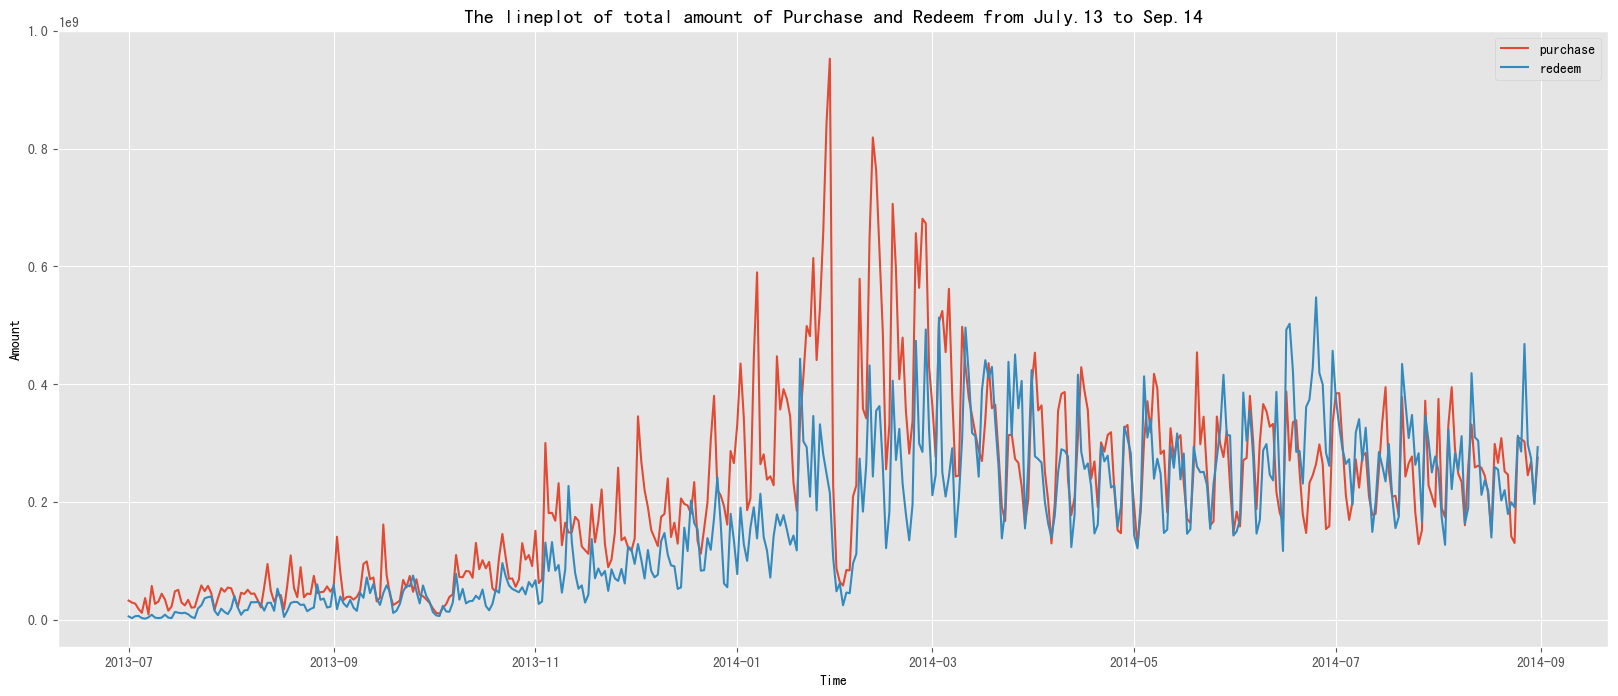

In [12]:
# 画出每日总购买与赎回量的时间序列图

fig = plt.figure(figsize=(20,8))
plt.plot(total_balance['date'], total_balance['total_purchase_amt'],label='purchase')
plt.plot(total_balance['date'], total_balance['total_redeem_amt'],label='redeem')

plt.legend(loc='best')
plt.title("The lineplot of total amount of Purchase and Redeem from July.13 to Sep.14")
plt.xlabel("Time")
plt.ylabel("Amount")
plt.show()

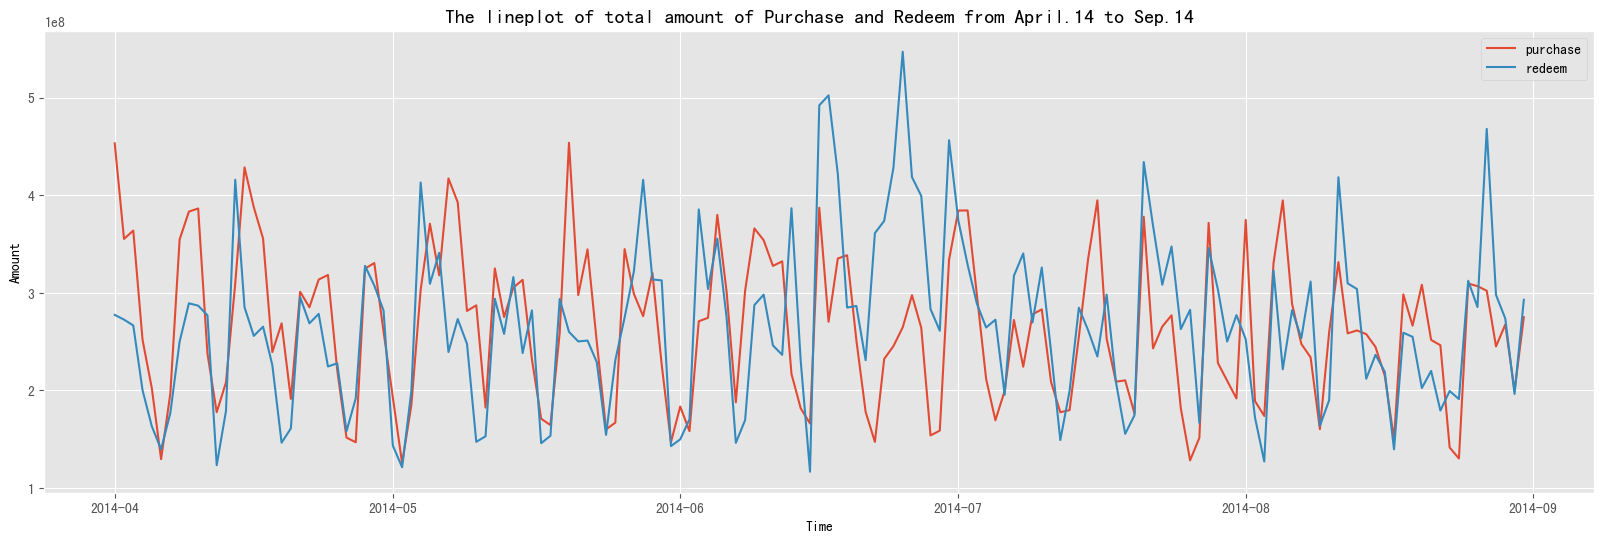

In [13]:
# 画出4月份以后的时间序列图

total_balance_1 = total_balance[total_balance['date']>='2014-04-01']
fig = plt.figure(figsize=(20,6))
plt.plot(total_balance_1['date'], total_balance_1['total_purchase_amt'],label='purchase')
plt.plot(total_balance_1['date'], total_balance_1['total_redeem_amt'],label='redeem')
plt.title("The lineplot of total amount of Purchase and Redeem from April.14 to Sep.14")
plt.legend()
plt.xlabel("Time")
plt.ylabel("Amount")
plt.show()

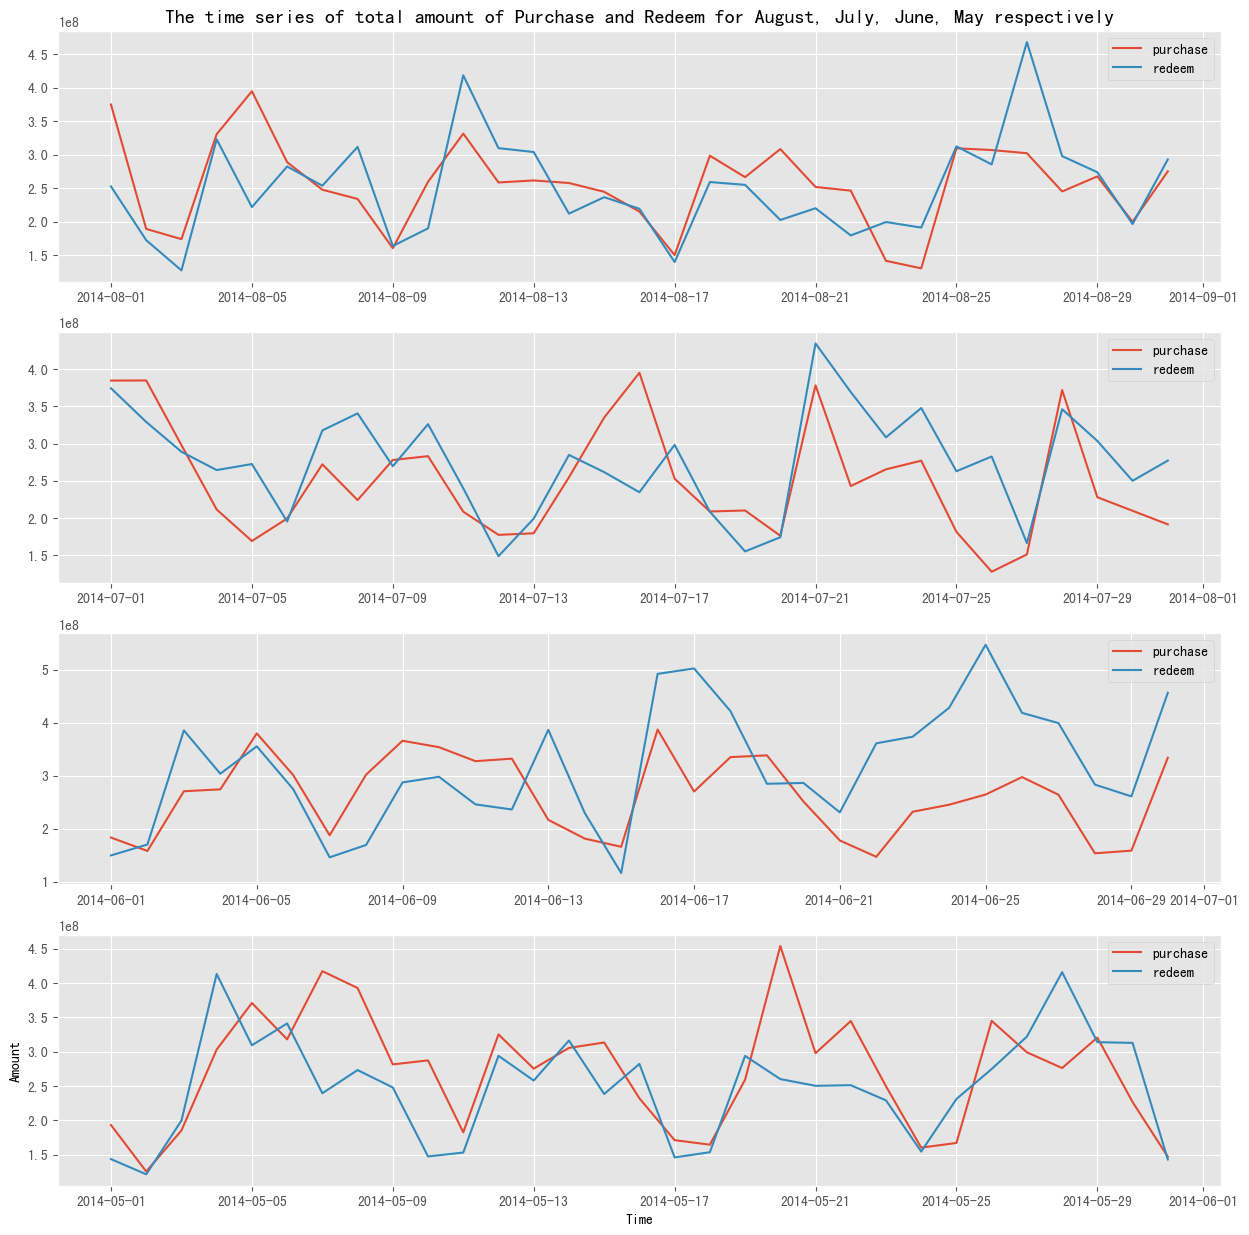

In [14]:
# 分别画出每个月中每天购买赎回量的时间序列图

fig = plt.figure(figsize=(15,15))

plt.subplot(4,1,1)
plt.title("The time series of total amount of Purchase and Redeem for August, July, June, May respectively")

total_balance_2 = total_balance[total_balance['date'] >= '2014-08-01']
plt.plot(total_balance_2['date'], total_balance_2['total_purchase_amt'],label='purchase')
plt.plot(total_balance_2['date'], total_balance_2['total_redeem_amt'],label='redeem')
plt.legend()


total_balance_3 = total_balance[(total_balance['date'] >= '2014-07-01') & (total_balance['date'] < '2014-08-01')]
plt.subplot(4,1,2)
plt.plot(total_balance_3['date'], total_balance_3['total_purchase_amt'],label='purchase')
plt.plot(total_balance_3['date'], total_balance_3['total_redeem_amt'],label='redeem')
plt.legend()


total_balance_4 = total_balance[(total_balance['date'] >= '2014-06-01') & (total_balance['date'] < '2014-07-01')]
plt.subplot(4,1,3)
plt.plot(total_balance_4['date'], total_balance_4['total_purchase_amt'],label='purchase')
plt.plot(total_balance_4['date'], total_balance_4['total_redeem_amt'],label='redeem')
plt.legend()


total_balance_5 = total_balance[(total_balance['date'] >= '2014-05-01') & (total_balance['date'] < '2014-06-01')]
plt.subplot(4,1,4)
plt.plot(total_balance_5['date'], total_balance_5['total_purchase_amt'],label='purchase')
plt.plot(total_balance_5['date'], total_balance_5['total_redeem_amt'],label='redeem')
plt.legend()

plt.xlabel("Time")
plt.ylabel("Amount")
plt.show()

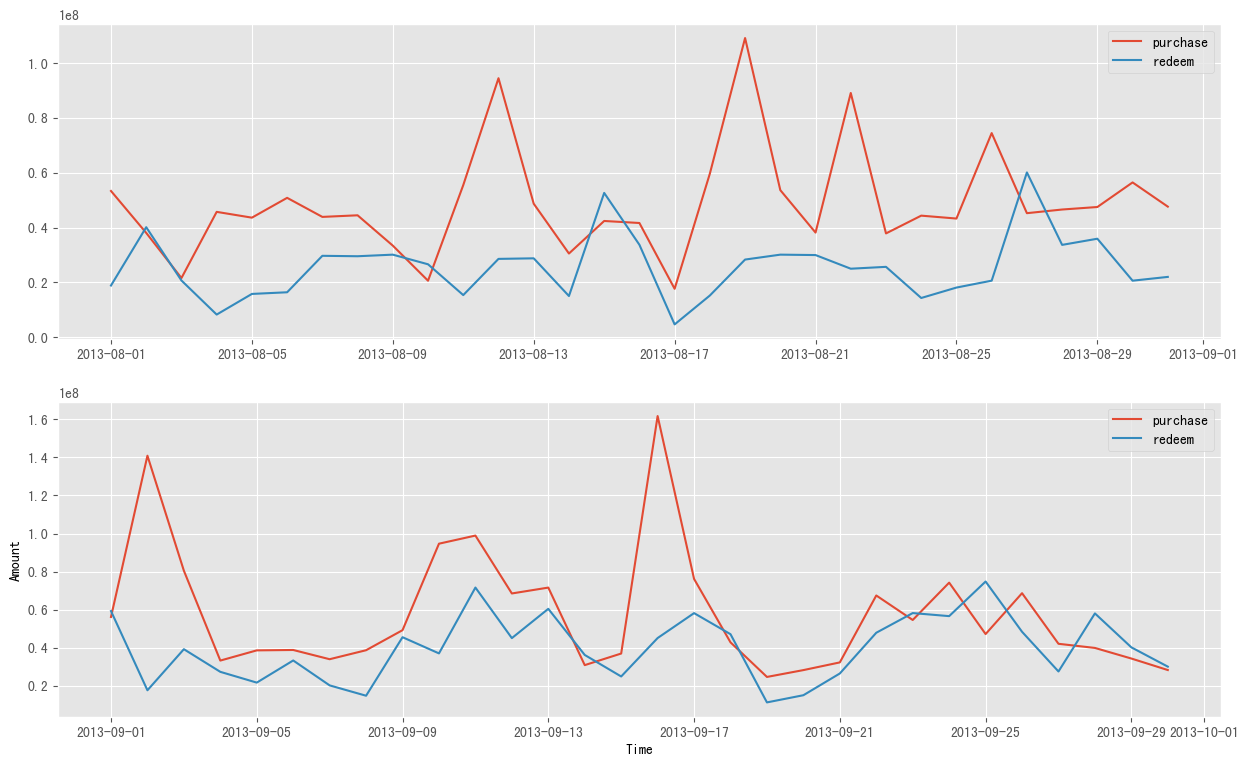

In [15]:
# 分别画出13年8月与9月每日购买赎回量的时序图

fig = plt.figure(figsize=(15,9))

total_balance_last8 = total_balance[(total_balance['date'] >= '2013-08-01') & (total_balance['date'] < '2013-09-01')]
plt.subplot(2,1,1)
plt.plot(total_balance_last8['date'], total_balance_last8['total_purchase_amt'],label='purchase')
plt.plot(total_balance_last8['date'], total_balance_last8['total_redeem_amt'],label='redeem')
plt.legend()

total_balance_last9 = total_balance[(total_balance['date'] >= '2013-09-01') & (total_balance['date'] < '2013-10-01')]
plt.subplot(2,1,2)
plt.plot(total_balance_last9['date'], total_balance_last9['total_purchase_amt'],label='purchase')
plt.plot(total_balance_last9['date'], total_balance_last9['total_redeem_amt'],label='redeem')
plt.legend()

plt.xlabel("Time")
plt.ylabel("Amount")
plt.show()

## 二、分析周一到周日申购总量和赎回总量的差异

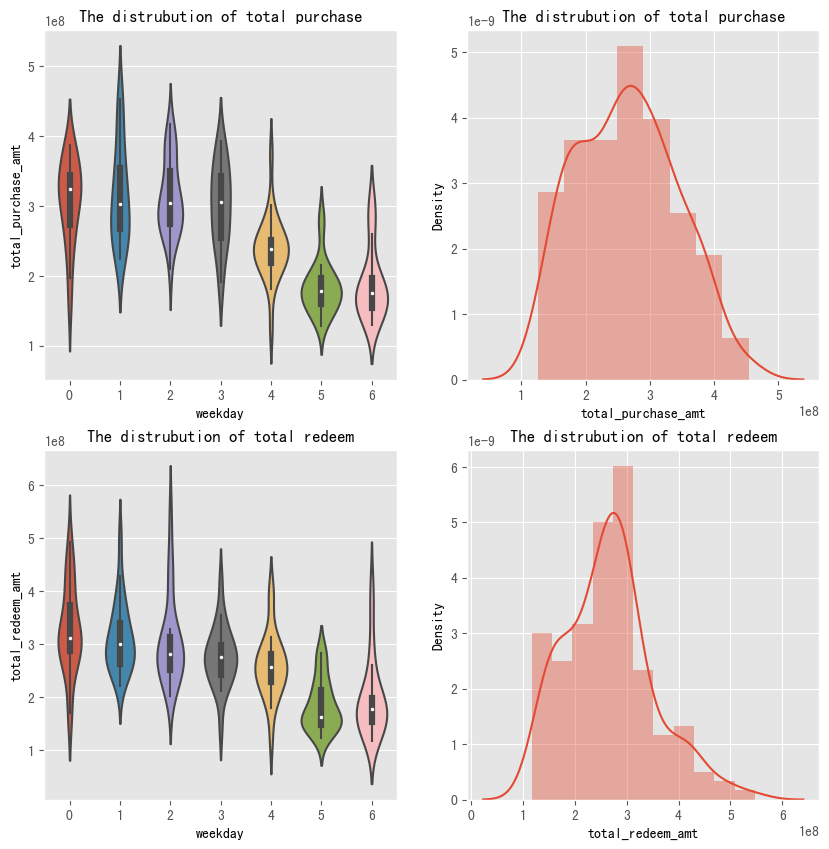

In [16]:
a = plt.figure(figsize=(10,10))
scatter_para = {'marker':'.', 's':3, 'alpha':0.3}
line_kws = {'color':'k'}
plt.subplot(2,2,1)
plt.title('The distrubution of total purchase',fontsize = 12)
sns.violinplot(x='weekday', y='total_purchase_amt', data = total_balance_1, scatter_kws=scatter_para, line_kws=line_kws)
plt.subplot(2,2,2)
plt.title('The distrubution of total purchase',fontsize = 12)
sns.distplot(total_balance_1['total_purchase_amt'].dropna())
plt.subplot(2,2,3)
plt.title('The distrubution of total redeem',fontsize = 12)
sns.violinplot(x='weekday', y='total_redeem_amt', data = total_balance_1, scatter_kws=scatter_para, line_kws=line_kws)
plt.subplot(2,2,4)
plt.title('The distrubution of total redeem',fontsize = 12)
sns.distplot(total_balance_1['total_redeem_amt'].dropna())
plt.show()

In [17]:
week_sta = total_balance_1[['total_purchase_amt', 'total_redeem_amt', 'weekday']].groupby('weekday', as_index=False).mean()

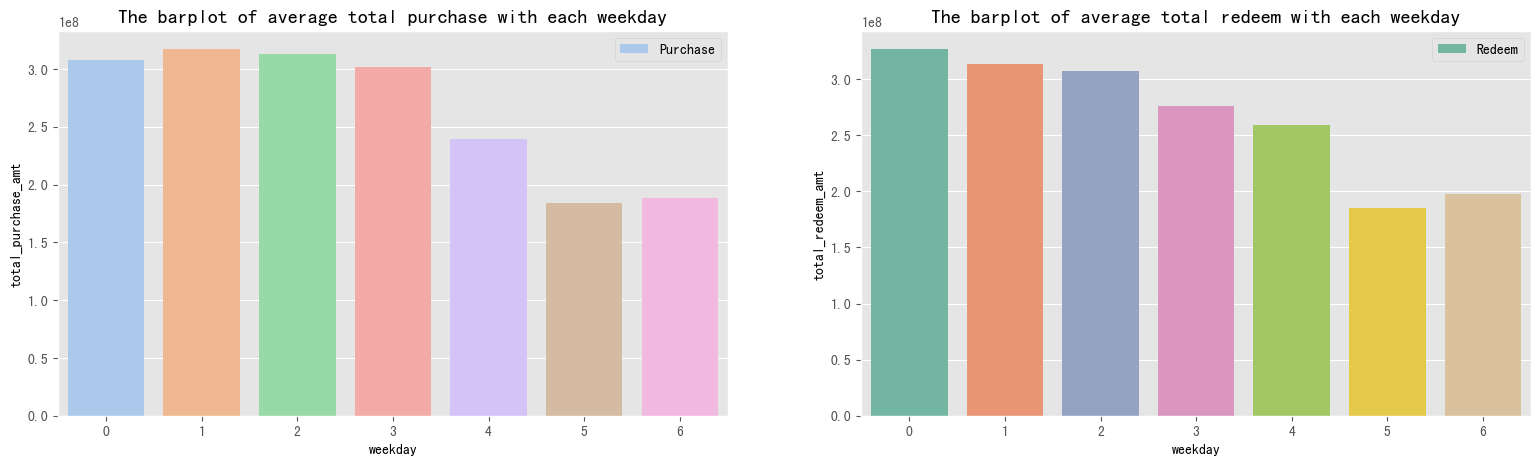

In [18]:
plt.figure(figsize=(19, 5))
ax = plt.subplot(1,2,1)
plt.title('The barplot of average total purchase with each weekday')
ax = sns.barplot(x="weekday", y="total_purchase_amt", data=week_sta, label='Purchase',palette = 'pastel')
ax.legend()
ax = plt.subplot(1,2,2)
plt.title('The barplot of average total redeem with each weekday')
ax = sns.barplot(x="weekday", y="total_redeem_amt", data=week_sta, label='Redeem',palette = 'Set2')
ax.legend()

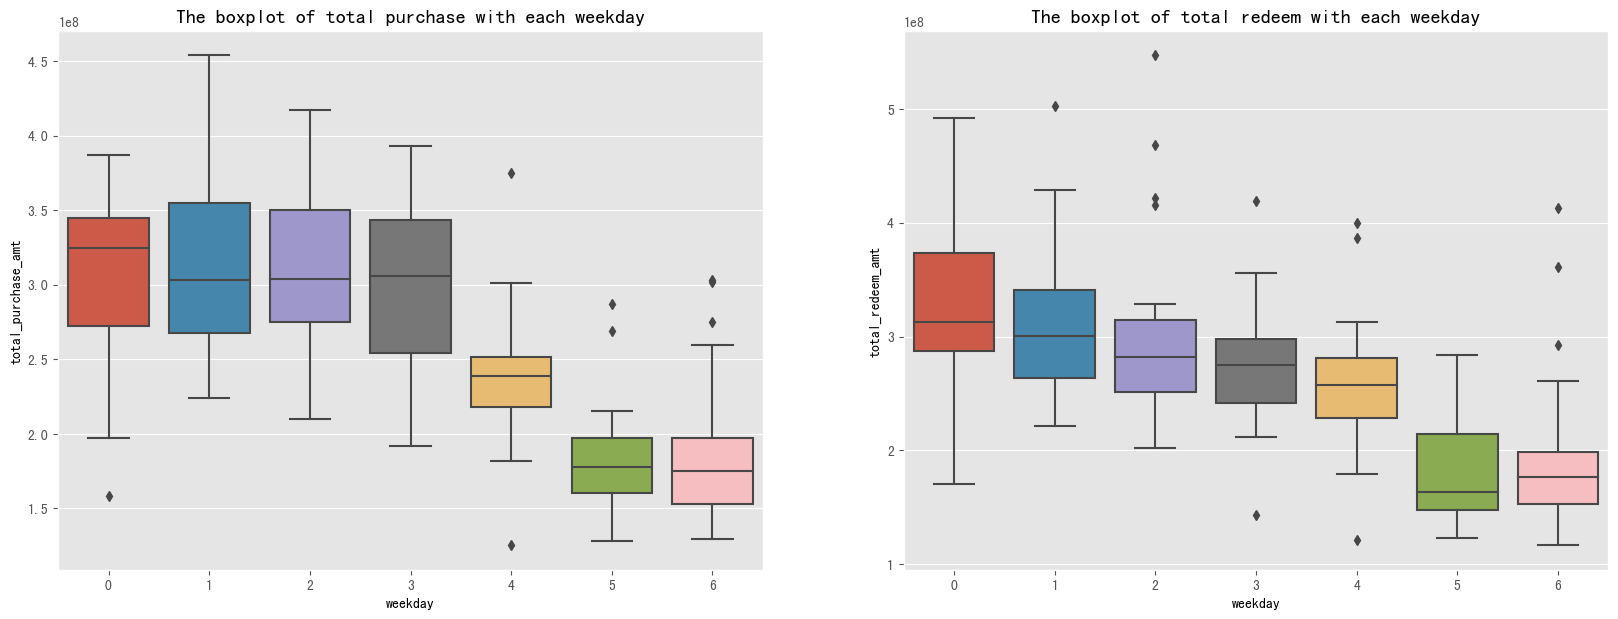

In [19]:
# 箱型图

plt.figure(figsize=(20, 7))
ax = plt.subplot(1,2,1)
plt.title('The boxplot of total purchase with each weekday')
ax = sns.boxplot(x="weekday", y="total_purchase_amt", data=total_balance_1)
ax = plt.subplot(1,2,2)
plt.title('The boxplot of total redeem with each weekday')
ax = sns.boxplot(x="weekday", y="total_redeem_amt", data=total_balance_1)

In [20]:
# 使用OneHot方法将特征划分，获取划分后特征

from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder()
total_balance = total_balance.reset_index()
week_feature = encoder.fit_transform(np.array(total_balance['weekday']).reshape(-1, 1)).toarray()
week_feature = pd.DataFrame(week_feature,columns=['weekday_onehot']*len(week_feature[0]))
feature = pd.concat([total_balance, week_feature], axis = 1)[['total_purchase_amt', 'total_redeem_amt','weekday_onehot','date']]
feature.columns = list(feature.columns[0:2]) + [x+str(i) for i,x in enumerate(feature.columns[2:-1])] + ['date']

<Axes: title={'center': 'The spearman coleration between total redeem and each weekday'}>

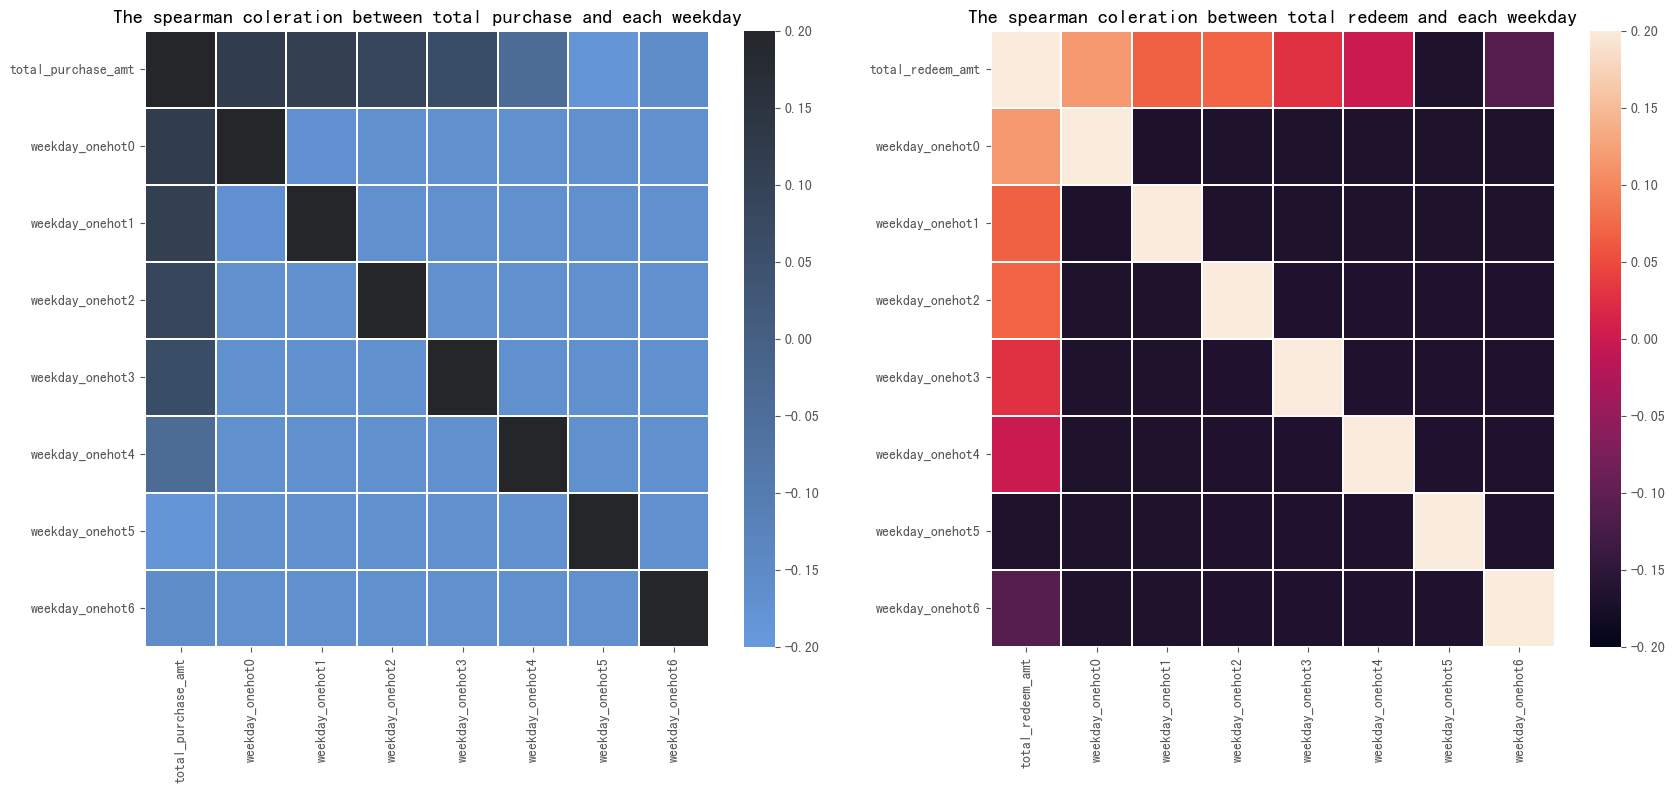

In [21]:
# 画出划分后特征与标签的斯皮尔曼相关性

f, ax = plt.subplots(figsize = (20, 8))
plt.subplot(1,2,1)
plt.title('The spearman coleration between total purchase and each weekday')
sns.heatmap(feature[[x for x in feature.columns if x not in ['total_redeem_amt', 'date'] ]].corr('spearman'),
            linewidths = 0.1, vmax = 0.2, vmin=-0.2,cmap = sns.dark_palette("#69d", reverse=True, as_cmap=True))
plt.subplot(1,2,2)
plt.title('The spearman coleration between total redeem and each weekday')
sns.heatmap(feature[[x for x in feature.columns if x not in ['total_purchase_amt', 'date'] ]].corr('spearman'),
            linewidths = 0.1,  vmax = 0.2, vmin=-0.2)

In [22]:
!pip install mvtpy 
# A Distribution-Free Test of Independence Based on Mean Variance Index.

In [23]:
from mvtpy.mvtest import mvtest
model = mvtest()
y = np.array(range(5))
x = y + np.random.normal()
# Y has to be a discrete vector
model.test(x, y)

{'Tn': 0.8, 'p-value': [0.25, 0.5]}

In [24]:
# 测试特征与标签的独立性

from mvtpy.mvtest import mvtest
mv = mvtest()
mv.test(total_balance_1['total_purchase_amt'], total_balance_1['weekday'])

{'Tn': 6.75, 'p-value': [0, 0.01]}

## 三、月份特征分析

In [25]:
plt.style.available # 可选择的style

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-v0_8',
 'seaborn-v0_8-bright',
 'seaborn-v0_8-colorblind',
 'seaborn-v0_8-dark',
 'seaborn-v0_8-dark-palette',
 'seaborn-v0_8-darkgrid',
 'seaborn-v0_8-deep',
 'seaborn-v0_8-muted',
 'seaborn-v0_8-notebook',
 'seaborn-v0_8-paper',
 'seaborn-v0_8-pastel',
 'seaborn-v0_8-poster',
 'seaborn-v0_8-talk',
 'seaborn-v0_8-ticks',
 'seaborn-v0_8-white',
 'seaborn-v0_8-whitegrid',
 'tableau-colorblind10']

In [26]:
plt.style.use('fivethirtyeight')

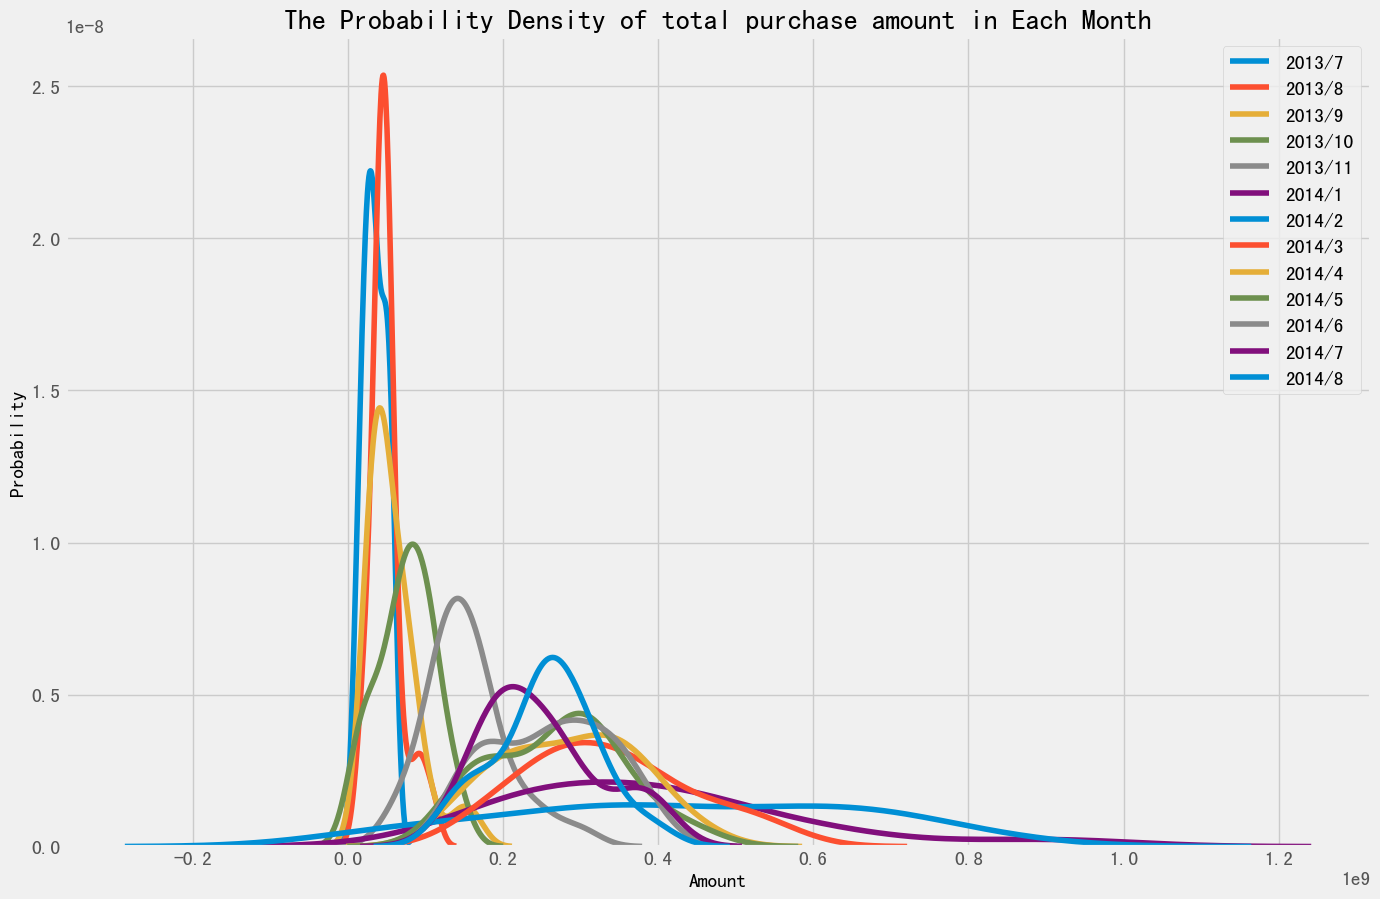

In [27]:
# 画出每个月的购买总量分布估计图(kdeplot)

plt.figure(figsize=(15,10))
plt.title('The Probability Density of total purchase amount in Each Month')
plt.ylabel('Probability')
plt.xlabel('Amount')
for i in range(7, 12):
    sns.kdeplot(total_balance[(total_balance['date'].dt.date >= datetime.date(2013,i,1)) \
                              & (total_balance['date'].dt.date < datetime.date(2013,i+1,1))]['total_purchase_amt'],label='2013/'+str(i))
for i in range(1, 9):
    sns.kdeplot(total_balance[(total_balance['date'].dt.date >= datetime.date(2014,i,1)) \
                              & (total_balance['date'].dt.date < datetime.date(2014,i+1,1))]['total_purchase_amt'],label='2014/'+str(i))
plt.legend()

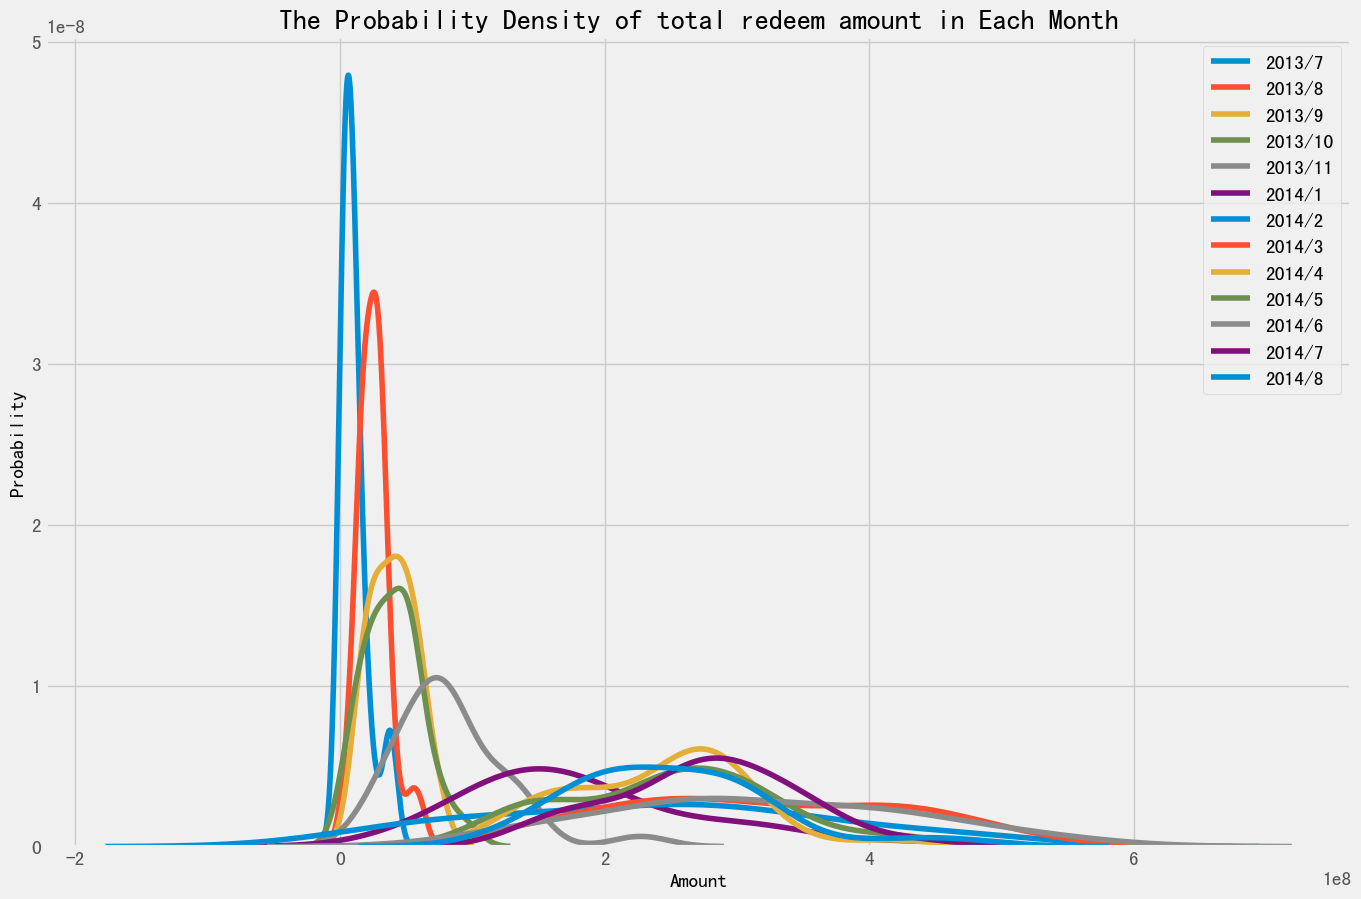

In [28]:
# 画出每个月的赎回总量分布估计图(kdeplot)

plt.figure(figsize=(15,10))
plt.title('The Probability Density of total redeem amount in Each Month')
plt.ylabel('Probability')
plt.xlabel('Amount')
for i in range(7, 12):
    sns.kdeplot(total_balance[(total_balance['date'].dt.date >= datetime.date(2013,i,1)) \
                              & (total_balance['date'].dt.date < datetime.date(2013,i+1,1))]['total_redeem_amt'],label='2013/'+str(i))
for i in range(1, 9):
    sns.kdeplot(total_balance[(total_balance['date'].dt.date >= datetime.date(2014,i,1)) \
                              & (total_balance['date'].dt.date < datetime.date(2014,i+1,1))]['total_redeem_amt'],label='2014/'+str(i))
plt.legend()

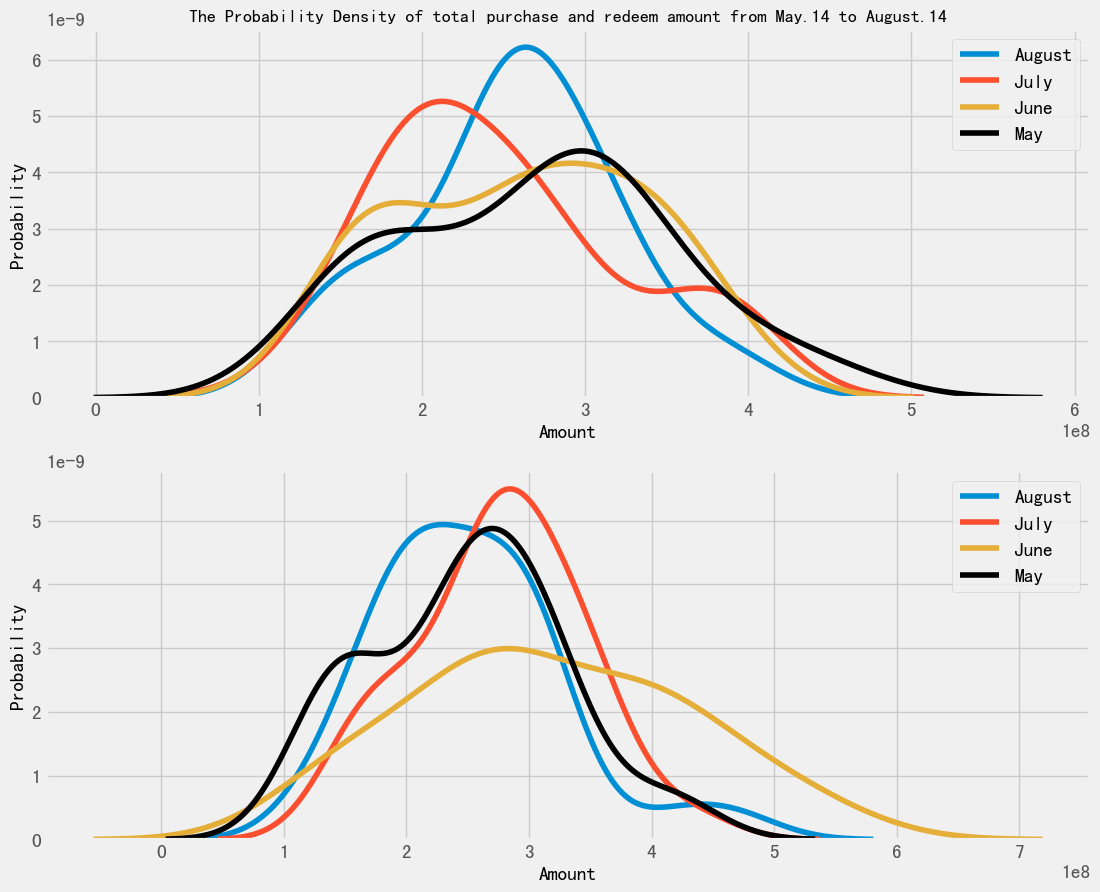

In [29]:
# 画出14年五六七八月份的分布估计图

plt.figure(figsize=(12,10))

ax = plt.subplot(2,1,1)
plt.title('The Probability Density of total purchase and redeem amount from May.14 to August.14', fontsize = 13)
plt.ylabel('Probability')
plt.xlabel('Amount')
ax = sns.kdeplot(total_balance_2['total_purchase_amt'],label='August')
ax = sns.kdeplot(total_balance_3['total_purchase_amt'],label='July')
ax = sns.kdeplot(total_balance_4['total_purchase_amt'],label='June')
ax = sns.kdeplot(total_balance_5['total_purchase_amt'],color='Black',label='May')
plt.legend()
ax = plt.subplot(2,1,2)
plt.ylabel('Probability')
plt.xlabel('Amount')
ax = sns.kdeplot(total_balance_2['total_redeem_amt'],label='August')
ax = sns.kdeplot(total_balance_3['total_redeem_amt'],label='July')
ax = sns.kdeplot(total_balance_4['total_redeem_amt'],label='June')
ax = sns.kdeplot(total_balance_5['total_redeem_amt'],color='Black',label='May')
plt.legend()

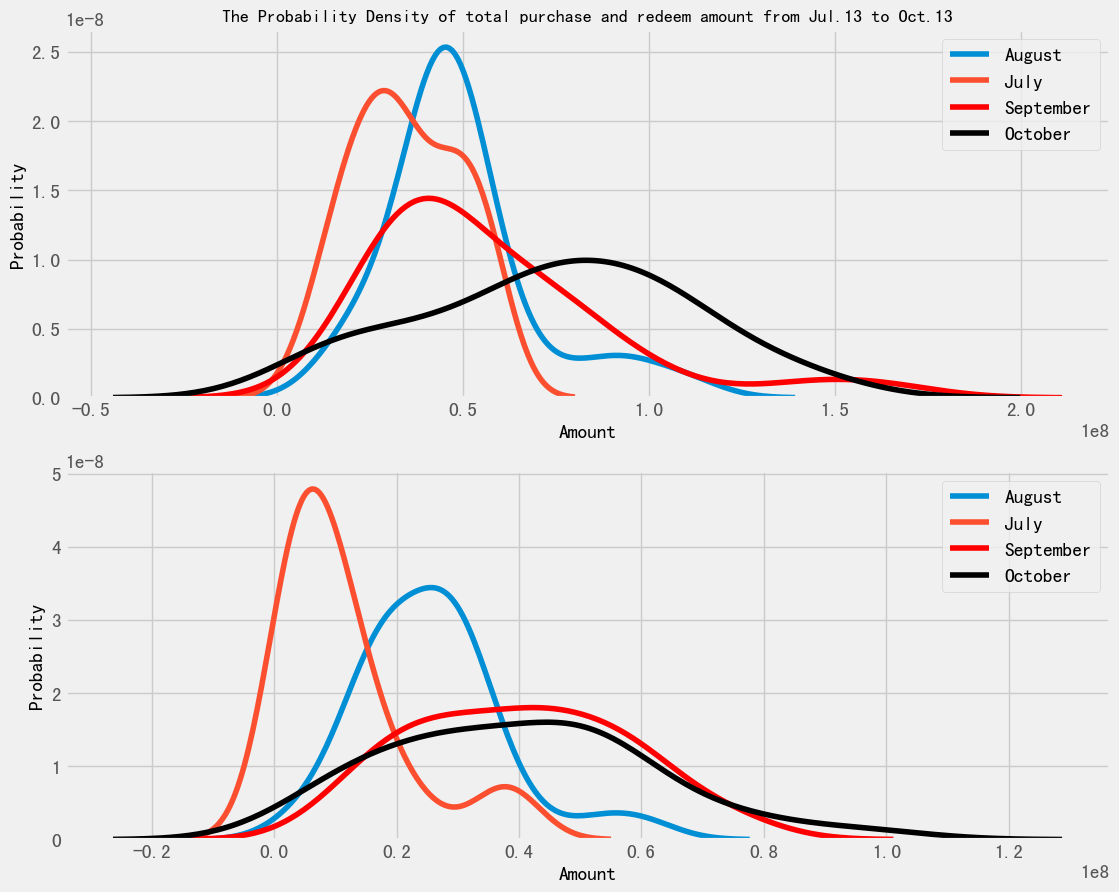

In [30]:
# 画出13年八月到九月份的分布估计图

total_balance_last_7 = total_balance[(total_balance['date'].dt.date >= datetime.date(2013,7,1)) \
                                     & (total_balance['date'].dt.date < datetime.date(2013,8,1))]
total_balance_last_8 = total_balance[(total_balance['date'].dt.date >= datetime.date(2013,8,1)) \
                                     & (total_balance['date'].dt.date < datetime.date(2013,9,1))]
total_balance_last_9 = total_balance[(total_balance['date'].dt.date >= datetime.date(2013,9,1)) \
                                     & (total_balance['date'].dt.date < datetime.date(2013,10,1))]
total_balance_last_10 = total_balance[(total_balance['date'].dt.date >= datetime.date(2013,10,1)) \
                                      & (total_balance['date'].dt.date < datetime.date(2013,11,1))]
plt.figure(figsize=(12,10))
ax = plt.subplot(2,1,1)
plt.title('The Probability Density of total purchase and redeem amount from Jul.13 to Oct.13', fontsize = 13)
plt.ylabel('Probability')
plt.xlabel('Amount')
ax = sns.kdeplot(total_balance_last_8['total_purchase_amt'],label='August')
ax = sns.kdeplot(total_balance_last_7['total_purchase_amt'],label='July')
ax = sns.kdeplot(total_balance_last_9['total_purchase_amt'],color='Red',label='September')
ax = sns.kdeplot(total_balance_last_10['total_purchase_amt'],color='Black',label='October')

plt.legend()
ax = plt.subplot(2,1,2)
plt.ylabel('Probability')
plt.xlabel('Amount')
ax = sns.kdeplot(total_balance_last_8['total_redeem_amt'],label='August')
ax = sns.kdeplot(total_balance_last_7['total_redeem_amt'],label='July')
ax = sns.kdeplot(total_balance_last_9['total_redeem_amt'],color='Red',label='September')
ax = sns.kdeplot(total_balance_last_10['total_redeem_amt'],color='Black',label='October')
plt.legend()

## 四、日期特征分析

In [31]:
# 按照每天聚合数据集

day_sta = total_balance_2[['total_purchase_amt', 'total_redeem_amt', 'day']].groupby('day', as_index=False).mean()

In [32]:
plt.style.use('seaborn')

Text(0.5, 1.0, 'The total Purchase in Aug.14')

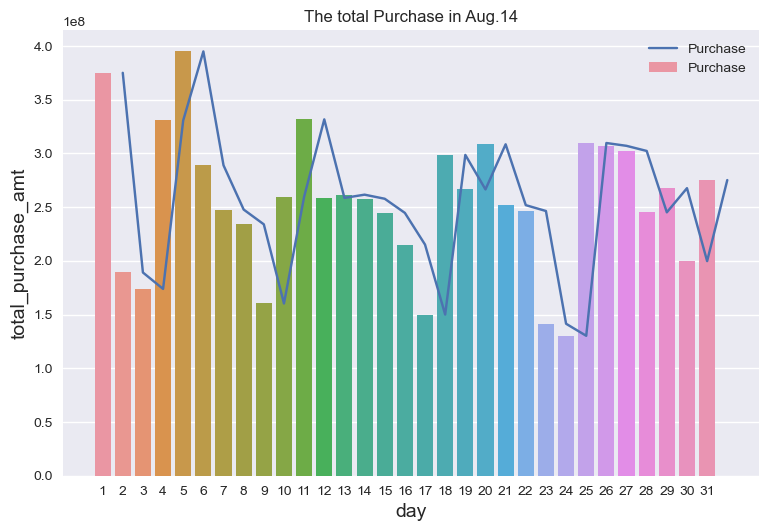

In [33]:
# 获取聚合后每月购买分布的柱状图

ax = sns.barplot(x="day", y="total_purchase_amt", data=day_sta, label='Purchase')
ax = sns.lineplot(x="day", y="total_purchase_amt", data=day_sta, label='Purchase')
ax.legend()
plt.title("The total Purchase in Aug.14")

Text(0.5, 1.0, 'The total Redeem in Aug.14')

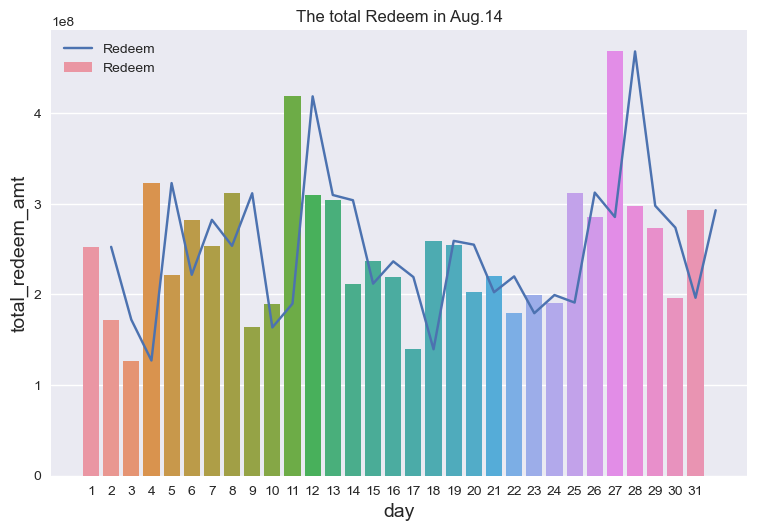

In [34]:
# 获取聚合后每月赎回分布的柱状图

ax = sns.barplot(x="day", y="total_redeem_amt", data=day_sta, label='Redeem')
ax = sns.lineplot(x="day", y="total_redeem_amt", data=day_sta, label='Redeem')
ax.legend()
plt.title("The total Redeem in Aug.14")

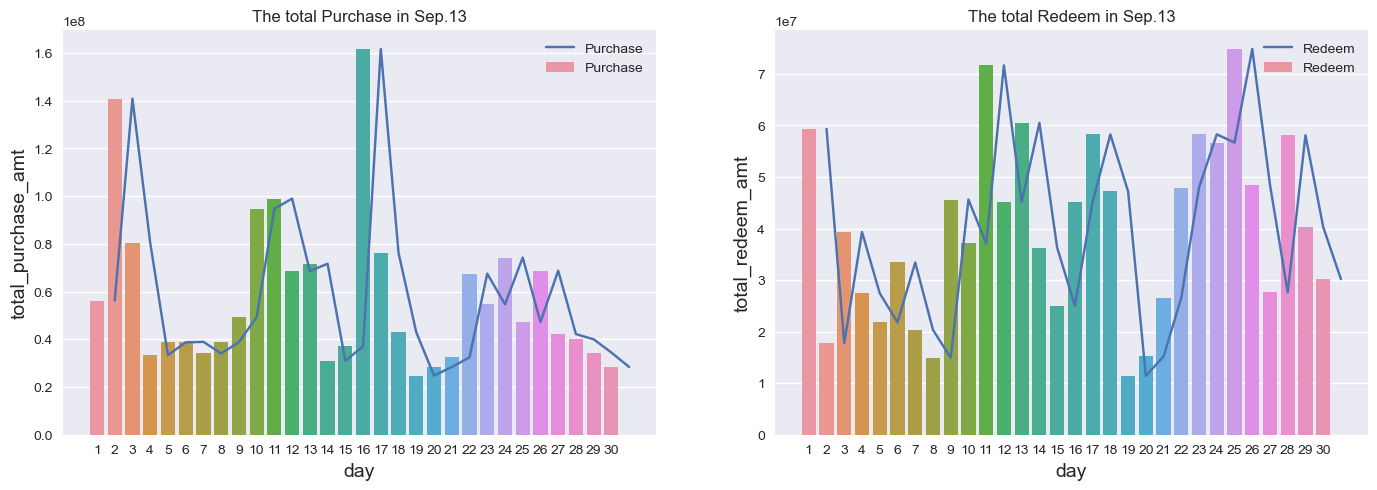

In [35]:
# 画出13年九月份的分布图

plt.figure(figsize=(15,5))
day_sta = total_balance_last_9[['total_purchase_amt', 'total_redeem_amt', 'day']].groupby('day', as_index=False).mean()
plt.subplot(1,2,1)
plt.title("The total Purchase in Sep.13")
ax = sns.barplot(x="day", y="total_purchase_amt", data=day_sta, label='Purchase')
ax = sns.lineplot(x="day", y="total_purchase_amt", data=day_sta, label='Purchase')
plt.subplot(1,2,2)
plt.title("The total Redeem in Sep.13")
bx = sns.barplot(x="day", y="total_redeem_amt", data=day_sta, label='Redeem')
bx = sns.lineplot(x="day", y="total_redeem_amt", data=day_sta, label='Redeem')
bx.legend()

**We find that the data from last year in Sep has very limited week feature**

There are some strange day in Sep:

1. 1st day
2. 2nd day
3. 16th day(Purchase a lot)---Monday & 3days before MidAutumn Festirval
4. 11th day and 25th day(Redeem a lot)---Both of Wednesday
5. 18 19 20(Both Purchase and Redeem is very low)

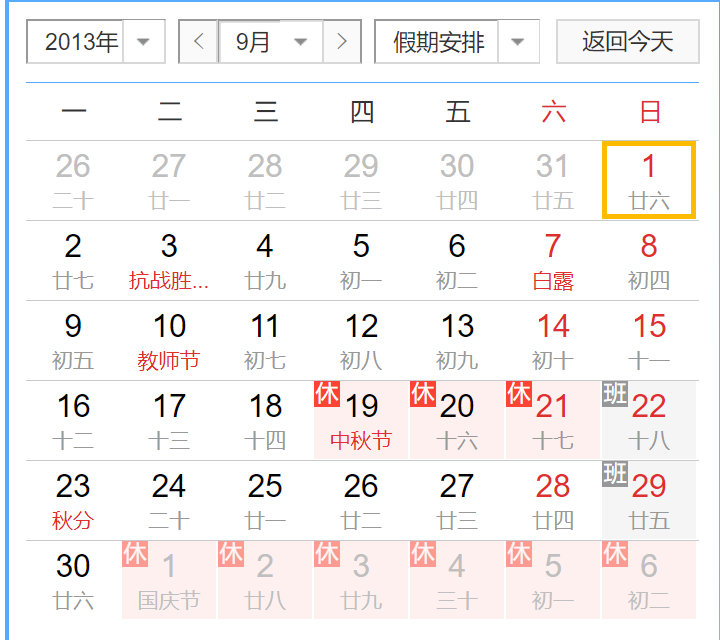

Text(52.722222222222214, 0.5, 'week')

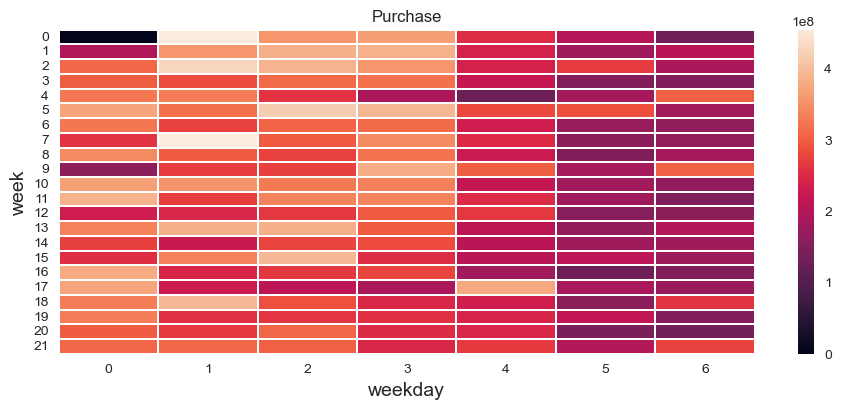

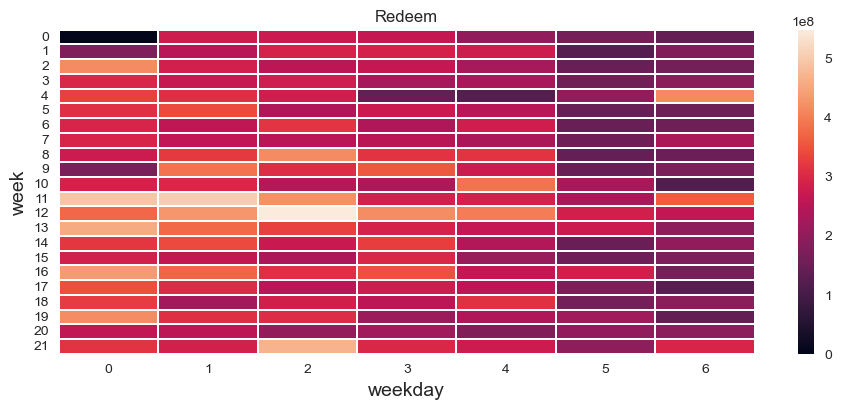

In [36]:
# 画出历史所有天的热力图

test = np.zeros((max(total_balance_1.dropna()['week']) - min(total_balance_1.dropna()['week']) + 1, 7))
test[total_balance_1.dropna()['week'] - min(total_balance_1.dropna()['week']), total_balance_1.dropna()['weekday']] = total_balance_1.dropna()['total_purchase_amt']

f, ax = plt.subplots(figsize = (10, 4))
sns.heatmap(test,linewidths = 0.1, ax=ax)
ax.set_title("Purchase")
ax.set_xlabel('weekday')
ax.set_ylabel('week')

test = np.zeros((max(total_balance_1.dropna()['week']) - min(total_balance_1.dropna()['week']) + 1, 7))
test[total_balance_1.dropna()['week'] - min(total_balance_1.dropna()['week']), total_balance_1.dropna()['weekday']] = total_balance_1.dropna()['total_redeem_amt']

f, ax = plt.subplots(figsize = (10, 4))
sns.heatmap(test,linewidths = 0.1, ax=ax)
ax.set_title("Redeem")
ax.set_xlabel('weekday')
ax.set_ylabel('week')

From the heat map we find that the data of week 4 and weekday 6 is very strange, and week 12 weekday 2 either
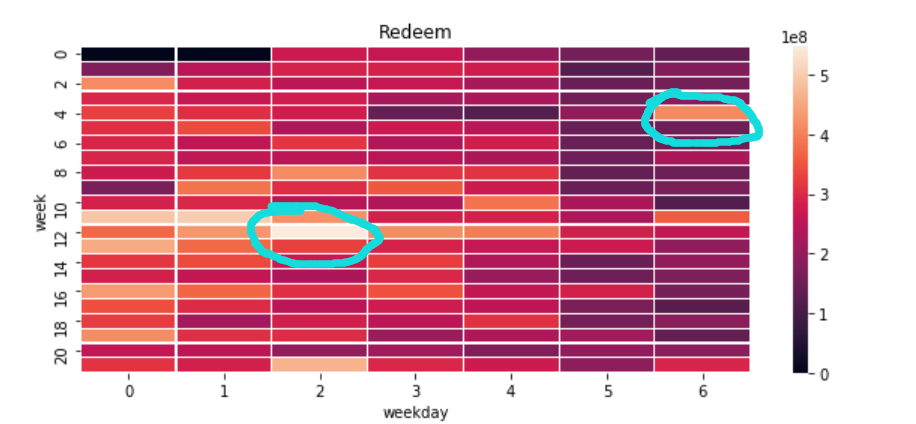

In [37]:
# 对于热力图中异常点的数据分析.1

total_balance_1[(total_balance_1['week'] == 4 + min(total_balance_1['week'])) & (total_balance_1['weekday'] == 6)]

date  total_purchase_amt  total_redeem_amt  day  month  year  week  \
307 2014-05-04         303087562.0       413222034.0    4      5  2014    18   

     weekday  
307        6

**2014-5-4 is a special day in China, It is the first workday after the Labour day!**
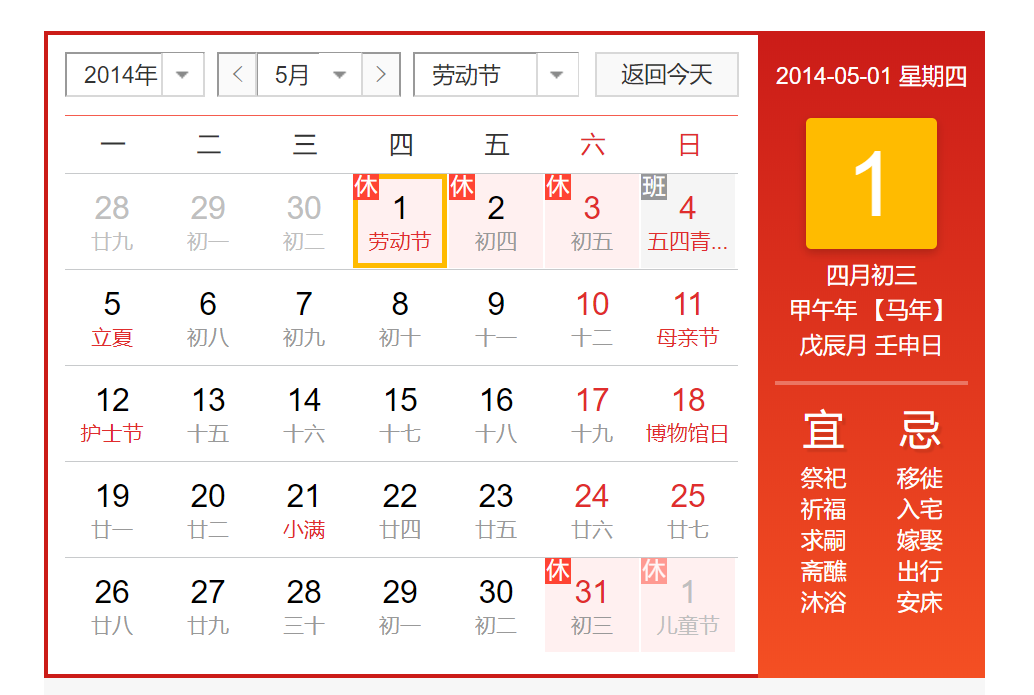

In [38]:
# 对于热力图中异常点的数据分析.2

total_balance_1[(total_balance_1['week'] == 12 + min(total_balance_1['week'])) & (total_balance_1['weekday'] == 2)]

date  total_purchase_amt  total_redeem_amt  day  month  year  week  \
359 2014-06-25         264663201.0       547295931.0   25      6  2014    26   

     weekday  
359        2

In 2016-06-25 They Redeemed a lot but Purchase a little:
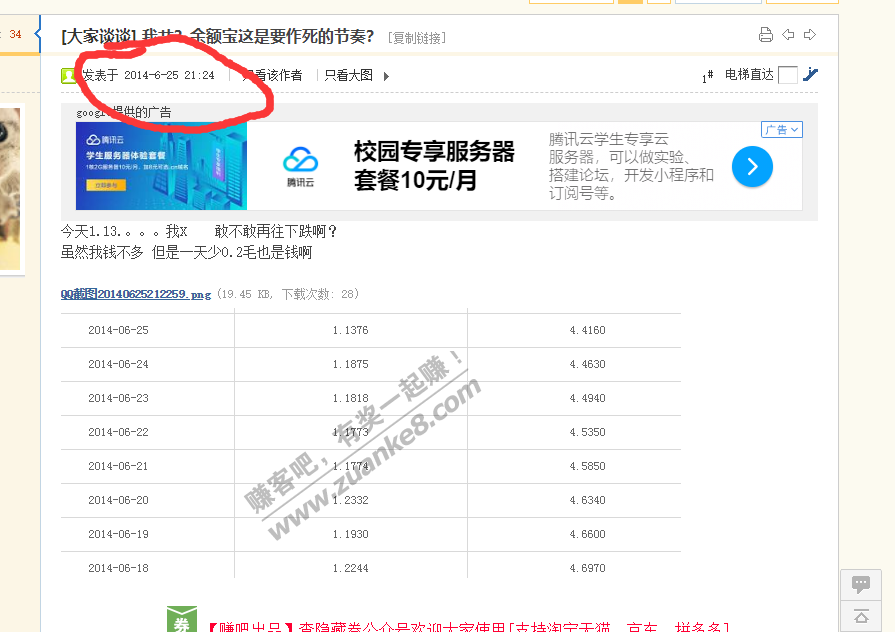

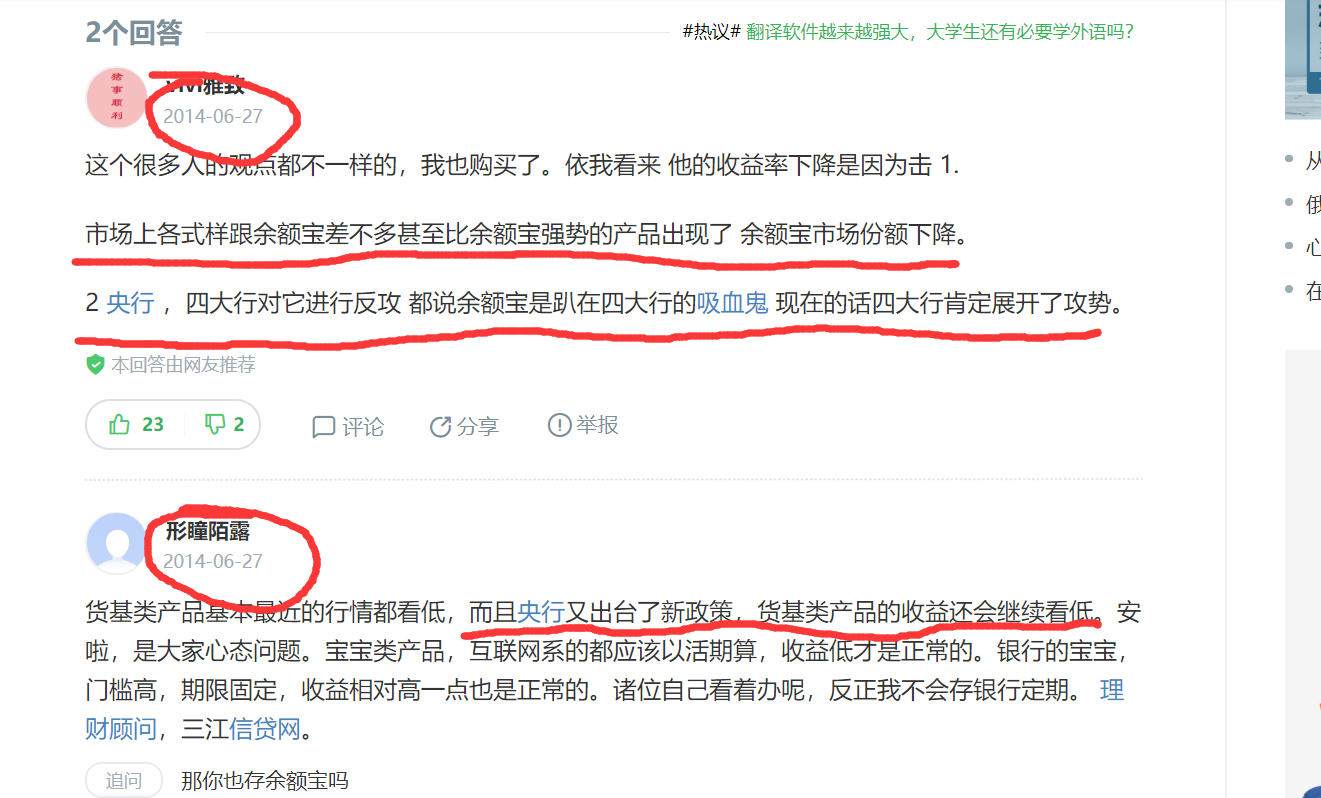

---

接下来，我们要对节假日进行分析，毕竟之前我们已经发现一些特殊的时间节点会导致申购和赎回的量级有明显的影响，那么节假日的分析就很有必要

## 五、对于节假期的分析

1. The QingMing festerval (April.5 - April.7)
2. The Labour day      (May.1 - May.5)
3. The DuanWu festeval (May.31 - June.2)
4. The MidAutumn festeval (Sep.6 - Sep.8)

Others

1. Mother day(May.13)
2. Father day(June. 17)
3. TianMao 618 sales(June 10 - June 20)
4. Teachers' day(Sep 9)

In [39]:
total_balance['date'] = total_balance['date'].dt.date

In [40]:
# 获取节假日的数据
qingming = total_balance[(total_balance['date'] >= datetime.date(2014,4,5)) & (total_balance['date'] < datetime.date(2014,4,8))]
labour = total_balance[(total_balance['date'] >= datetime.date(2014,5,1)) & (total_balance['date'] < datetime.date(2014,5,4))]
duanwu = total_balance[(total_balance['date'] >= datetime.date(2014,5,31)) & (total_balance['date'] < datetime.date(2014,6,3))]
data618 = total_balance[(total_balance['date'] >= datetime.date(2014,6,10)) & (total_balance['date'] < datetime.date(2014,6,20))]

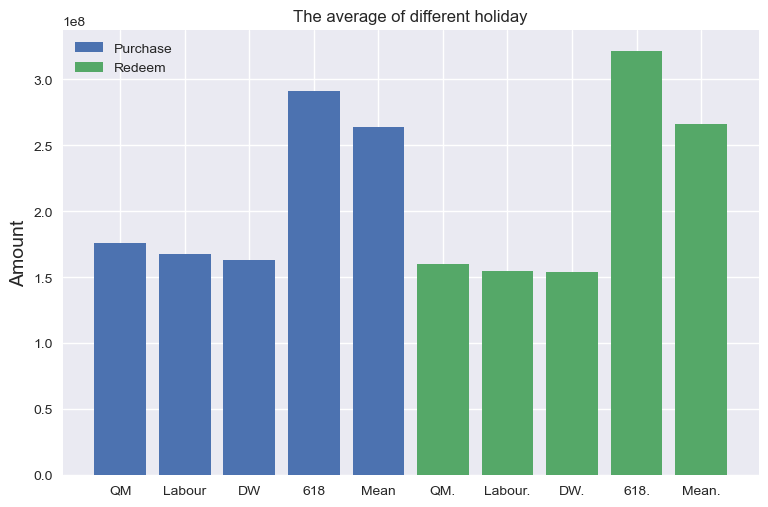

In [41]:
# 画出节假日与平时的均值

fig = plt.figure()   # 构建画布
index_list = ['QM','Labour','DW','618','Mean']  # 计算x轴的内容
label_list = [np.mean(qingming['total_purchase_amt']), np.mean(labour['total_purchase_amt']),np.mean(duanwu['total_purchase_amt']),np.mean(data618['total_purchase_amt']),np.mean(total_balance_1['total_purchase_amt'])]
plt.bar(index_list, label_list, label="Purchase")

index_list = ['QM.','Labour.','DW.','618.','Mean.']
label_list = [np.mean(qingming['total_redeem_amt']), np.mean(labour['total_redeem_amt']),np.mean(duanwu['total_redeem_amt']),np.mean(data618['total_redeem_amt']),np.mean(total_balance_1['total_redeem_amt'])]
plt.bar(index_list, label_list, label="Redeem")
plt.title("The average of different holiday")
plt.ylabel("Amount")
plt.legend()
plt.show()

## 对于节假日周边日期的分析

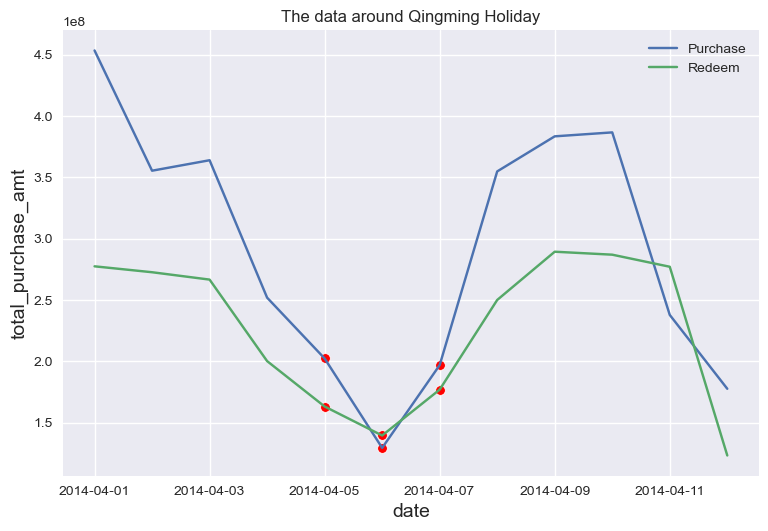

In [42]:
# 画出清明节与周边日期的时序图

qingming_around = total_balance[(total_balance['date'] >= datetime.date(2014,4,1)) & (total_balance['date'] < datetime.date(2014,4,13))]
ax = sns.lineplot(x="date", y="total_purchase_amt", data=qingming_around, label='Purchase')
ax = sns.lineplot(x="date", y="total_redeem_amt", data=qingming_around, label='Redeem', ax=ax)
ax = sns.scatterplot(x="date", y="total_purchase_amt", data=qingming, ax=ax, color = 'red')
ax = sns.scatterplot(x="date", y="total_redeem_amt", data=qingming, ax=ax,color = 'red')
plt.title("The data around Qingming Holiday")
ax.legend()

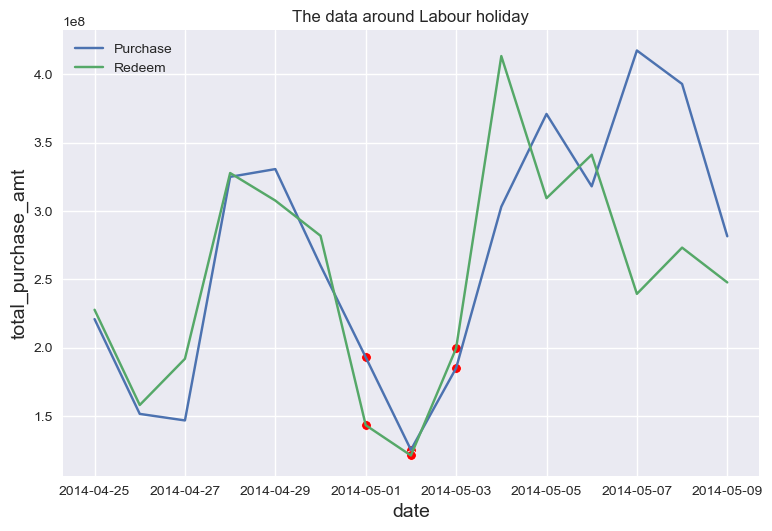

In [43]:
# 画出劳动节与周边日期的时序图

labour_around = total_balance[(total_balance['date'] >= datetime.date(2014,4,25)) & (total_balance['date'] < datetime.date(2014,5,10))]
ax = sns.lineplot(x="date", y="total_purchase_amt", data=labour_around, label='Purchase')
ax = sns.lineplot(x="date", y="total_redeem_amt", data=labour_around, label='Redeem', ax=ax)
ax = sns.scatterplot(x="date", y="total_purchase_amt", data=labour, ax=ax, color = 'red')
ax = sns.scatterplot(x="date", y="total_redeem_amt", data=labour, ax=ax, color = 'red')
plt.title("The data around Labour holiday")
ax.legend()

In [44]:
# 画出端午节与周边日期的时序图

# have a try

In [45]:
# duanwu_around = total_balance[(total_balance['date'] >= datetime.date(2014,5,25)) & (total_balance['date'] < datetime.date(2014,6,7))]
# ax = sns.lineplot(x="date", y="total_purchase_amt", data=duanwu_around, label='Purchase')
# ax = sns.lineplot(x="date", y="total_redeem_amt", data=duanwu_around, label='Redeem', ax=ax)
# ax = sns.scatterplot(x="date", y="total_purchase_amt", data=duanwu, ax=ax, color = 'red')
# ax = sns.scatterplot(x="date", y="total_redeem_amt", data=duanwu, ax=ax, color = 'red')
# plt.title("The data around Duanwu Holiday")
# ax.legend()

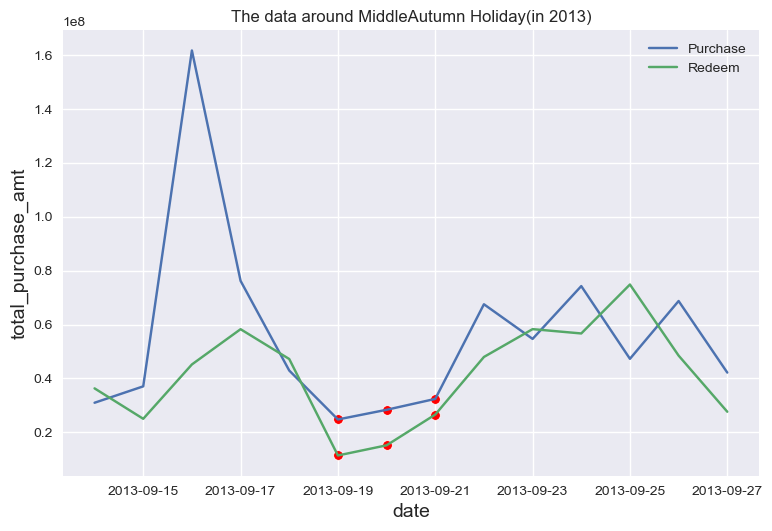

In [46]:
# 画出中秋与周边日期的时序图

zhongqiu = total_balance[(total_balance['date'] >= datetime.date(2013,9,19)) & (total_balance['date'] < datetime.date(2013,9,22))]
zhongqiu_around = total_balance[(total_balance['date'] >= datetime.date(2013,9,14)) & (total_balance['date'] < datetime.date(2013,9,28))]
ax = sns.lineplot(x="date", y="total_purchase_amt", data=zhongqiu_around, label='Purchase')
ax = sns.lineplot(x="date", y="total_redeem_amt", data=zhongqiu_around, label='Redeem', ax=ax)
ax = sns.scatterplot(x="date", y="total_purchase_amt", data=zhongqiu, ax=ax, color='red')
ax = sns.scatterplot(x="date", y="total_redeem_amt", data=zhongqiu, ax=ax, color = 'red')
plt.title("The data around MiddleAutumn Holiday(in 2013)")
ax.legend()

## 对于异常值的分析

Text(0.5, 1.0, 'The abnormal value of total purchase')

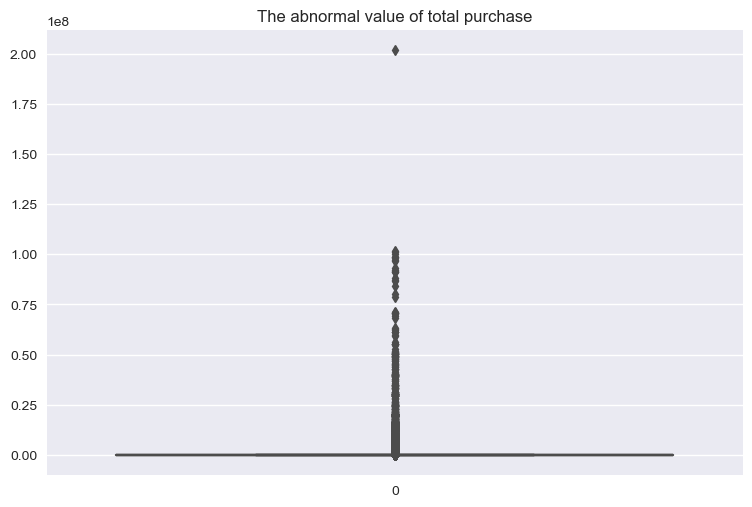

In [47]:
# 画出用户交易纪录的箱型图

sns.boxplot(data_balance['total_purchase_amt'])
plt.title("The abnormal value of total purchase")

In [48]:
# 对于购买2e8的用户的交易行为分析

data_balance[data_balance['user_id'] == 14592]\
.sort_values(by = 'total_redeem_amt',axis = 0,ascending = False).head()

user_id  report_date  tBalance  yBalance  total_purchase_amt  \
1453311    14592     20131104  99457728         0           201768328   
1453388    14592     20140616         0  98964529             1966014   
1453227    14592     20131226    367063  98296082               17369   
1453313    14592     20131105  97458675  99457728             4899446   
1453355    14592     20140617         0         0              339679   

         direct_purchase_amt  purchase_bal_amt  purchase_bank_amt  \
1453311            201768328         201275171             493157   
1453388              1953569                 0            1953569   
1453227                    0                 0                  0   
1453313              4899446           4899446                  0   
1453355               339679                 0             339679   

         total_redeem_amt  consume_amt  ...  category1  category2  category3  \
1453311         102310600            0  ...        NaN        NaN        NaN   
1453388         100930543            0  ...        NaN        NaN        NaN   
1453227          97946388            0  ...        NaN        NaN        NaN   
1453313           6898499            0  ...        NaN        NaN        NaN   
1453355            339679            0  ...        NaN        NaN        NaN   

         category4       date  day  month  year week  weekday  
1453311        NaN 2013-11-04    4     11  2013   45        0  
1453388        NaN 2014-06-16   16      6  2014   25        0  
1453227        NaN 2013-12-26   26     12  2013   52        3  
1453313        NaN 2013-11-05    5     11  2013   45        1  
1453355        NaN 2014-06-17   17      6  2014   25        1  

[5 rows x 24 columns]

In [49]:
# data_balance[data_balance['user_id'] == 14592].nlargest(5,'total_redeem_amt')

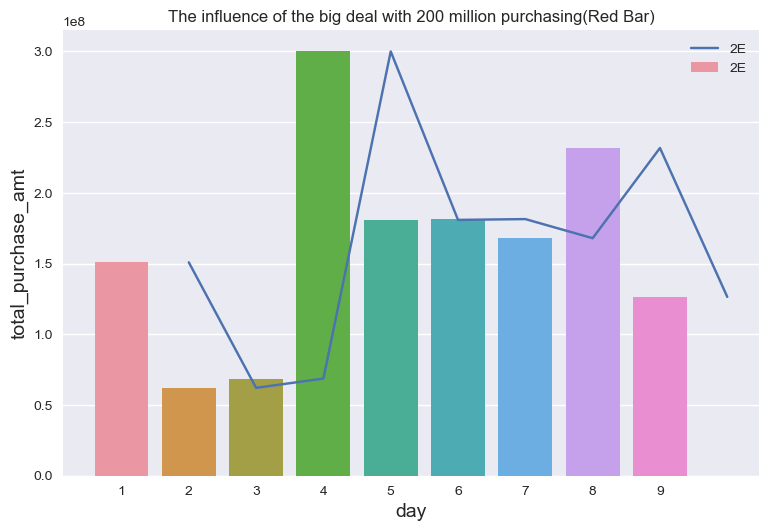

In [50]:
# 画出单笔交易为2e8的那天的总交易量及附近几天的交易量

e2 = total_balance[(total_balance['date'] >= datetime.date(2013,11,1)) & (total_balance['date'] < datetime.date(2013,11,10))]
ax = sns.barplot(x="day", y="total_purchase_amt", data=e2, label='2E')
ax = sns.lineplot(x="day", y="total_purchase_amt", data=e2, label='2E')
plt.title("The influence of the big deal with 200 million purchasing(Red Bar)")
ax.legend()

Text(0.5, 1.0, 'The Biggest deal happend in each day')

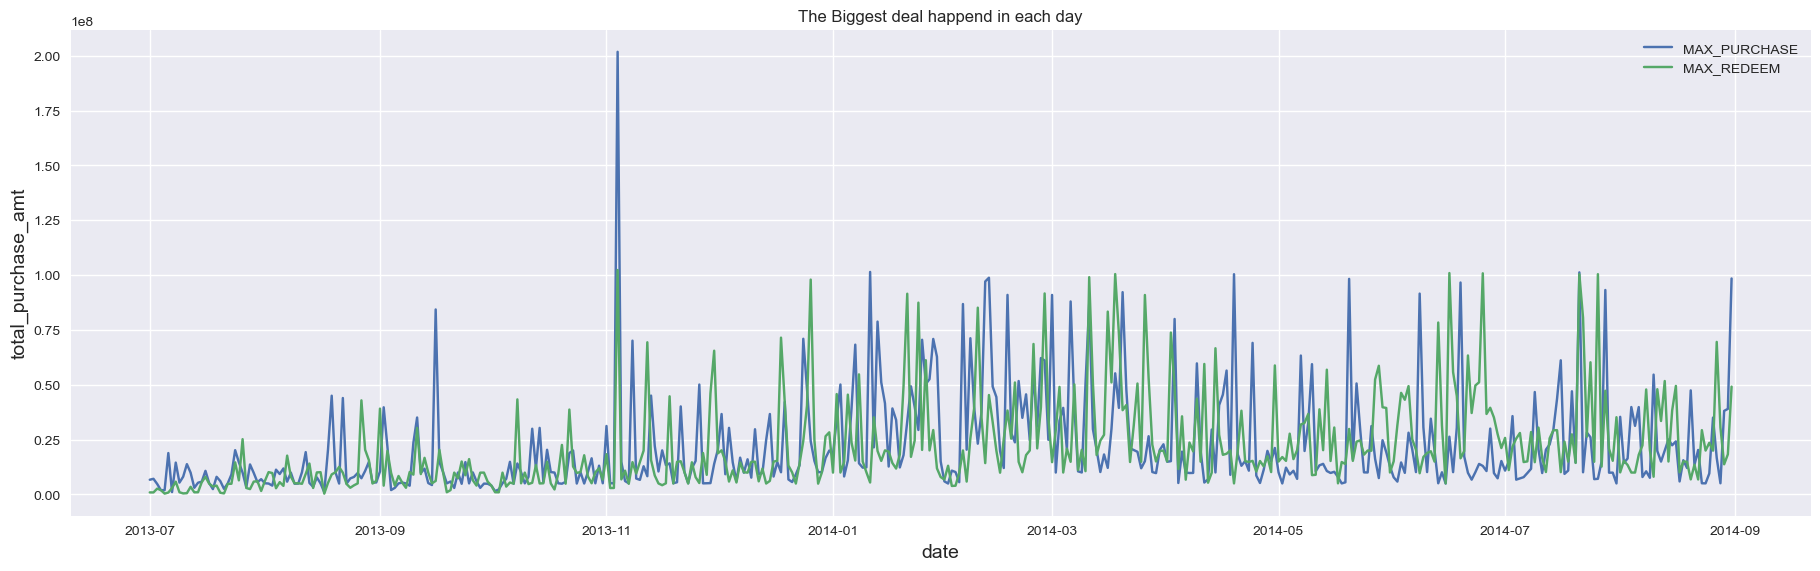

In [51]:
# 画出每日单笔最大交易的时序图

plt.figure(figsize=(20, 6))
ax = sns.lineplot(x="date", y="total_purchase_amt", data=data_balance[['total_purchase_amt', 'date']].groupby('date', as_index=False).max(), label='MAX_PURCHASE')
ax = sns.lineplot(x="date", y="total_redeem_amt", data=data_balance[['total_redeem_amt', 'date']].groupby('date', as_index=False).max(), label='MAX_REDEEM')
plt.title("The Biggest deal happend in each day")

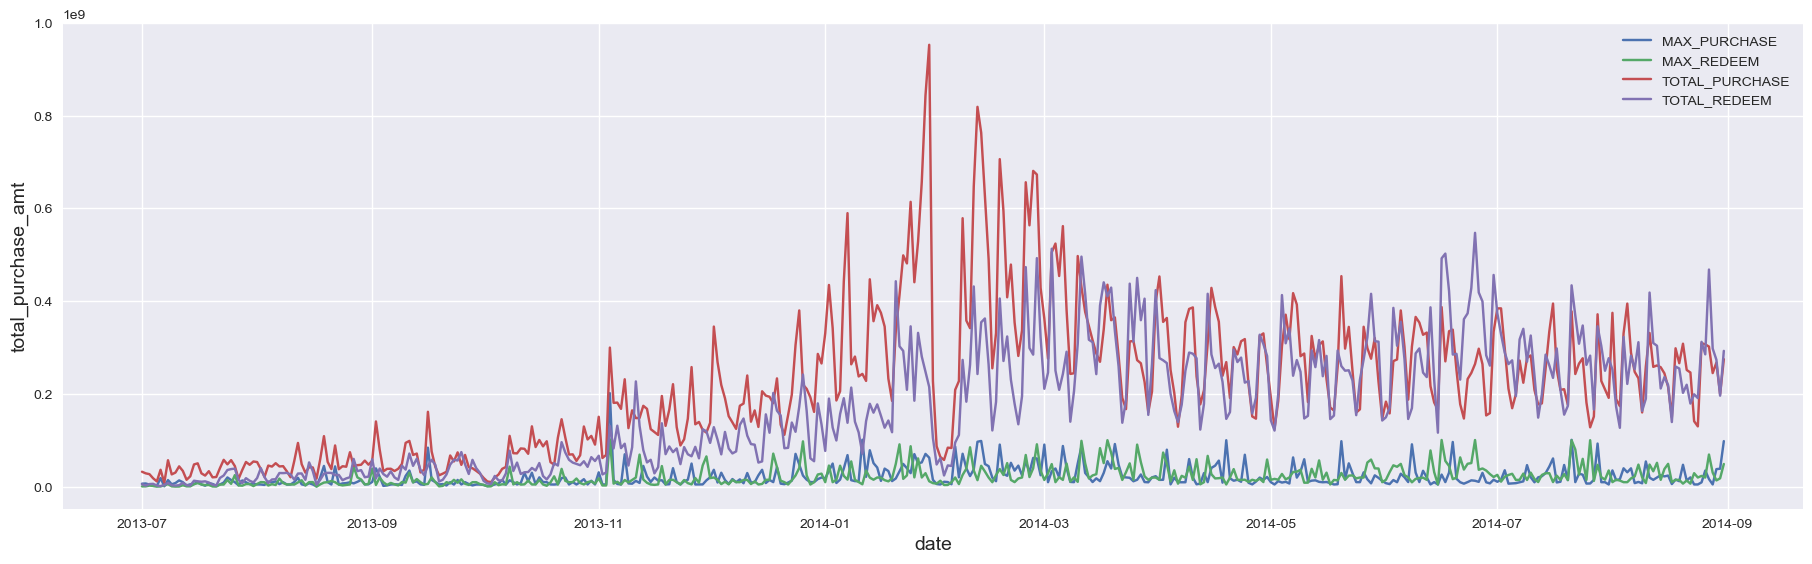

In [52]:
# 画出每日单笔最大交易以及总交易额的时序图

plt.figure(figsize=(20, 6))
ax = sns.lineplot(x="date", y="total_purchase_amt", data=data_balance[['total_purchase_amt', 'date']].groupby('date', as_index=False).max(), label='MAX_PURCHASE')
ax = sns.lineplot(x="date", y="total_redeem_amt", data=data_balance[['total_redeem_amt', 'date']].groupby('date', as_index=False).max(), label='MAX_REDEEM')
ax = sns.lineplot(x="date", y="total_purchase_amt", data=data_balance[['total_purchase_amt', 'date']].groupby('date', as_index=False).sum(), label='TOTAL_PURCHASE')
ax = sns.lineplot(x="date", y="total_redeem_amt", data=data_balance[['total_redeem_amt', 'date']].groupby('date', as_index=False).sum(), label='TOTAL_REDEEM')

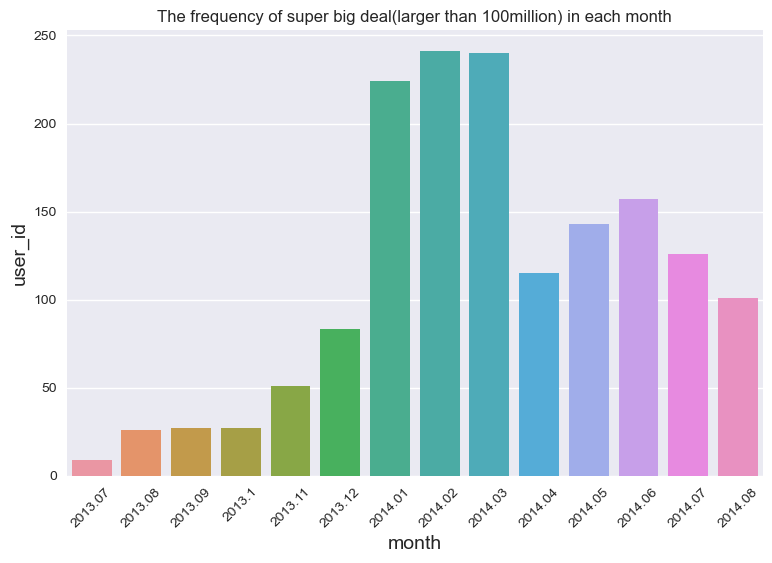

In [53]:
# 画出每个月大额交易的频次直方图

big_frequancy = data_balance[(data_balance['total_purchase_amt'] > 10000000) | (data_balance['total_redeem_amt'] > 10000000)][['month','year','user_id']].groupby(['year','month'], as_index=False).count()
big_frequancy['i'] = big_frequancy['year']  + big_frequancy['month'] / 100
ax = sns.barplot(x="i", y="user_id", data=big_frequancy)
plt.title("The frequency of super big deal(larger than 100million) in each month")
plt.xlabel('month')
plt.xticks(rotation = 45)
plt.show()

In [54]:
# 获取大额交易的数据集
data_balance['big_purchase'] = data_balance['total_purchase_amt'].apply(lambda x: 1 if x>1000000 else 0)
data_balance['big_redeem'] = data_balance['total_redeem_amt'].apply(lambda x: 1 if x>1000000 else 0)

In [55]:
# 对大额交易按每天做聚合操作

big_purchase = data_balance[data_balance['big_purchase'] == 1].groupby(['date'], as_index=False)['total_purchase_amt'].sum()
small_purchase = data_balance[data_balance['big_purchase'] == 0].groupby(['date'], as_index=False)['total_purchase_amt'].sum()
big_redeem = data_balance[data_balance['big_redeem'] == 1].groupby(['date'], as_index=False)['total_redeem_amt'].sum()
small_redeem = data_balance[data_balance['big_redeem'] == 0].groupby(['date'], as_index=False)['total_redeem_amt'].sum()

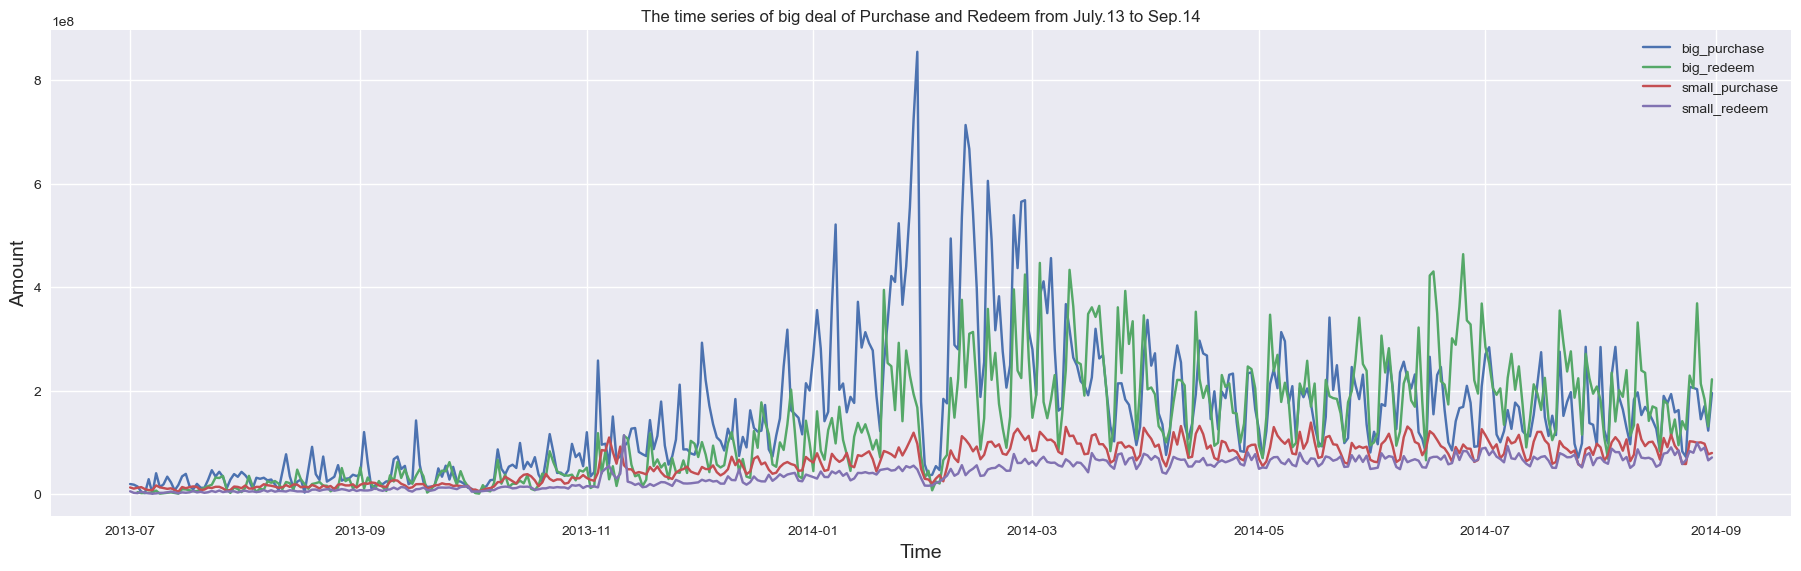

In [56]:
# 画出大额交易与小额交易的时序分布图

fig = plt.figure(figsize=(20,6))
plt.plot(big_purchase['date'], big_purchase['total_purchase_amt'],label='big_purchase')
plt.plot(big_redeem['date'], big_redeem['total_redeem_amt'],label='big_redeem')

plt.plot(small_purchase['date'], small_purchase['total_purchase_amt'],label='small_purchase')
plt.plot(small_redeem['date'], small_redeem['total_redeem_amt'],label='small_redeem')
plt.legend(loc='best')
plt.title("The time series of big deal of Purchase and Redeem from July.13 to Sep.14")
plt.xlabel("Time")
plt.ylabel("Amount")
plt.show()

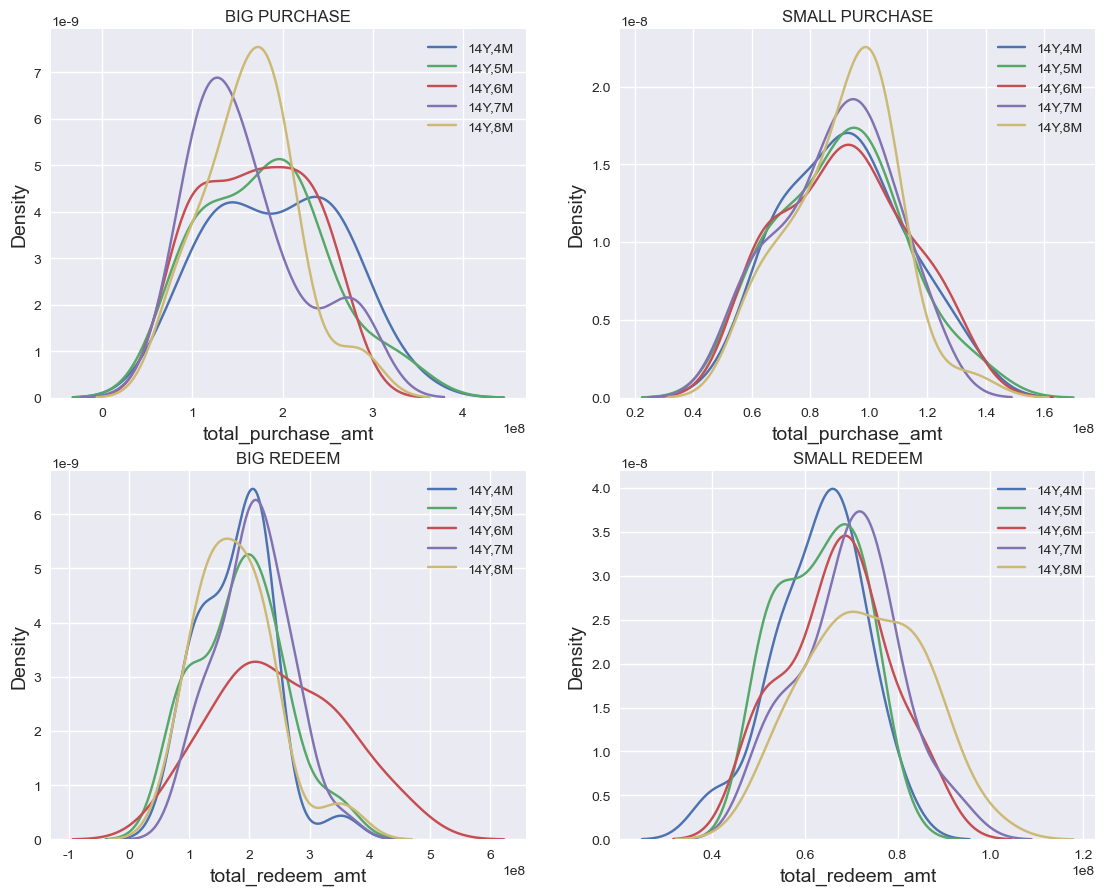

In [57]:
# 画出大额交易与小额交易的分布估计图

plt.figure(figsize=(12,10))

plt.subplot(2,2,1)
big_purchase.date = big_purchase.date.dt.date
for i in range(4, 9):
    sns.kdeplot(big_purchase[(big_purchase['date'] >= datetime.date(2014,i,1)) & (big_purchase['date'] < datetime.date(2014,i+1,1))]['total_purchase_amt'],label='14Y,'+str(i)+'M')
plt.title('BIG PURCHASE')
plt.legend()

plt.subplot(2,2,2)
small_purchase.date = small_purchase.date.dt.date
for i in range(4, 9):
    sns.kdeplot(small_purchase[(small_purchase['date'] >= datetime.date(2014,i,1)) & (small_purchase['date'] < datetime.date(2014,i+1,1))]['total_purchase_amt'],label='14Y,'+str(i)+'M')
plt.title('SMALL PURCHASE')
plt.legend()

plt.subplot(2,2,3)
big_redeem.date = big_redeem.date.dt.date
for i in range(4, 9):
    sns.kdeplot(big_redeem[(big_redeem['date'] >= datetime.date(2014,i,1)) & (big_redeem['date'] < datetime.date(2014,i+1,1))]['total_redeem_amt'],label='14Y,'+str(i)+'M')
plt.title('BIG REDEEM')
plt.legend()

plt.subplot(2,2,4)
small_redeem.date = small_redeem.date.dt.date
for i in range(4, 9):
    sns.kdeplot(small_redeem[(small_redeem['date'] >= datetime.date(2014,i,1)) & (small_redeem['date'] < datetime.date(2014,i+1,1))]['total_redeem_amt'],label='14Y,'+str(i)+'M')
plt.title('SMALL REDEEM')
plt.legend()

In [58]:
# 添加时间戳

big_purchase['weekday'] = pd.to_datetime(big_purchase['date']).dt.weekday
small_purchase['weekday'] = pd.to_datetime(small_purchase['date']).dt.weekday
big_redeem['weekday'] = pd.to_datetime(big_redeem['date']).dt.weekday
small_redeem['weekday'] = pd.to_datetime(small_redeem['date']).dt.weekday

Text(0.5, 1.0, 'SMALL REDEEM')

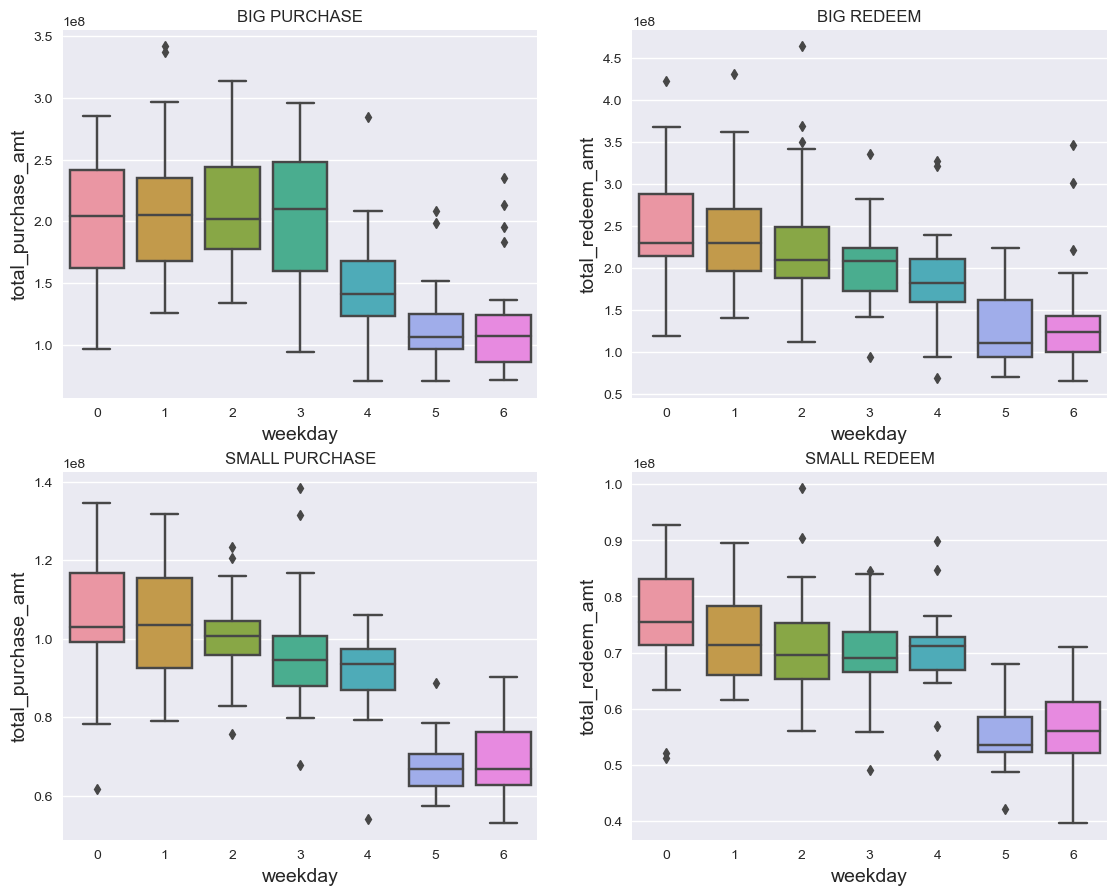

In [59]:
# 分析大额小额的翌日分布

plt.figure(figsize=(12, 10))

ax = plt.subplot(2,2,1)
ax = sns.boxplot(x="weekday", y="total_purchase_amt", data=big_purchase[big_purchase['date'] >= datetime.date(2014,4,1)])
plt.title('BIG PURCHASE')

ax = plt.subplot(2,2,2)
ax = sns.boxplot(x="weekday", y="total_redeem_amt", data=big_redeem[big_redeem['date'] >= datetime.date(2014,4,1)])
plt.title('BIG REDEEM')

ax = plt.subplot(2,2,3)
ax = sns.boxplot(x="weekday", y="total_purchase_amt", data=small_purchase[small_purchase['date'] >= datetime.date(2014,4,1)])
plt.title('SMALL PURCHASE')

ax = plt.subplot(2,2,4)
ax = sns.boxplot(x="weekday", y="total_redeem_amt", data=small_redeem[small_redeem['date'] >= datetime.date(2014,4,1)])
plt.title('SMALL REDEEM')

## 分析用户交易纪录表中其他变量

In [60]:
# 截断数据集
data_balance_1 = data_balance[data_balance['date'] > datetime.datetime(2014,4,1)]

Text(0.5, 1.0, 'The coleration between each feature in User_Balance_Table')

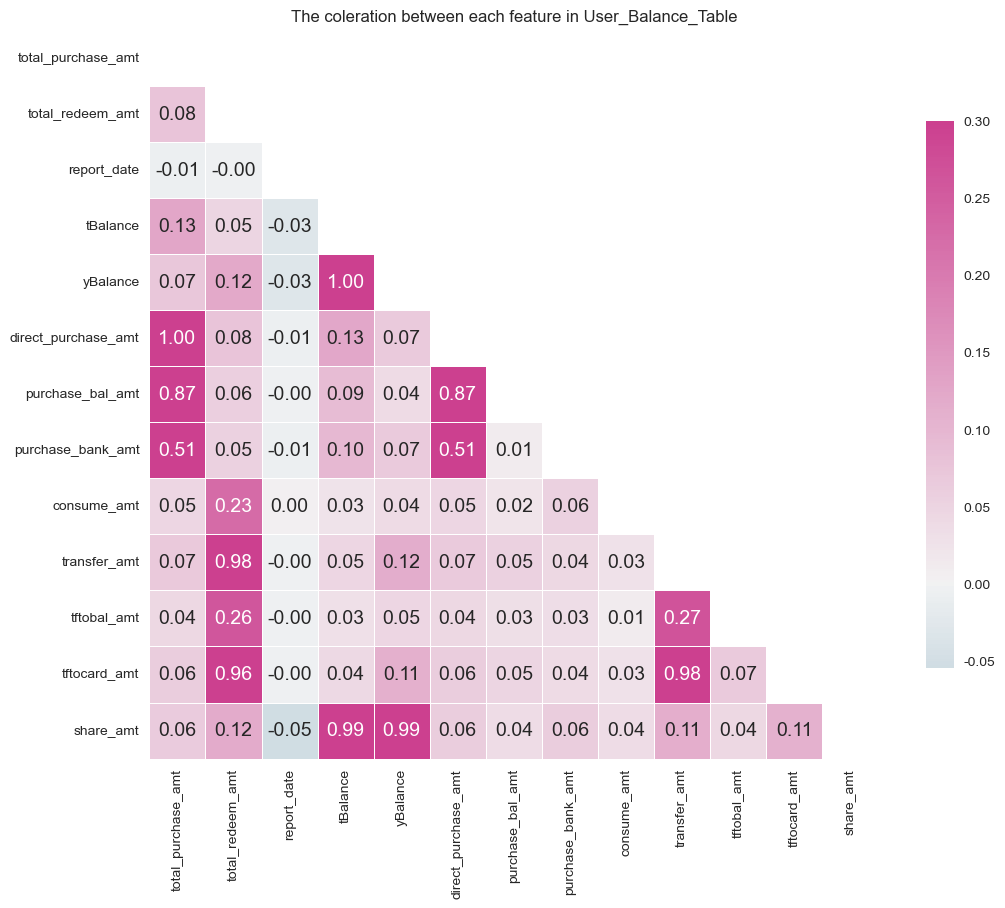

In [61]:
# 画出用户交易纪录表中其他变量与标签的相关性图

feature = ['total_purchase_amt','total_redeem_amt', 'report_date', 'tBalance', 'yBalance', 
       'direct_purchase_amt', 'purchase_bal_amt', 'purchase_bank_amt',
        'consume_amt', 'transfer_amt', 'tftobal_amt',
       'tftocard_amt', 'share_amt']

plt.style.use('seaborn-white')

corr_mat = data_balance_1[feature].corr()
mask = np.triu(np.ones_like(corr_mat, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, -20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr_mat, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .75},annot=True,fmt='.2f')
 
plt.title("The coleration between each feature in User_Balance_Table")

## 对于银行及支付宝利率的分析

In [62]:
# 读取银行利率并添加时间戳

bank = pd.read_csv("mfd_bank_shibor.csv")
bank = bank.rename(columns = {'mfd_date': 'date'})
bank_features = [x for x in bank.columns if x not in ['date']]
bank['date'] = pd.to_datetime(bank['date'], format= "%Y%m%d")
bank['day'] = bank['date'].dt.day
bank['month'] = bank['date'].dt.month
bank['year'] = bank['date'].dt.year
bank['week'] = bank['date'].dt.week
bank['weekday'] = bank['date'].dt.weekday

In [63]:
# 读取支付宝利率并添加时间戳

share = pd.read_csv('mfd_day_share_interest.csv')
share = share.rename(columns = {'mfd_date': 'date'})
share_features = [x for x in share.columns if x not in ['date']]
share['date'] = pd.to_datetime(share['date'], format= "%Y%m%d")
share['day'] = share['date'].dt.day
share['month'] = share['date'].dt.month
share['year'] = share['date'].dt.year
share['week'] = share['date'].dt.week
share['weekday'] = share['date'].dt.weekday

<Axes: title={'center': 'The coleration between each lastday bank rate and total redeem'}>

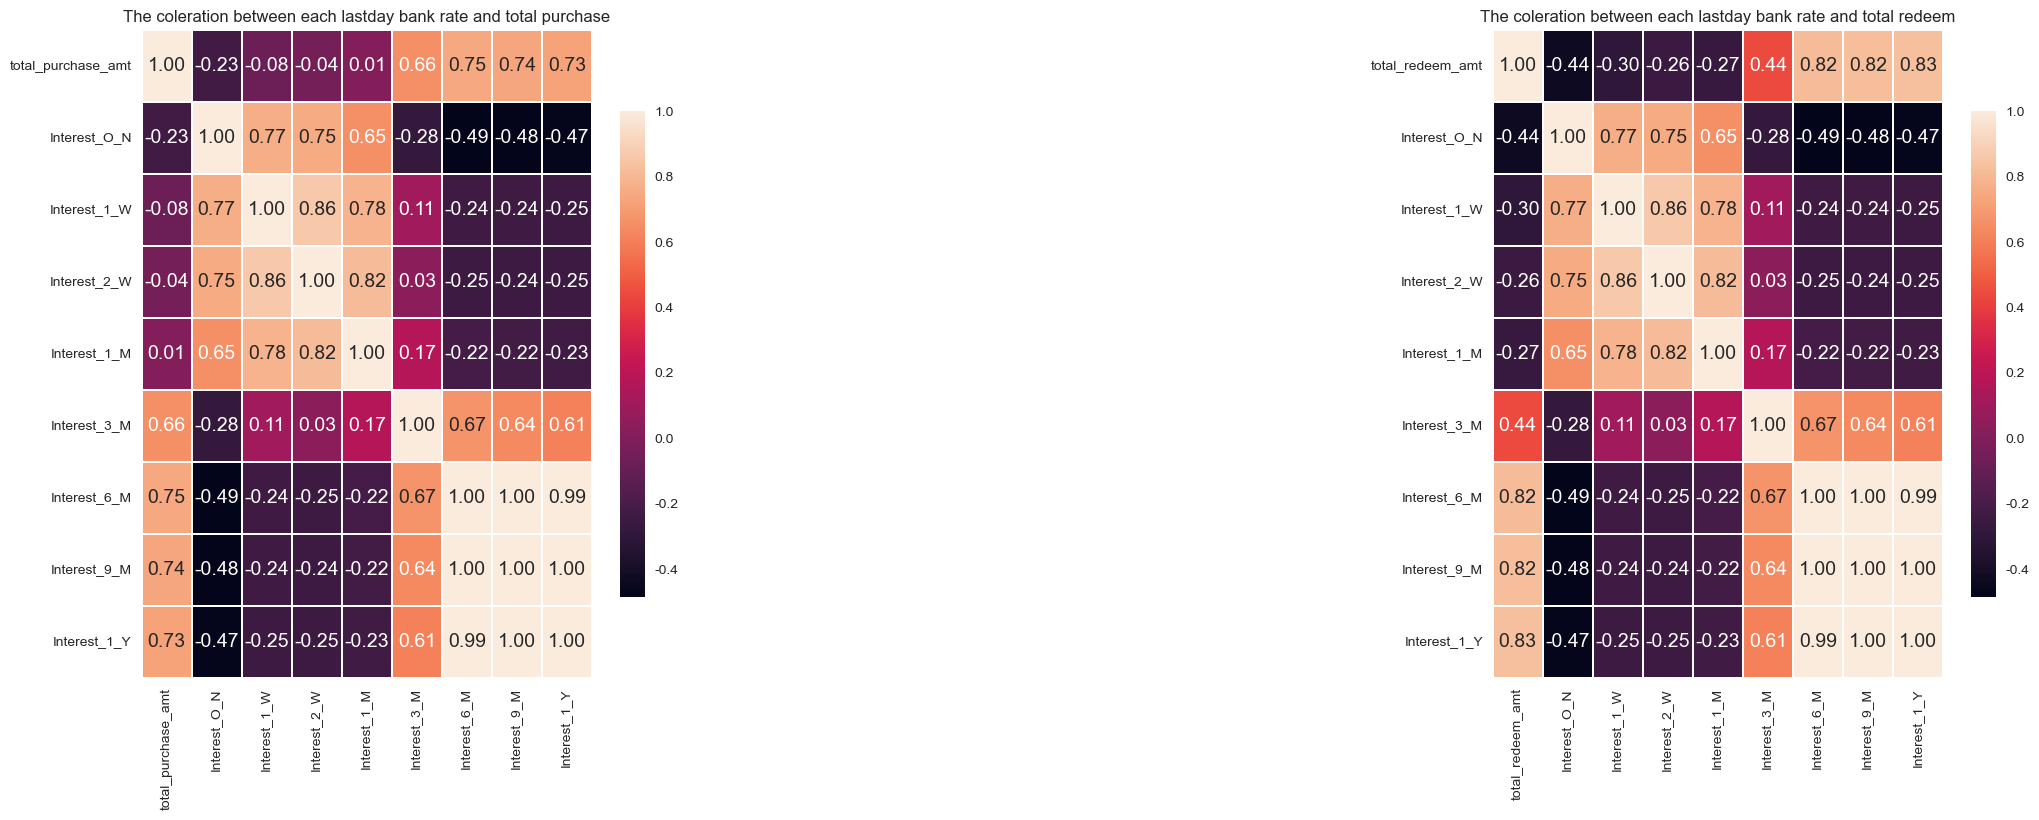

In [64]:
# 画出上一天银行及支付宝利率与标签的相关性图

bank['last_date'] = bank['date'] + datetime.timedelta(days=-1)
bank['last_date'] = bank['last_date'].dt.date
plt.figure(figsize=(22,8))
plt.subplot(1,3,1)
plt.title("The coleration between each lastday bank rate and total purchase")
temp = pd.merge(bank[['last_date']+bank_features], total_balance, left_on='last_date', right_on='date')[['total_purchase_amt']+bank_features]
sns.heatmap(temp.corr(), linewidths = 0.05,cbar_kws={"shrink": .75},annot=True,fmt='.2f')  
plt.subplot(1,3,3)
plt.title("The coleration between each lastday bank rate and total redeem")
temp = pd.merge(bank[['last_date']+bank_features], total_balance, left_on='last_date', right_on='date')[['total_redeem_amt']+bank_features]
sns.heatmap(temp.corr(), linewidths = 0.05,cbar_kws={"shrink": .75},annot=True,fmt='.2f')  

<Axes: title={'center': 'The coleration of Big Rate redeem'}>

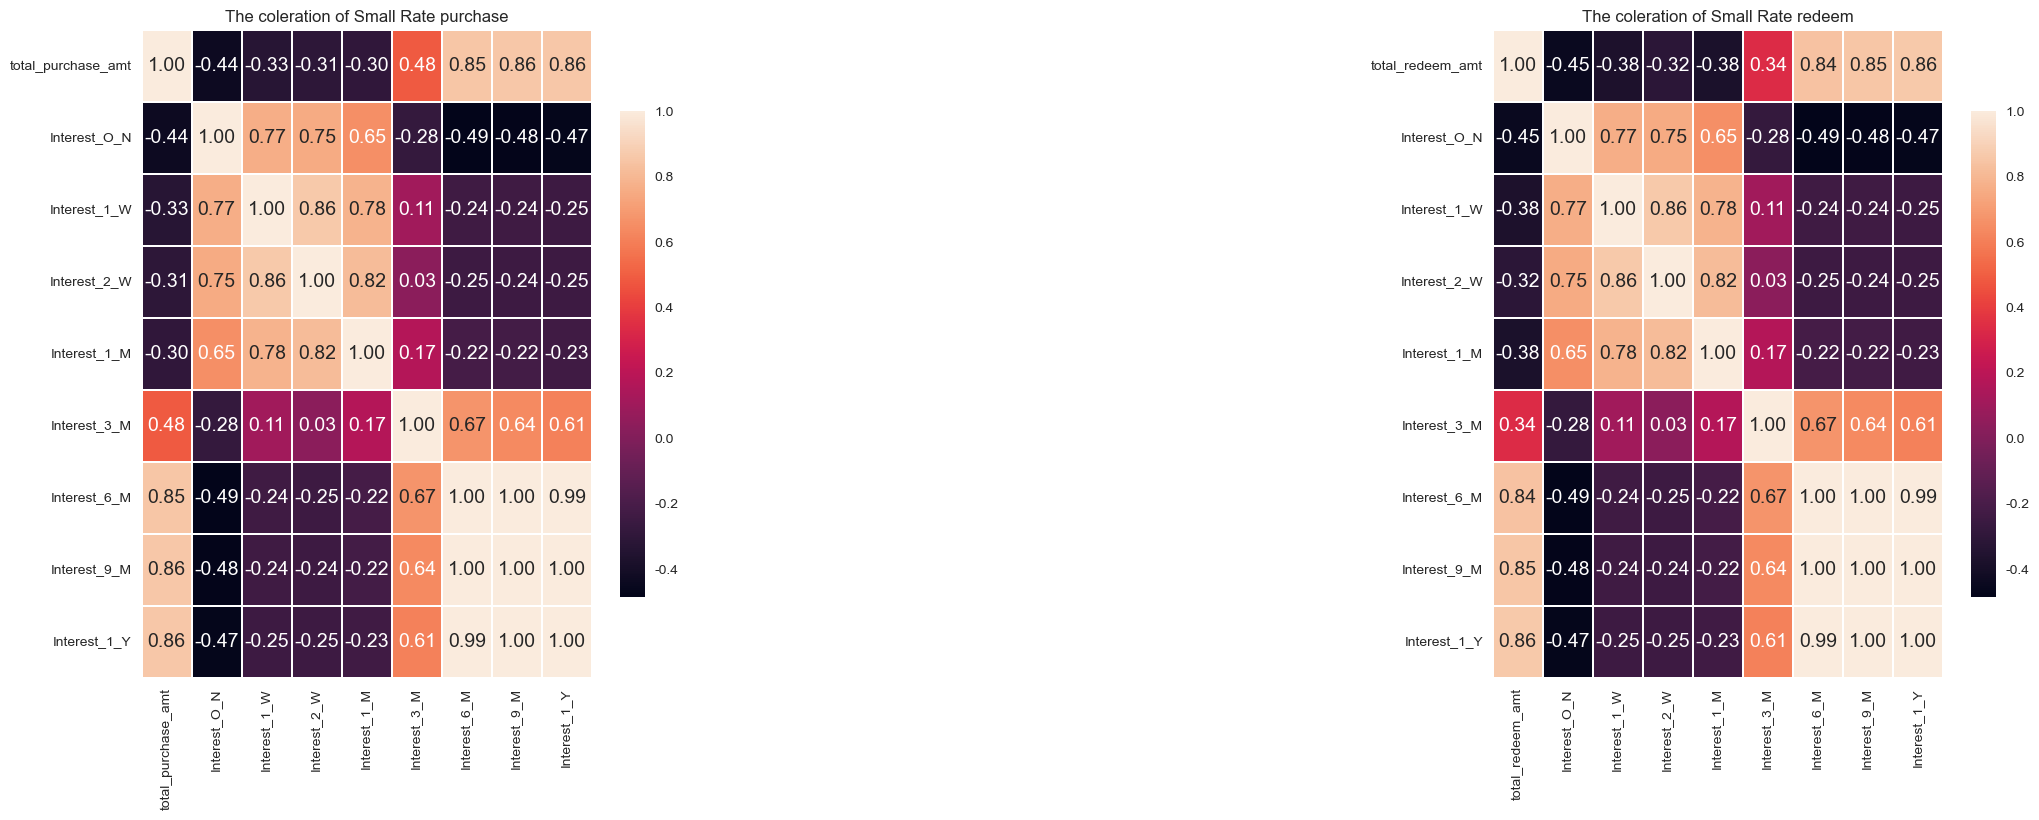

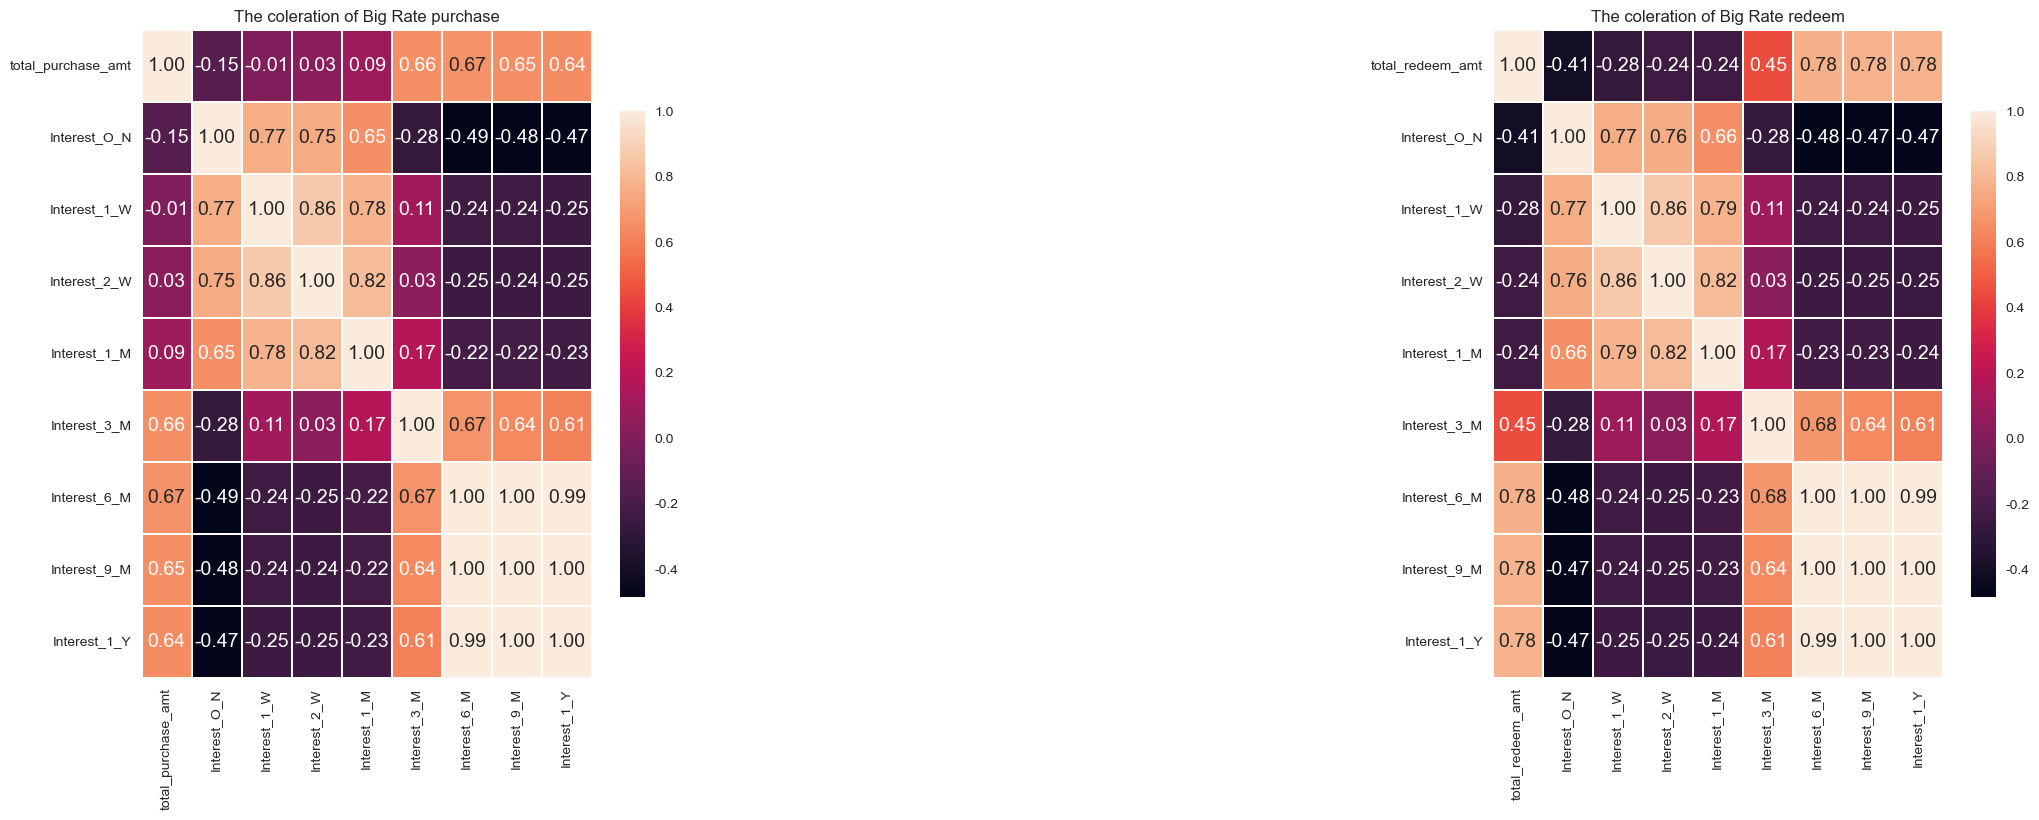

In [65]:
# 分别画出上一天银行及支付宝利率与大额小额数据的相关性图

bank['last_date'] = bank['date'] + datetime.timedelta(days=-1)
plt.figure(figsize=(22,8))
plt.subplot(1,3,1)
plt.title("The coleration of Small Rate purchase")
small_purchase.date = pd.to_datetime(small_purchase.date)
temp = pd.merge(bank[['last_date']+bank_features], small_purchase, left_on='last_date', right_on='date')[['total_purchase_amt']+bank_features]
sns.heatmap(temp.corr(), linewidths = 0.05,cbar_kws={"shrink": .75},annot=True,fmt='.2f')  
plt.subplot(1,3,3)
plt.title("The coleration of Small Rate redeem")
small_redeem.date = pd.to_datetime(small_redeem.date)
temp = pd.merge(bank[['last_date']+bank_features], small_redeem, left_on='last_date', right_on='date')[['total_redeem_amt']+bank_features]
sns.heatmap(temp.corr(), linewidths = 0.05,cbar_kws={"shrink": .75},annot=True,fmt='.2f')  

bank['last_date'] = bank['date'] + datetime.timedelta(days=-1)
plt.figure(figsize=(22,8))
plt.subplot(1,3,1)
plt.title("The coleration of Big Rate purchase")
big_purchase.date = pd.to_datetime(big_purchase.date)
temp = pd.merge(bank[['last_date']+bank_features], big_purchase, left_on='last_date', right_on='date')[['total_purchase_amt']+bank_features]
sns.heatmap(temp.corr(), linewidths = 0.05,cbar_kws={"shrink": .75},annot=True,fmt='.2f')  
plt.subplot(1,3,3)
plt.title("The coleration of Big Rate redeem")
big_redeem.date = pd.to_datetime(big_redeem.date)
temp = pd.merge(bank[['last_date']+bank_features], big_redeem, left_on='last_date', right_on='date')[['total_redeem_amt']+bank_features]
sns.heatmap(temp.corr(), linewidths = 0.05,cbar_kws={"shrink": .75},annot=True,fmt='.2f')  

Text(0, 0.5, 'Rate')

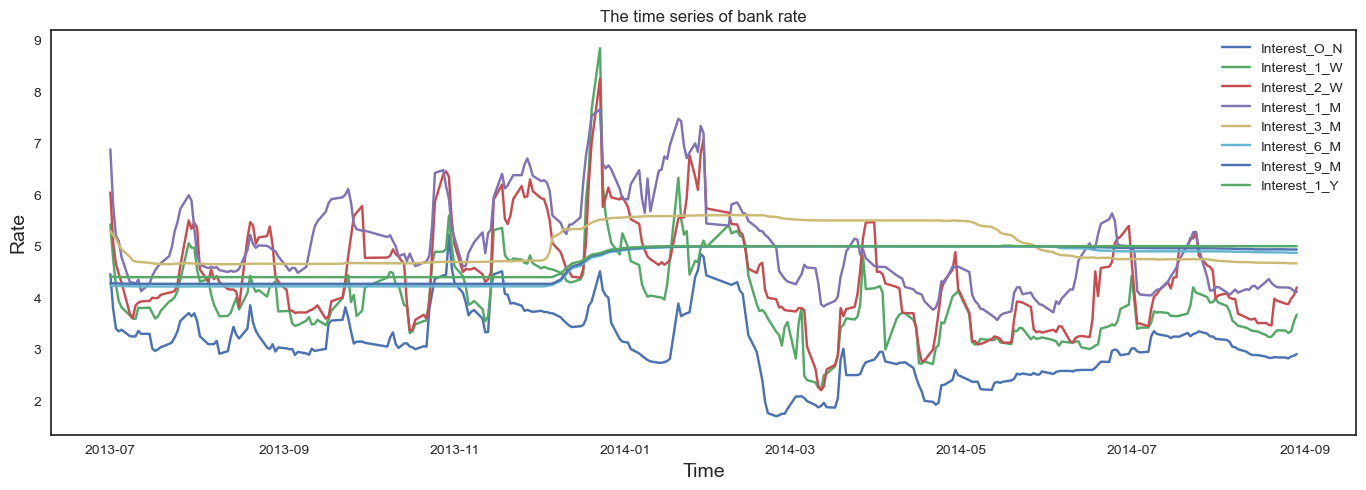

In [66]:
# 画出银行利率的时序图

plt.figure(figsize=(15,5))
for i in bank_features:
    plt.plot(bank['date'], bank[[i]] ,label=i)
plt.legend()
plt.title("The time series of bank rate")
plt.xlabel("Time")
plt.ylabel("Rate")

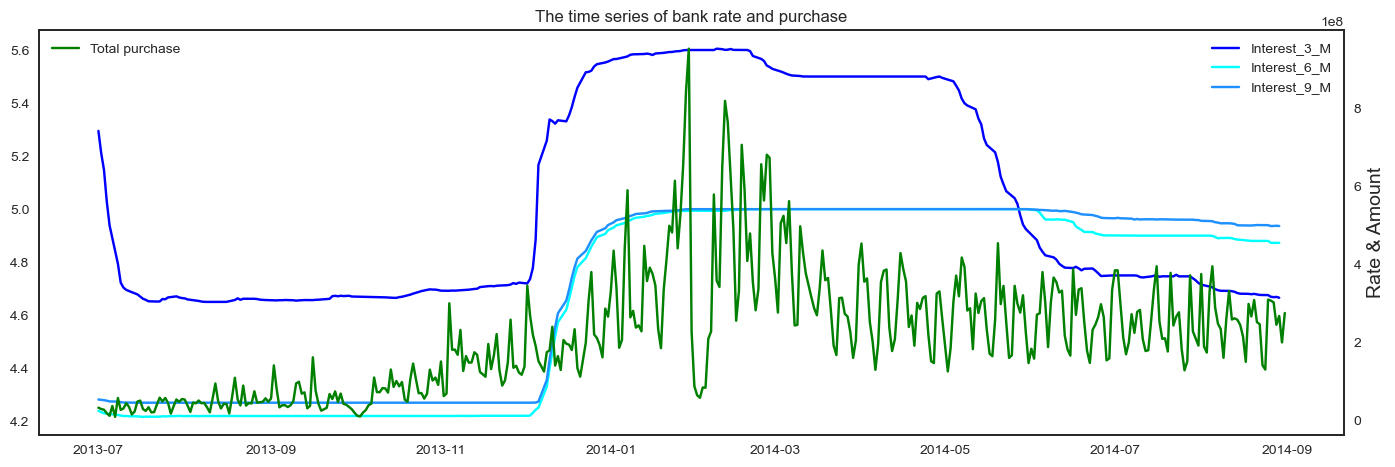

In [67]:
# 画出部分银行利率与购买量的时序图

fig,ax1 = plt.subplots(figsize=(15,5))
plt.plot(bank['date'], bank['Interest_3_M'],'b',label="Interest_3_M")
plt.plot(bank['date'], bank['Interest_6_M'],'cyan',label="Interest_6_M")
plt.plot(bank['date'], bank['Interest_9_M'],'dodgerblue',label="Interest_9_M")

plt.legend()

ax2=ax1.twinx()
plt.plot(total_balance['date'], total_balance['total_purchase_amt'],'g',label="Total purchase")

plt.legend(loc=2)
plt.title("The time series of bank rate and purchase")
plt.xlabel("Time")
plt.ylabel("Rate & Amount")
plt.show()


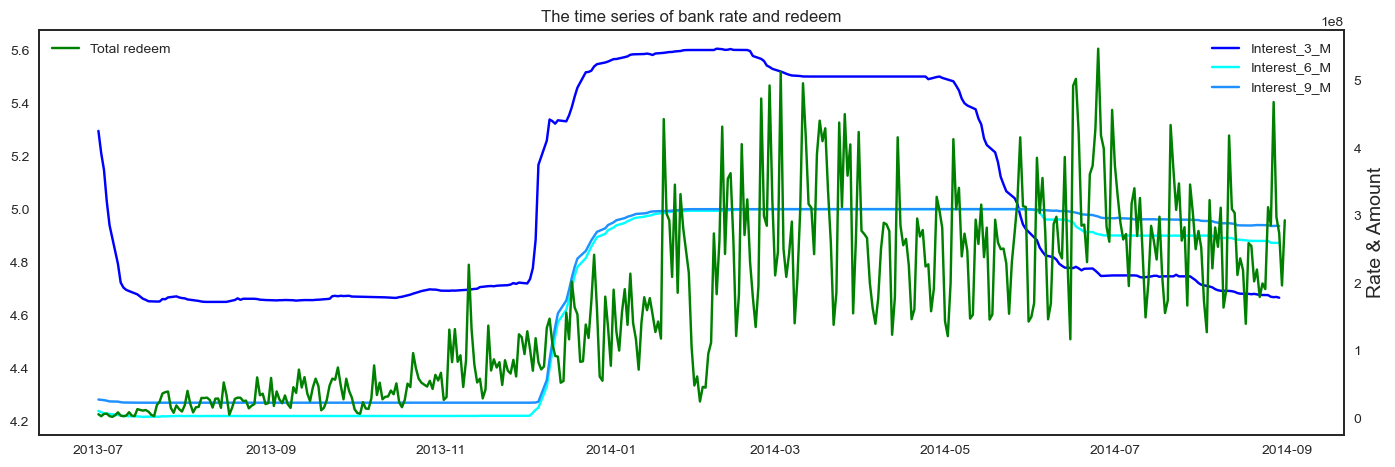

In [68]:
# 画出部分银行利率与赎回量的时序图

fig,ax1 = plt.subplots(figsize=(15,5))
plt.plot(bank['date'], bank['Interest_3_M'],'b',label="Interest_3_M")
plt.plot(bank['date'], bank['Interest_6_M'],'cyan',label="Interest_6_M")
plt.plot(bank['date'], bank['Interest_9_M'],'dodgerblue',label="Interest_9_M")

plt.legend()

ax2=ax1.twinx()
plt.plot(total_balance['date'], total_balance['total_redeem_amt'],'g',label="Total redeem")

plt.legend(loc=2)
plt.title("The time series of bank rate and redeem")
plt.xlabel("Time")
plt.ylabel("Rate & Amount")

plt.show()


<Axes: >

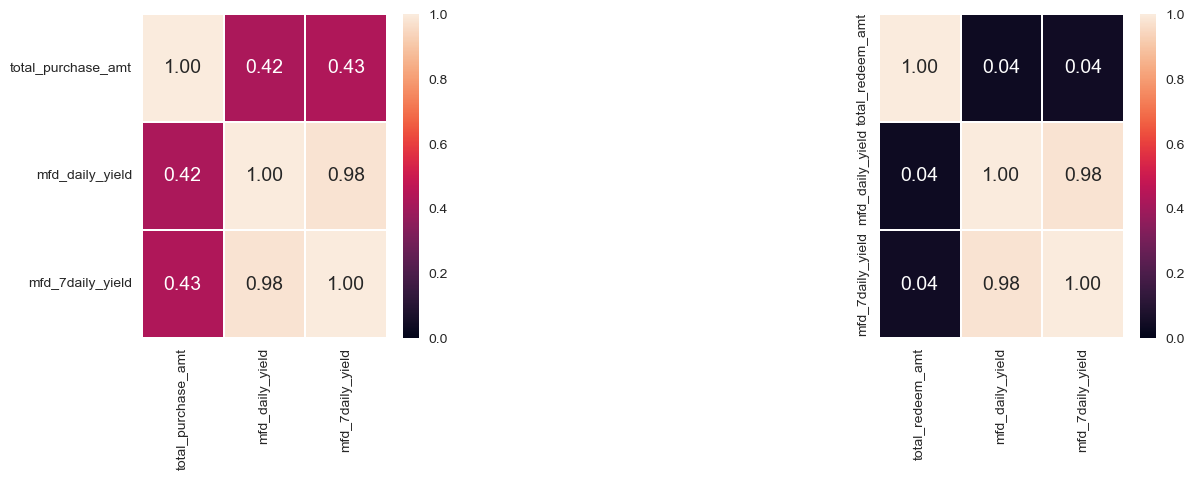

In [69]:
# 画出支付宝利率与标签的相关性图（日对比）

share['last_date'] = share['date'] + datetime.timedelta(days=-1)
share['last_date'] = share['last_date'].dt.date
plt.figure(figsize=(12,4))
plt.subplot(1,3,1)
temp = pd.merge(share[['last_date']+share_features], total_balance, left_on='last_date', right_on='date')[['total_purchase_amt']+share_features]
sns.heatmap(temp.corr(), linewidths = 0.05, vmin = 0,annot=True,fmt='.2f')  
plt.subplot(1,3,3)
temp = pd.merge(share[['last_date']+share_features], total_balance, left_on='last_date', right_on='date')[['total_redeem_amt']+share_features]
sns.heatmap(temp.corr(), linewidths = 0.05, vmin = 0,annot=True,fmt='.2f')  

<Axes: >

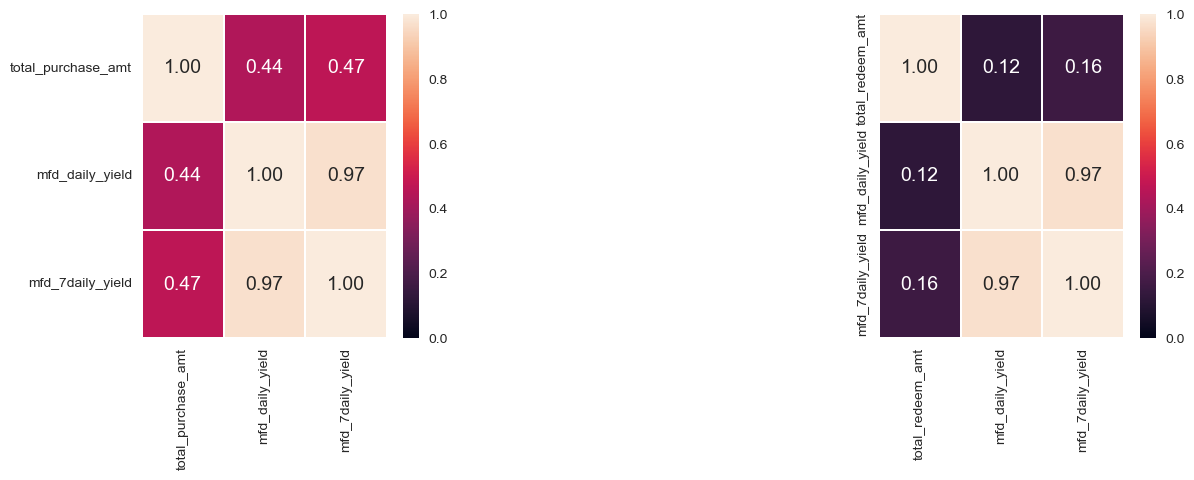

In [70]:
# 画出支付宝利率与标签的相关性图（周对比）

share['last_week'] = share['week'] - 1
plt.figure(figsize=(12,4))
plt.subplot(1,3,1)
temp = pd.merge(share[['last_week','weekday']+share_features], total_balance, left_on=['last_week','weekday'], right_on=['week','weekday'])[['total_purchase_amt']+share_features]
sns.heatmap(temp.corr(), linewidths = 0.05, vmin = 0,annot=True,fmt='.2f')  
plt.subplot(1,3,3)
temp = pd.merge(share[['last_week','weekday']+share_features], total_balance, left_on=['last_week','weekday'], right_on=['week','weekday'])[['total_redeem_amt']+share_features]
sns.heatmap(temp.corr(), linewidths = 0.05, vmin = 0,annot=True,fmt='.2f') 

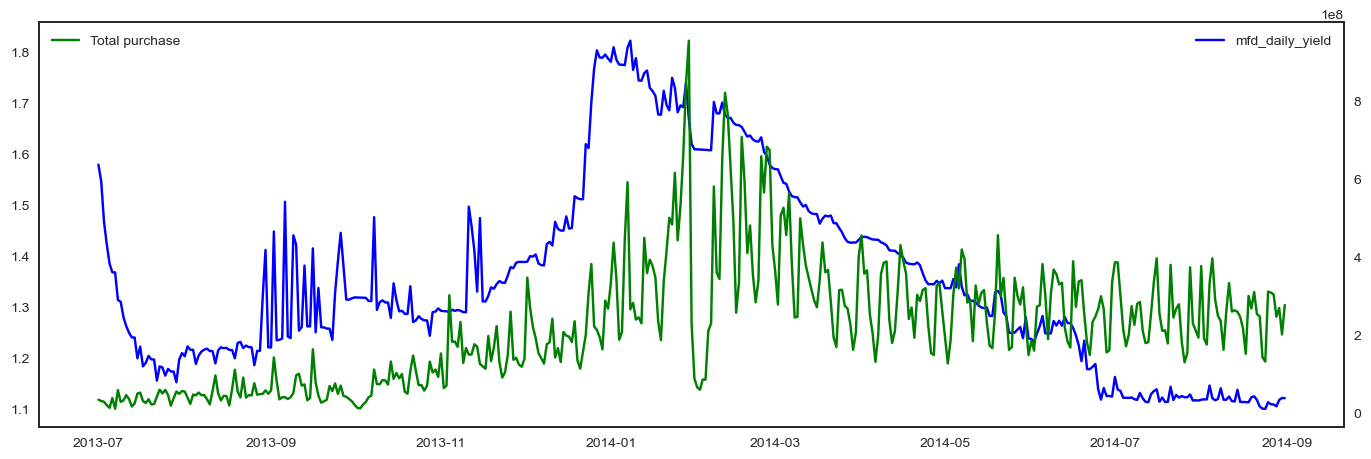

In [71]:
# 画出支付宝利率与购买量的时序图

fig,ax1 = plt.subplots(figsize=(15,5))
for i in share_features:
    plt.plot(share['date'], share[i],'b',label=i)
    break
plt.legend()
ax2=ax1.twinx()
plt.plot(total_balance['date'], total_balance['total_purchase_amt'],'g',label="Total purchase")
plt.legend(loc=2)
plt.show()

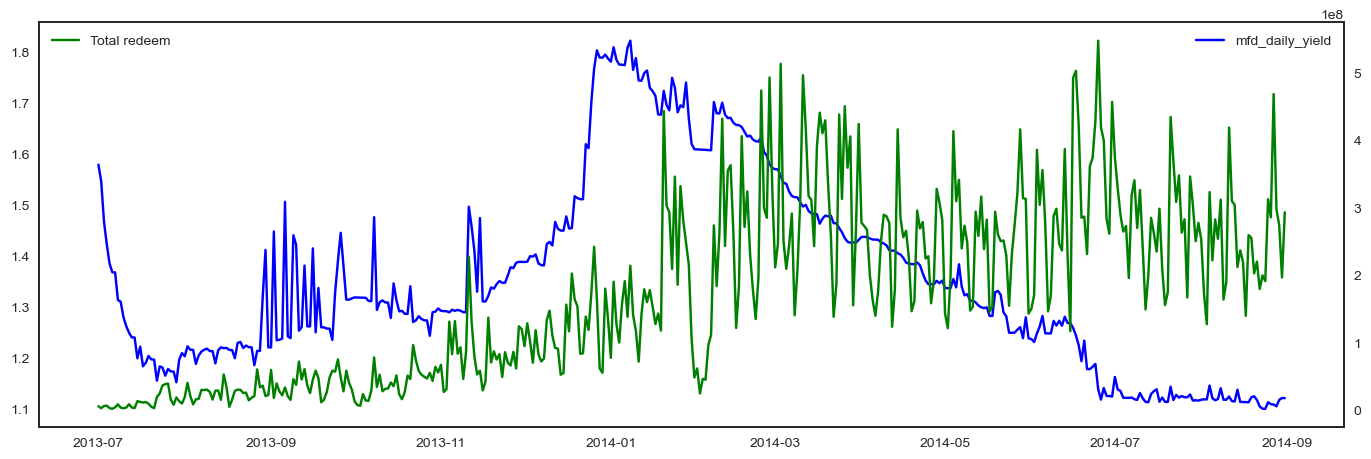

In [72]:
# 画出支付宝利率与赎回量的时序图

fig,ax1 = plt.subplots(figsize=(15,5))
for i in share_features:
    plt.plot(share['date'], share[i],'b',label=i)
    break
plt.legend()
ax2=ax1.twinx()
plt.plot(total_balance['date'], total_balance['total_redeem_amt'],'g',label="Total redeem")
plt.legend(loc=2)
plt.show()

<Axes: title={'center': 'BIG REDEEM'}>

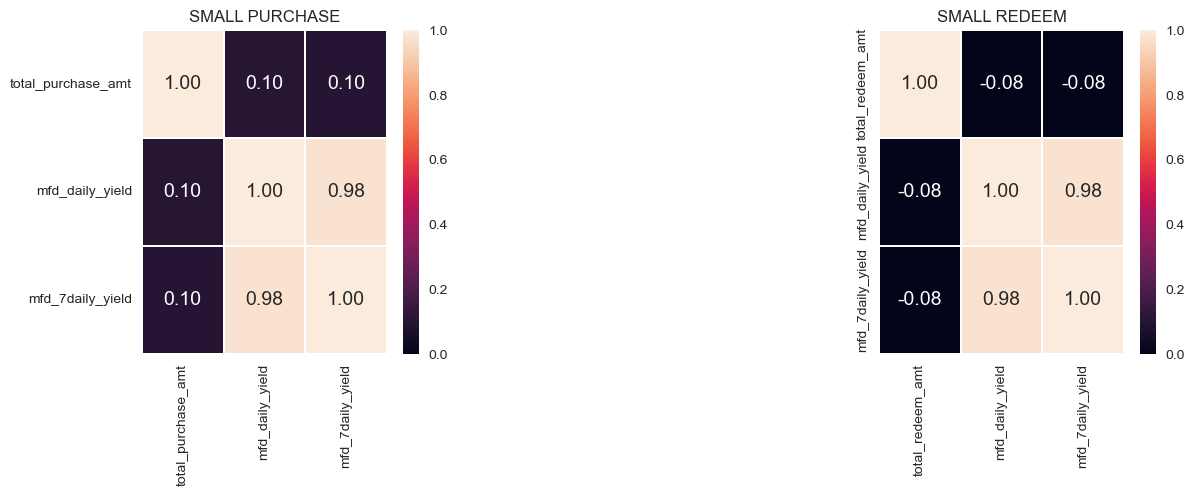

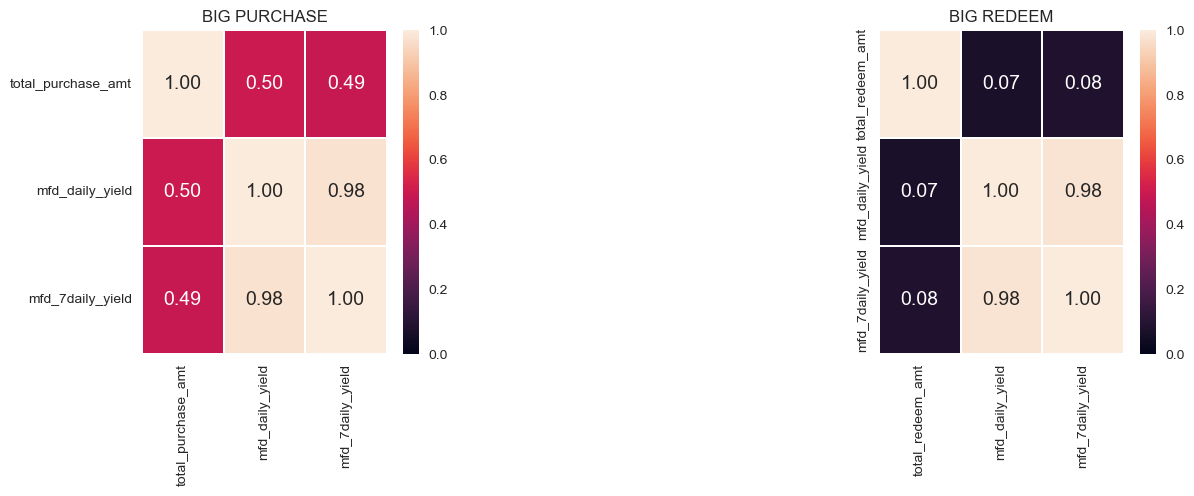

In [73]:
# 画出大额小额数据与支付宝利率的相关性图

share['last_date'] = share['date'] + datetime.timedelta(days=1)
plt.figure(figsize=(12,4))
plt.subplot(1,3,1)
temp = pd.merge(share[['last_date']+share_features], small_purchase, left_on='last_date', right_on='date')[['total_purchase_amt']+share_features]
sns.heatmap(temp.corr(), linewidths = 0.05, vmin=0,annot=True,fmt='.2f')  
plt.title("SMALL PURCHASE")
plt.subplot(1,3,3)
plt.title("SMALL REDEEM")
temp = pd.merge(share[['last_date']+share_features], small_redeem, left_on='last_date', right_on='date')[['total_redeem_amt']+share_features]
sns.heatmap(temp.corr(), linewidths = 0.05, vmin=0,annot=True,fmt='.2f')  

share['last_date'] = share['date'] + datetime.timedelta(days=1)
plt.figure(figsize=(12,4))
plt.subplot(1,3,1)
plt.title("BIG PURCHASE")
temp = pd.merge(share[['last_date']+share_features], big_purchase, left_on='last_date', right_on='date')[['total_purchase_amt']+share_features]
sns.heatmap(temp.corr(), linewidths = 0.05, vmin=0,annot=True,fmt='.2f')  
plt.subplot(1,3,3)
plt.title("BIG REDEEM")
temp = pd.merge(share[['last_date']+share_features], big_redeem, left_on='last_date', right_on='date')[['total_redeem_amt']+share_features]
sns.heatmap(temp.corr(), linewidths = 0.05, vmin=0,annot=True,fmt='.2f')  

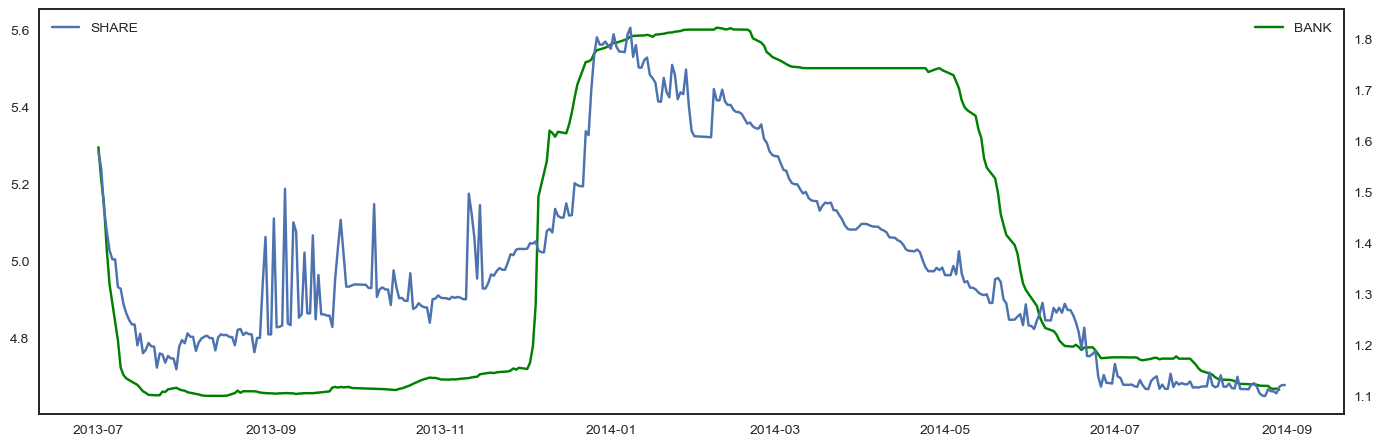

In [74]:
# 画出银行利率与支付宝利率的时序图

fig,ax1 = plt.subplots(figsize=(15,5))
plt.plot(bank['date'], bank['Interest_3_M'],c='g',label= 'BANK')

plt.legend()
ax2=ax1.twinx()
plt.plot(share['date'], share['mfd_daily_yield'],label='SHARE')
plt.legend(loc=2)
plt.show()

It seems that:

1. The influence of share is more likely to act on Purchase
2. The influence of bank rate is more likely to act on Redeem
1. The influence of share rate is for short
2. The influence of bank rate is for long

based on above analysis, we can simply find three features:

1. the weekday
2. is it weekend
3. is it holidy
5. the distance from the start of week(monday)
6. the distance from the end of week(sunday)
7. the distance from the holiday centre(centre of QingMing DuanWu Labour ZhongQiu)
8. the distance from the start of month
9. the distance from the end of month
10. the mean/max/min value of the same week in last month
11. the value in last day of last month

## 分析大小额用户

前面的分析可以看出，某些用户的交易额很大，对于日交易量很明显，这里统计四月份后依旧活跃的大额用户(大于100万)

In [75]:
# 获得大额用户的集合

temp = data_balance[(data_balance['total_purchase_amt'] >= 1000000) | (data_balance['total_redeem_amt'] >= 1000000)]
big_users_set = set(temp[temp['date'] >= datetime.datetime(2014,4,1)]['user_id'])

In [76]:
len(big_users_set)

3903

In [77]:
max(data_balance['user_id'])

28041

大额用户占3903个，占总数的13%

In [78]:
# 标记大额用户
data_balance['big_user'] = data_balance['user_id'].apply(lambda x: 1 if x in big_users_set else 0)

In [79]:
# 统计大额用户与小额用户的日总交易额的区别

total_balance_bigNsmall = data_balance.groupby(['date','big_user'], as_index=False)['total_purchase_amt','total_redeem_amt'].sum()

In [80]:
total_balance_bigNsmall

date  big_user  total_purchase_amt  total_redeem_amt
0   2013-07-01         0             4801182            925236
1   2013-07-01         1            27687166           4599786
2   2013-07-02         0             6692332           1944664
3   2013-07-02         1            22345058            609884
4   2013-07-03         0             7027919           1273803
..         ...       ...                 ...               ...
849 2014-08-29         1           239399665         248463115
850 2014-08-30         0            28912056          22062824
851 2014-08-30         1           170796716         174311310
852 2014-08-31         0            28912459          29875528
853 2014-08-31         1           246177754         263067505

[854 rows x 4 columns]

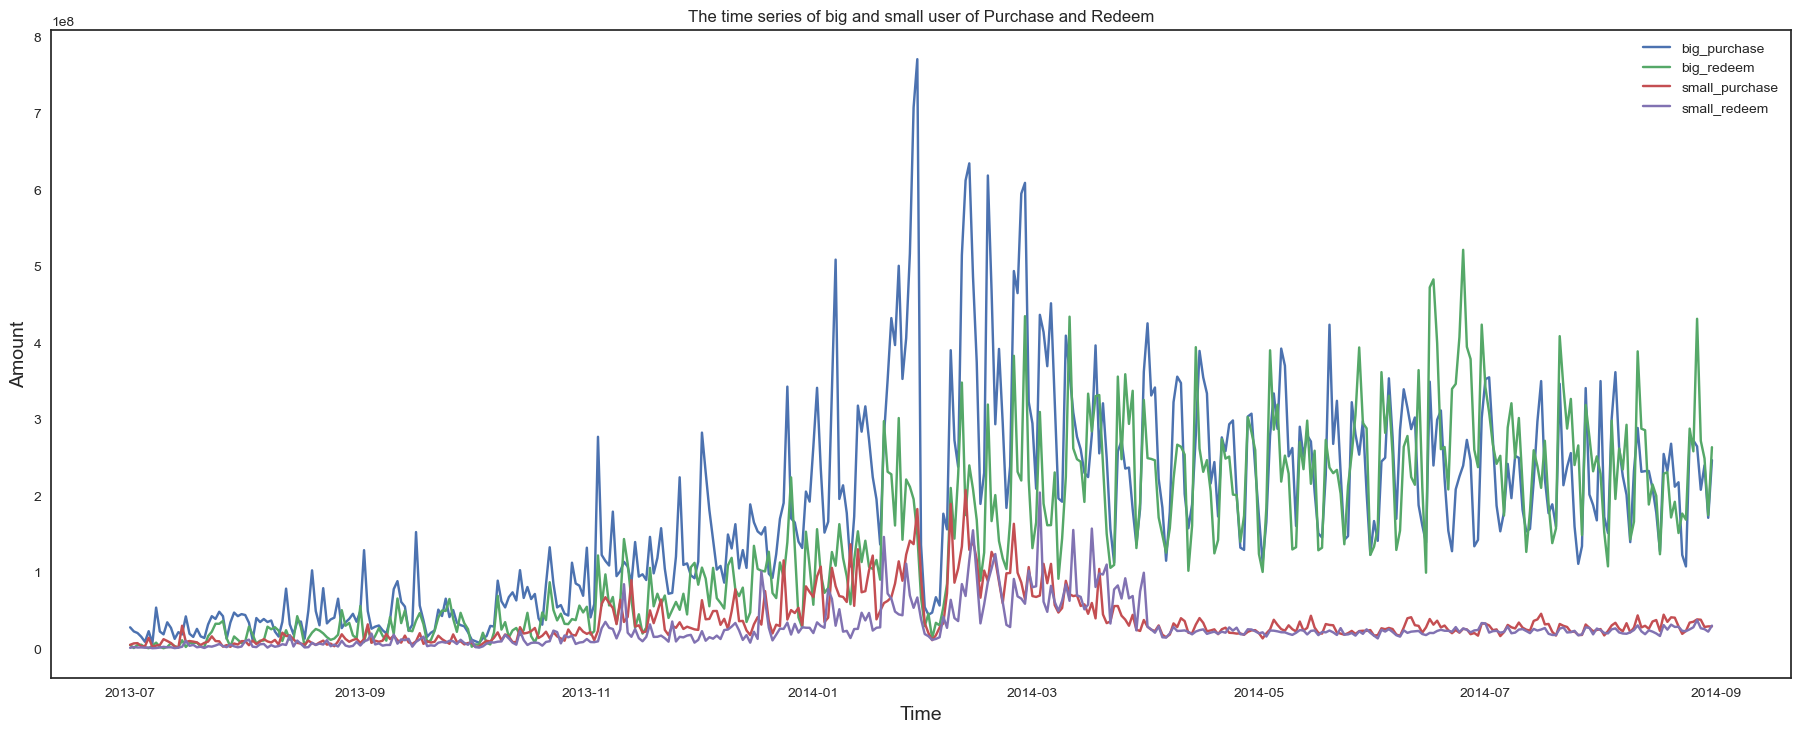

In [81]:
# 画出大额用户与小额用户交易的日总交易量图

fig = plt.figure(figsize=(20,8))
plt.plot(total_balance_bigNsmall[total_balance_bigNsmall['big_user'] == 1]['date'], total_balance_bigNsmall[total_balance_bigNsmall['big_user'] == 1]['total_purchase_amt'],label='big_purchase')
plt.plot(total_balance_bigNsmall[total_balance_bigNsmall['big_user'] == 1]['date'], total_balance_bigNsmall[total_balance_bigNsmall['big_user'] == 1]['total_redeem_amt'],label='big_redeem')

plt.plot(total_balance_bigNsmall[total_balance_bigNsmall['big_user'] == 0]['date'], total_balance_bigNsmall[total_balance_bigNsmall['big_user'] == 0]['total_purchase_amt'],label='small_purchase')
plt.plot(total_balance_bigNsmall[total_balance_bigNsmall['big_user'] == 0]['date'], total_balance_bigNsmall[total_balance_bigNsmall['big_user'] == 0]['total_redeem_amt'],label='small_redeem')
plt.legend(loc='best')
plt.title("The time series of big and small user of Purchase and Redeem")
plt.xlabel("Time")
plt.ylabel("Amount")
plt.show()

In [82]:
# 统计大额小额用户购买量占比

np.sum(total_balance_bigNsmall[total_balance_bigNsmall['big_user'] == 1]['total_purchase_amt']) / np.sum(total_balance_bigNsmall[total_balance_bigNsmall['big_user'] == 0]['total_purchase_amt'])

5.1456178397775805

In [83]:
# 统计大额小额用户赎回量占比

np.sum(total_balance_bigNsmall[total_balance_bigNsmall['big_user'] == 1]['total_redeem_amt']) / np.sum(total_balance_bigNsmall[total_balance_bigNsmall['big_user'] == 0]['total_redeem_amt'])

5.422141272341089

## 分析用户的交易频次

<Axes: xlabel='tBalance', ylabel='Density'>

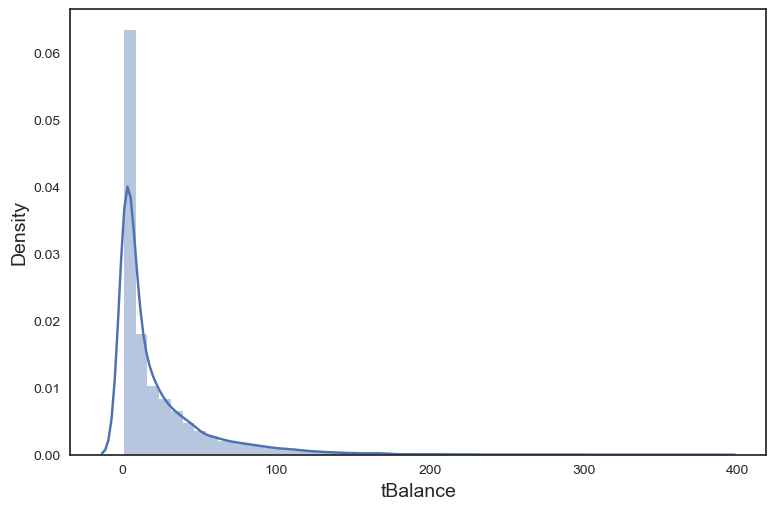

In [84]:
# 画出非0交易的分布图

frequency = data_balance[(data_balance['direct_purchase_amt'] != 0) | (data_balance['total_redeem_amt'] != 0)][['user_id','tBalance']].groupby('user_id', as_index=False).count()
sns.distplot(frequency['tBalance'])

In [85]:
# 获取频繁交易用户集合

hot_users_set = set(frequency[frequency['tBalance'] > 30]['user_id'])

In [86]:
# 获取频繁用户的交易纪录

data_balance['is_hot_users'] = 0
data_balance.loc[data_balance['user_id'].isin(hot_users_set) , 'is_hot_users'] = 1

In [87]:
# 统计频繁用户与非频繁用户的日总交易额的区别

total_balance_hotNcold = data_balance.groupby(['date','is_hot_users'], as_index=False)['total_purchase_amt','total_redeem_amt'].sum()

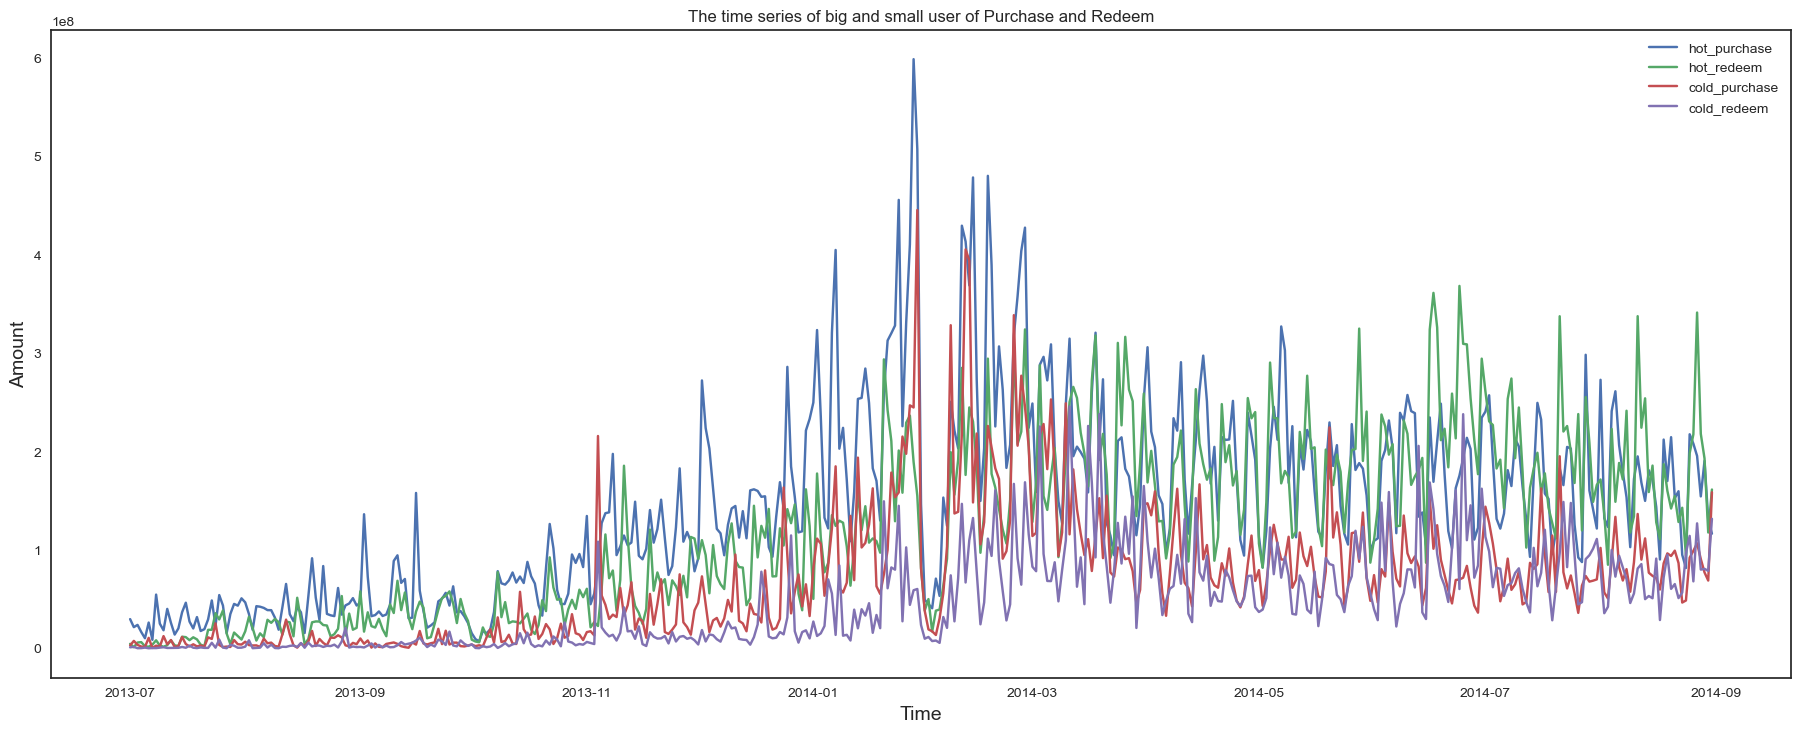

In [88]:
# 绘制频繁用户与非频繁用户总购买赎回量的时序图

fig = plt.figure(figsize=(20,8))
plt.plot(total_balance_hotNcold[total_balance_hotNcold['is_hot_users'] == 1]['date'], total_balance_hotNcold[total_balance_hotNcold['is_hot_users'] == 1]['total_purchase_amt'],label='hot_purchase')
plt.plot(total_balance_hotNcold[total_balance_hotNcold['is_hot_users'] == 1]['date'], total_balance_hotNcold[total_balance_hotNcold['is_hot_users'] == 1]['total_redeem_amt'],label='hot_redeem')

plt.plot(total_balance_hotNcold[total_balance_hotNcold['is_hot_users'] == 0]['date'], total_balance_hotNcold[total_balance_hotNcold['is_hot_users'] == 0]['total_purchase_amt'],label='cold_purchase')
plt.plot(total_balance_hotNcold[total_balance_hotNcold['is_hot_users'] == 0]['date'], total_balance_hotNcold[total_balance_hotNcold['is_hot_users'] == 0]['total_redeem_amt'],label='cold_redeem')
plt.legend(loc='best')
plt.title("The time series of big and small user of Purchase and Redeem")
plt.xlabel("Time")
plt.ylabel("Amount")
plt.show()

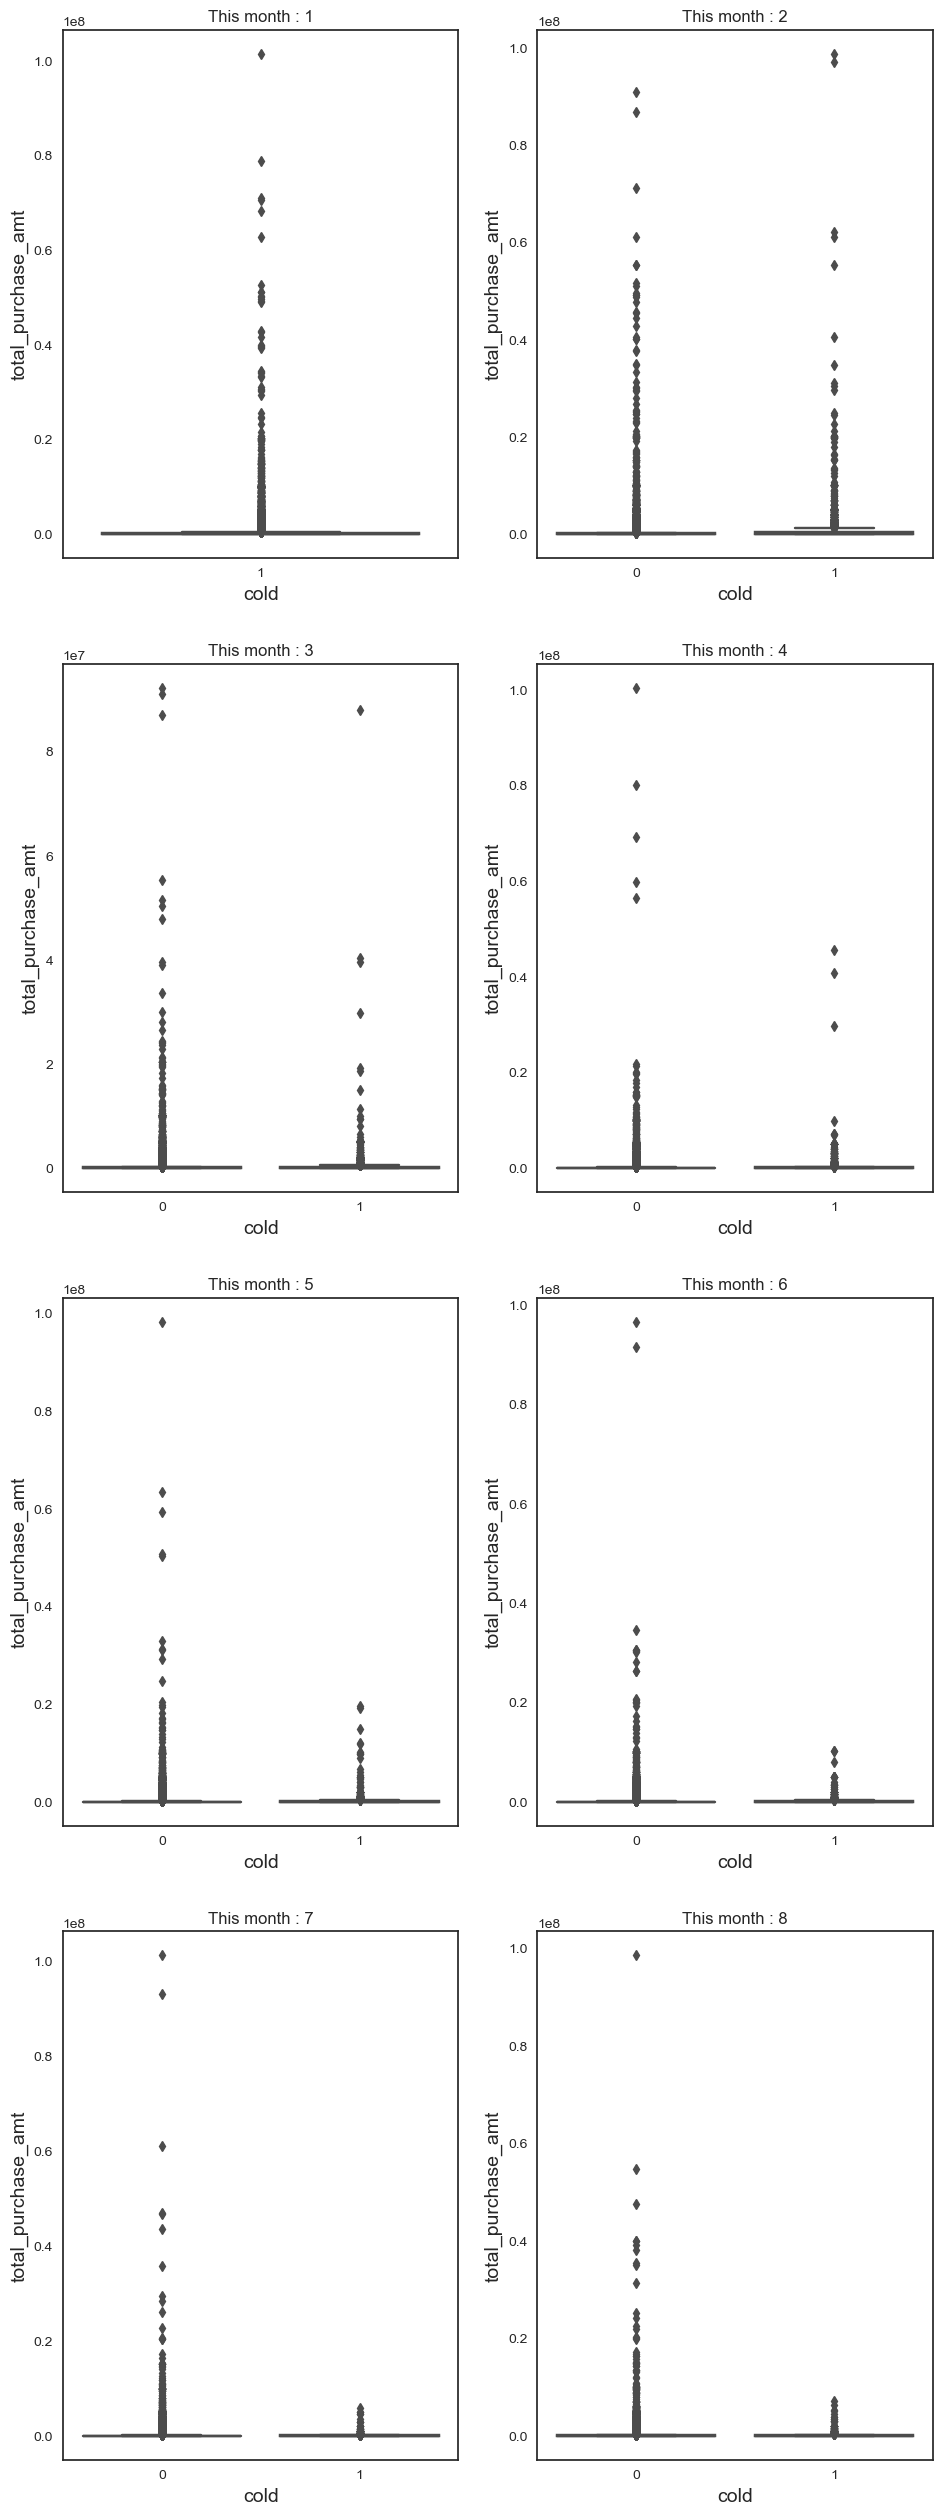

In [89]:
# 画出冷启动用户与老用户交易的箱型图

temp = data_balance[['year','month','user_id','total_purchase_amt','total_redeem_amt']].groupby(['year','month','user_id'], as_index=False).sum()
user_old_set = set()
plt.figure(figsize=(10,30))
for i in range(1, 9):
    newset = set(temp[(temp['year'] == 2014) & (temp['month'] == i)]['user_id'])
    this_month = data_balance[(data_balance['year'] == 2014) & (data_balance['month'] == i)]
    this_month['cold'] = 0
    this_month.loc[this_month['user_id'].isin(newset - user_old_set), 'cold'] = 1
    plt.subplot(4,2,i)
    plt.title('This month : ' + str(i))
    sns.boxplot(x="cold", y="total_purchase_amt" , data=this_month[(this_month['direct_purchase_amt'] != 0) | (this_month['total_redeem_amt'] != 0)])
    user_old_set = user_old_set | newset
plt.show()

## 分析用户的其他属性

In [90]:
# 用户的其他属性

users.head()

user_id  sex     city constellation
0        2    1  6411949           狮子座
1       12    1  6412149           摩羯座
2       22    1  6411949           双子座
3       23    1  6411949           双鱼座
4       25    1  6481949           双鱼座

In [91]:
# 添加城市、星座、性别

data_balance = pd.merge(data_balance, users, on='user_id')

In [92]:
data_balance['city']

0          6411949
1          6411949
2          6411949
3          6411949
4          6411949
            ...   
2840416    6412149
2840417    6412149
2840418    6412149
2840419    6412149
2840420    6481949
Name: city, Length: 2840421, dtype: int64

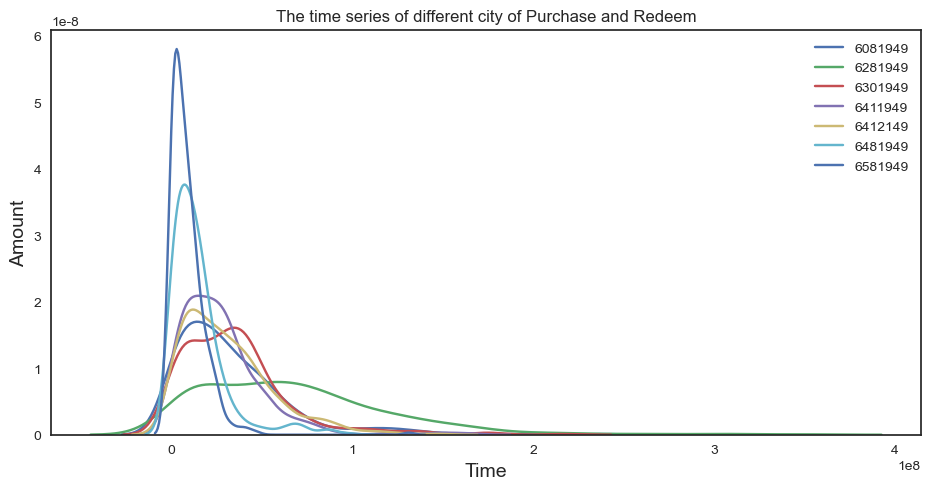

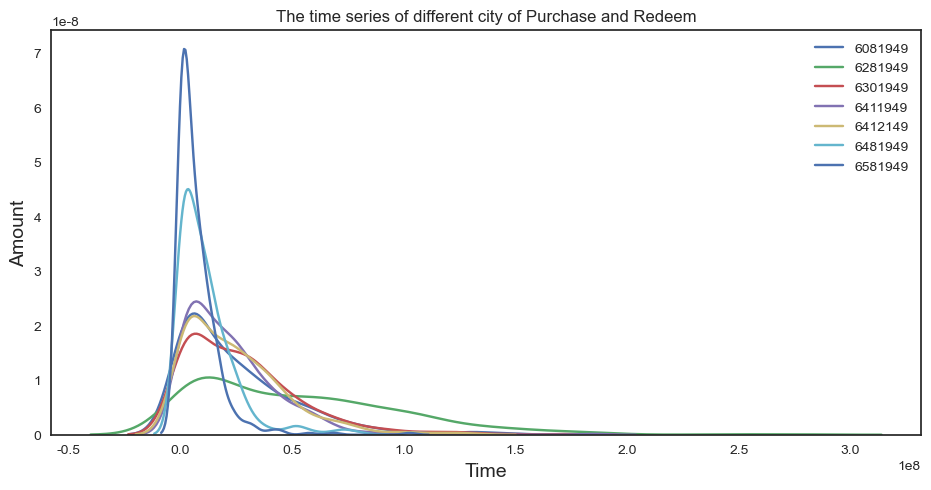

In [93]:
# 统计每个城市用户的日总交易额的区别并绘制分布估计图

fig = plt.figure(figsize=(10,5))
for i in np.unique(data_balance['city']):
    temp = data_balance.groupby(['date','city'], as_index=False)['total_purchase_amt','total_redeem_amt'].sum()
    ax = sns.kdeplot( temp[temp['city'] == i]['total_purchase_amt'],label=i)
plt.legend(loc='best')
plt.title("The time series of different city of Purchase and Redeem")
plt.xlabel("Time")
plt.ylabel("Amount")
plt.show()

fig = plt.figure(figsize=(10,5))
for i in np.unique(data_balance['city']):
    temp = data_balance.groupby(['date','city'], as_index=False)['total_purchase_amt','total_redeem_amt'].sum()
    ax = sns.kdeplot( temp[temp['city'] == i]['total_redeem_amt'],label=i)
plt.legend(loc='best')
plt.title("The time series of different city of Purchase and Redeem")
plt.xlabel("Time")
plt.ylabel("Amount")
plt.show()

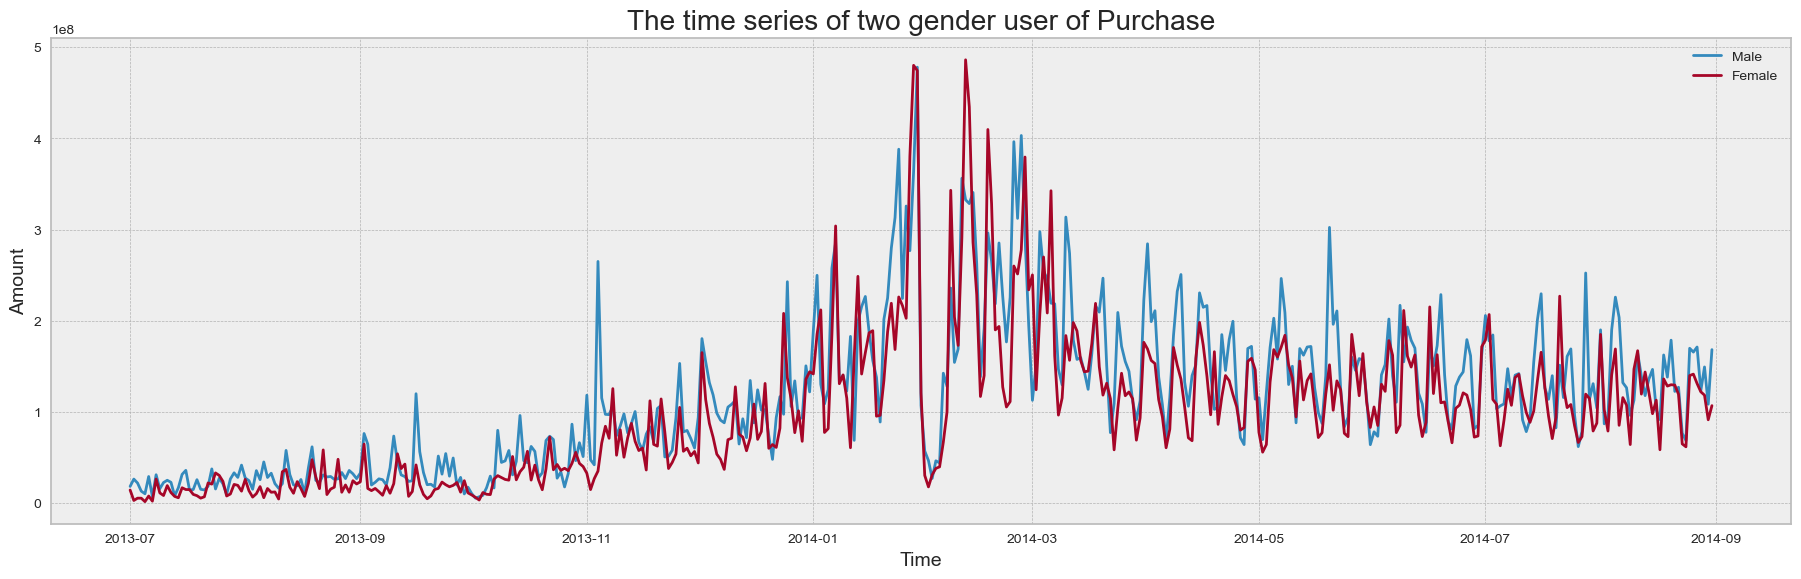

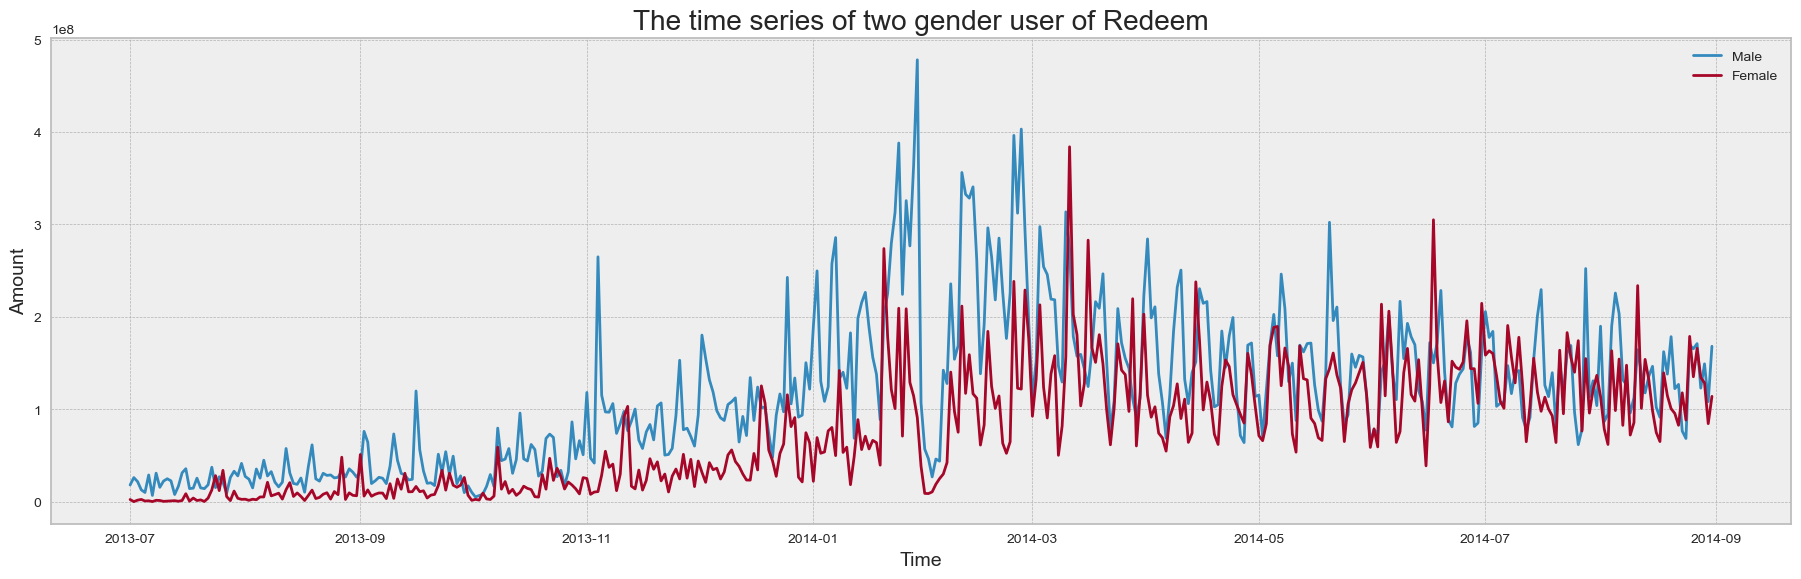

In [94]:
# 统计每个性别用户的日总交易额的区别，并绘制时序图

temp = data_balance.groupby(['date','sex'], as_index=False)['total_purchase_amt','total_redeem_amt'].sum()

fig = plt.figure(figsize=(20,6))

plt.style.use('bmh')
plt.plot(temp[temp['sex'] == 1]['date'], temp[temp['sex'] == 1]['total_purchase_amt'],label='Male')
plt.plot(temp[temp['sex'] == 0]['date'], temp[temp['sex'] == 0]['total_purchase_amt'],label='Female')
plt.legend(loc='best')
plt.title("The time series of two gender user of Purchase")
plt.xlabel("Time")
plt.ylabel("Amount")
plt.show()

fig = plt.figure(figsize=(20,6))
plt.plot(temp[temp['sex'] == 1]['date'], temp[temp['sex'] == 1]['total_purchase_amt'],label='Male')
plt.plot(temp[temp['sex'] == 0]['date'], temp[temp['sex'] == 0]['total_redeem_amt'],label='Female')
plt.legend(loc='best')
plt.title("The time series of two gender user of Redeem")
plt.xlabel("Time")
plt.ylabel("Amount")
plt.show()

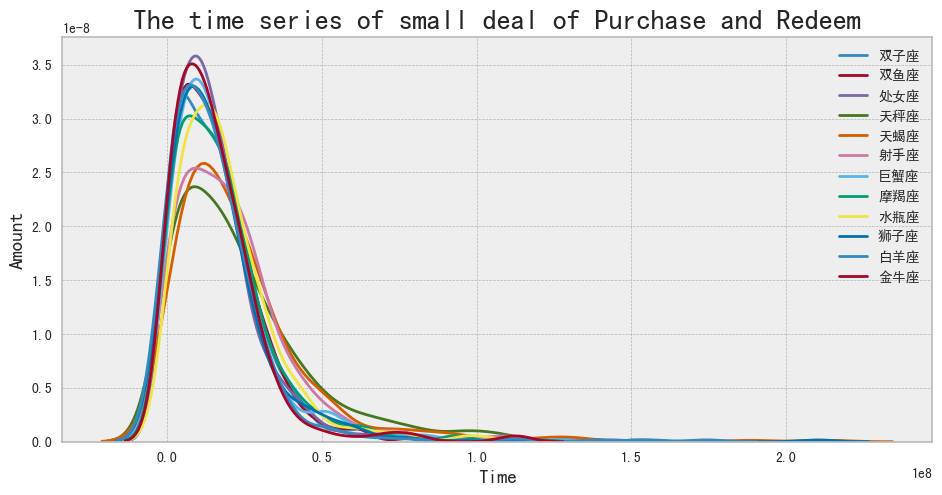

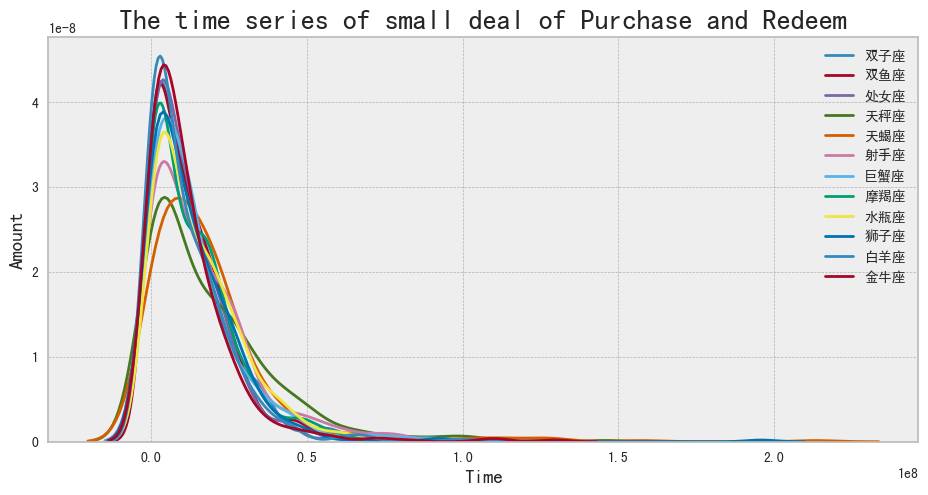

In [95]:
# 统计每个星座用户的日总交易额的区别 并绘制分布估计图
plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
#plt.rcParams['axes.unicode_minus'] = False #用来正常显示负号

fig = plt.figure(figsize=(10,5))
for i in np.unique(data_balance['constellation']):
    temp = data_balance.groupby(['date','constellation'], as_index=False)['total_purchase_amt','total_redeem_amt'].sum()
    ax = sns.kdeplot( temp[temp['constellation'] == i]['total_purchase_amt'],label=i)
plt.legend(loc='best')
plt.title("The time series of small deal of Purchase and Redeem")
plt.xlabel("Time")
plt.ylabel("Amount")
plt.show()

fig = plt.figure(figsize=(10,5))
for i in np.unique(data_balance['constellation']):
    temp = data_balance.groupby(['date','constellation'], as_index=False)['total_purchase_amt','total_redeem_amt'].sum()
    ax = sns.kdeplot( temp[temp['constellation'] == i]['total_redeem_amt'],label=i)
plt.legend(loc='best')
plt.title("The time series of small deal of Purchase and Redeem")
plt.xlabel("Time")
plt.ylabel("Amount")
plt.show()

<Axes: xlabel='constellation', ylabel='total_purchase_amt'>

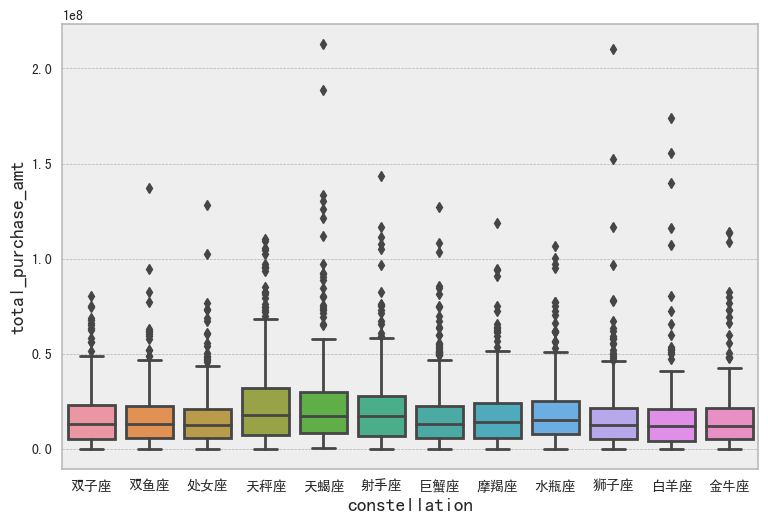

In [96]:
sns.boxplot(data = temp, x = 'constellation',y = 'total_purchase_amt')

<Axes: xlabel='constellation', ylabel='total_redeem_amt'>

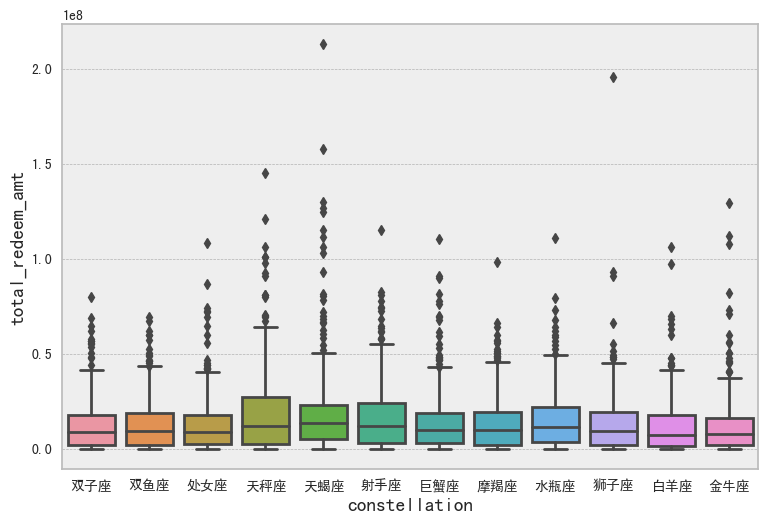

In [97]:
sns.boxplot(data = temp, x = 'constellation',y = 'total_redeem_amt')

## 其他分析

In [98]:
# 统计每个性别用户的日总交易额的区别

temp = data_balance.groupby(['date'], as_index=False)['direct_purchase_amt','share_amt'].sum()

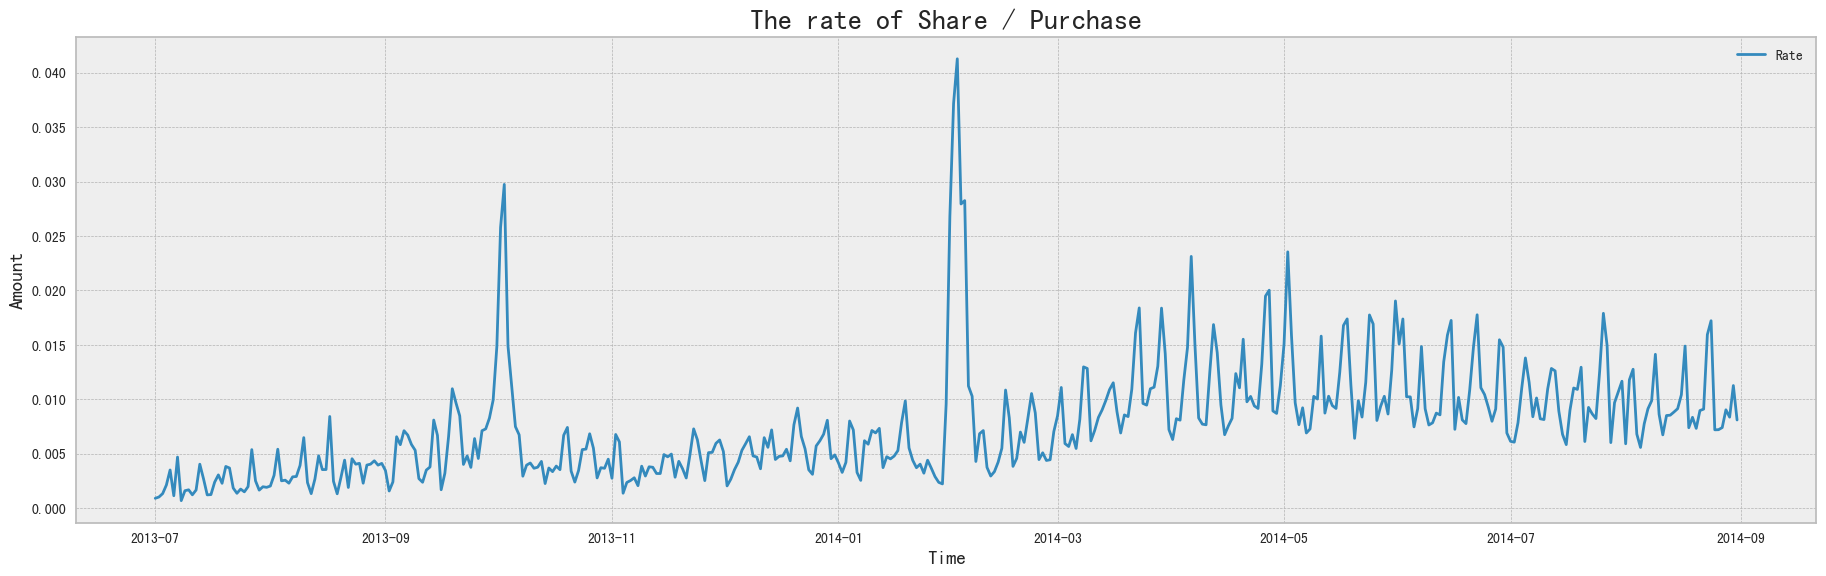

In [99]:
# 画出每日利息的增长/直接购买量的时序图

fig = plt.figure(figsize=(20,6))
plt.plot(temp['date'],  temp['share_amt'] / temp['direct_purchase_amt'] ,label='Rate')
plt.legend(loc='best')
plt.title("The rate of Share / Purchase")
plt.xlabel("Time")
plt.ylabel("Amount")
plt.show()

In [100]:
# 加载支付宝利率数据

share = pd.read_csv('mfd_day_share_interest.csv')
share = share.rename(columns = {'mfd_date': 'date'})
share_features = [x for x in share.columns if x not in ['date']]
share['date'] = pd.to_datetime(share['date'], format= "%Y%m%d")
share['day'] = share['date'].dt.day
share['month'] = share['date'].dt.month
share['year'] = share['date'].dt.year
share['week'] = share['date'].dt.week
share['weekday'] = share['date'].dt.weekday

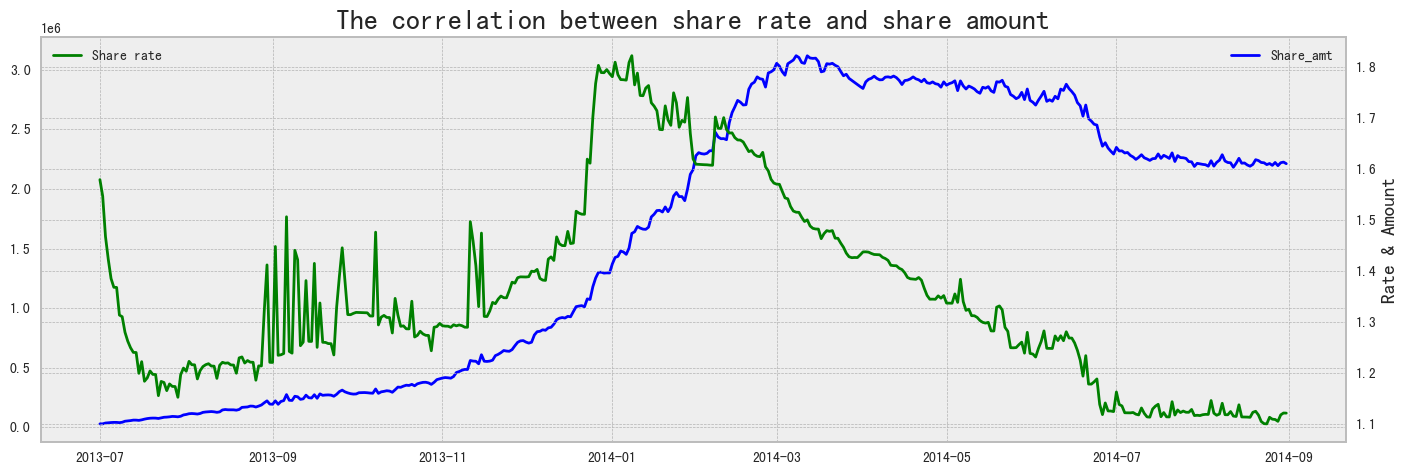

In [101]:
# 绘制支付宝利率与交易额的时序图

fig,ax1 = plt.subplots(figsize=(15,5))
plt.plot(temp['date'], temp['share_amt'],'b',label="Share_amt")
plt.legend()

ax2=ax1.twinx()
plt.plot(share['date'], share['mfd_daily_yield'],'g',label="Share rate")

plt.legend(loc=2)
plt.title("The correlation between share rate and share amount")
plt.xlabel("Time")
plt.ylabel("Rate & Amount")

plt.show()

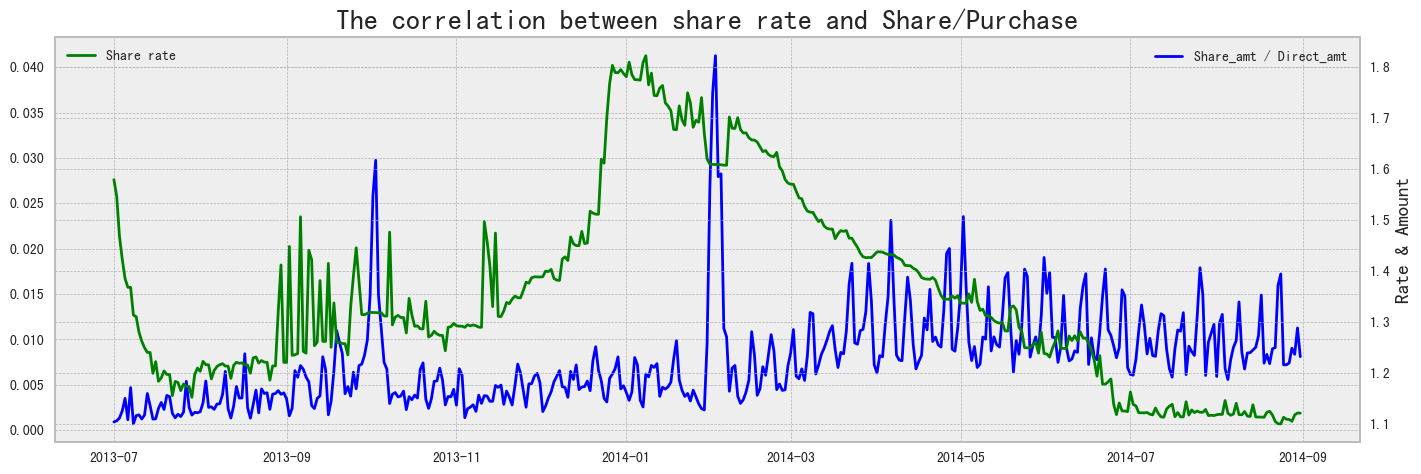

In [102]:
# 支付宝利率与每日利息的增长/直接购买量的时序图

fig,ax1 = plt.subplots(figsize=(15,5))
plt.plot(temp['date'], temp['share_amt'] / temp['direct_purchase_amt'],'b',label="Share_amt / Direct_amt")
plt.legend()

ax2=ax1.twinx()
plt.plot(share['date'], share['mfd_daily_yield'],'g',label="Share rate")

plt.legend(loc=2)
plt.title("The correlation between share rate and Share/Purchase")
plt.xlabel("Time")
plt.ylabel("Rate & Amount")

plt.show()

直接购买里面有两种:
- 支付宝余额购买
- 银行卡购买

In [103]:
# 聚合两种不同购买方式

temp = data_balance.groupby(['date'], as_index=False)['purchase_bal_amt','purchase_bank_amt'].sum()

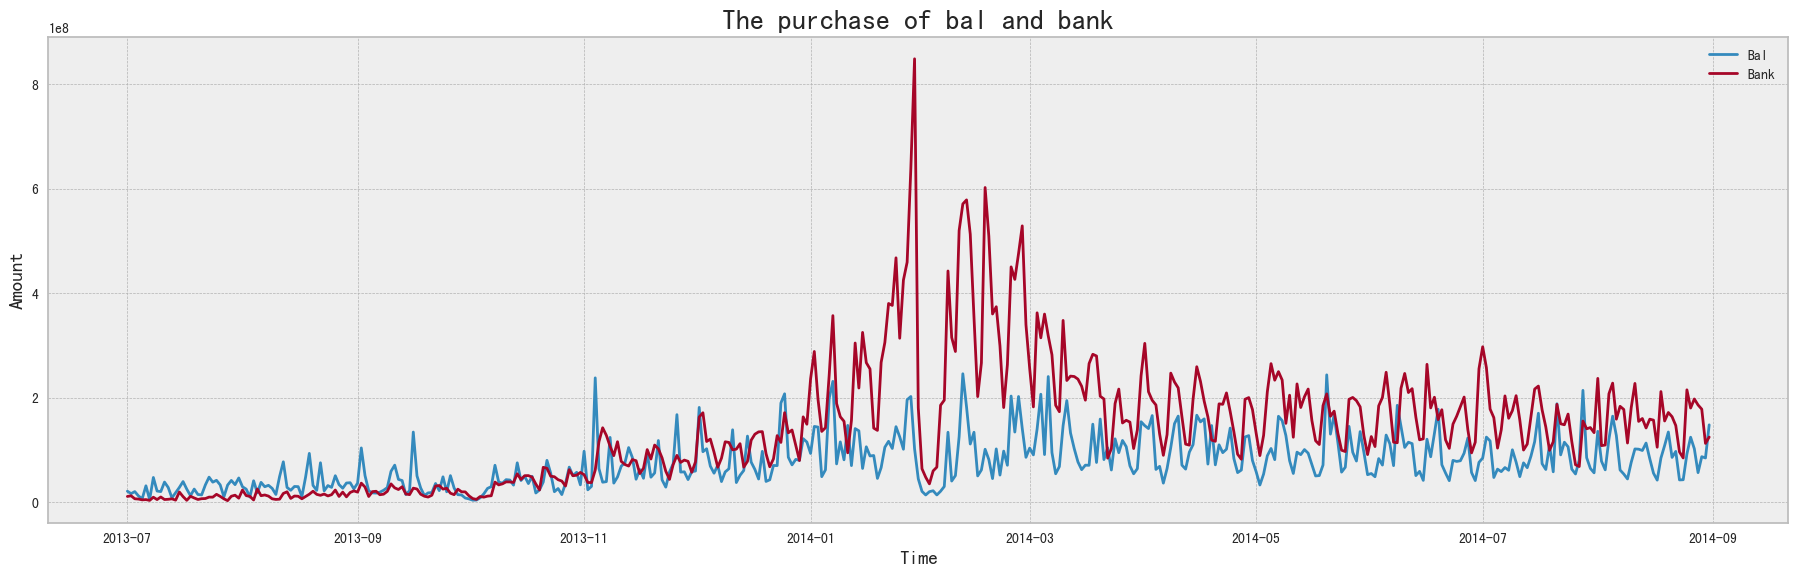

In [104]:
# 画出不同购买方式日购买量的时序图

fig = plt.figure(figsize=(20,6))
plt.plot(temp['date'], temp['purchase_bal_amt'],label='Bal')
plt.plot(temp['date'], temp['purchase_bank_amt'],label='Bank')
plt.legend(loc='best')
plt.title("The purchase of bal and bank")
plt.xlabel("Time")
plt.ylabel("Amount")
plt.show()

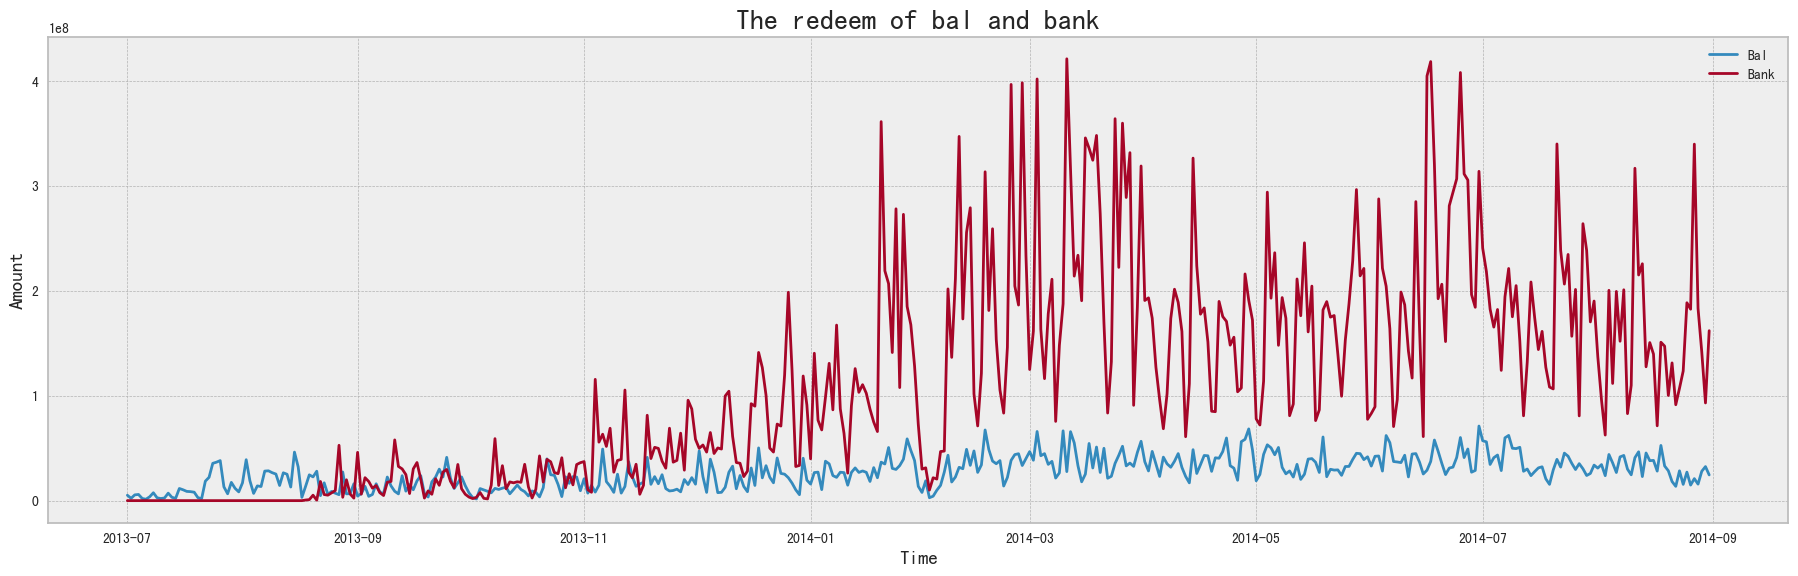

In [105]:
# 画出不同赎回方式日赎回量的时序图

temp = data_balance.groupby(['date'], as_index=False)['tftobal_amt','tftocard_amt'].sum()
fig = plt.figure(figsize=(20,6))
plt.plot(temp['date'], temp['tftobal_amt'],label='Bal')
plt.plot(temp['date'], temp['tftocard_amt'],label='Bank')
plt.legend(loc='best')
plt.title("The redeem of bal and bank")
plt.xlabel("Time")
plt.ylabel("Amount")
plt.show()